# "Who's the author of this paper?": A Data Literacy Project

This project aims to show that we can recognize an author based on their writing style. To do so we collect features like word frequencies, sentence lenght statistics and syllable counts and generate a joint distribution over these features and the authors. This can then be used to predict what author wrote an paper that has not been seen before.

## Setup

In [16]:
import src.analysis as analysis
import warnings
from src.style_manager import apply_style
warnings.filterwarnings('ignore')

In [17]:
root_folders = ["./data/mini-datasets/top8_authors/", 
                "./data/mini-datasets/top8_cat/",  
                "./data/mini-datasets/top8_country/", 
                "./data/mini-datasets/top8_venue/", 
                "./data/mini-datasets/top8_year/"]

## General Performance Evaluation

Mode: STANDARD (Lines)
Tübingen Style Applied successfully!


2026-02-02 15:53:14,124 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:53:14,535 - WARNING - Removed zero-count row: 2503.1981


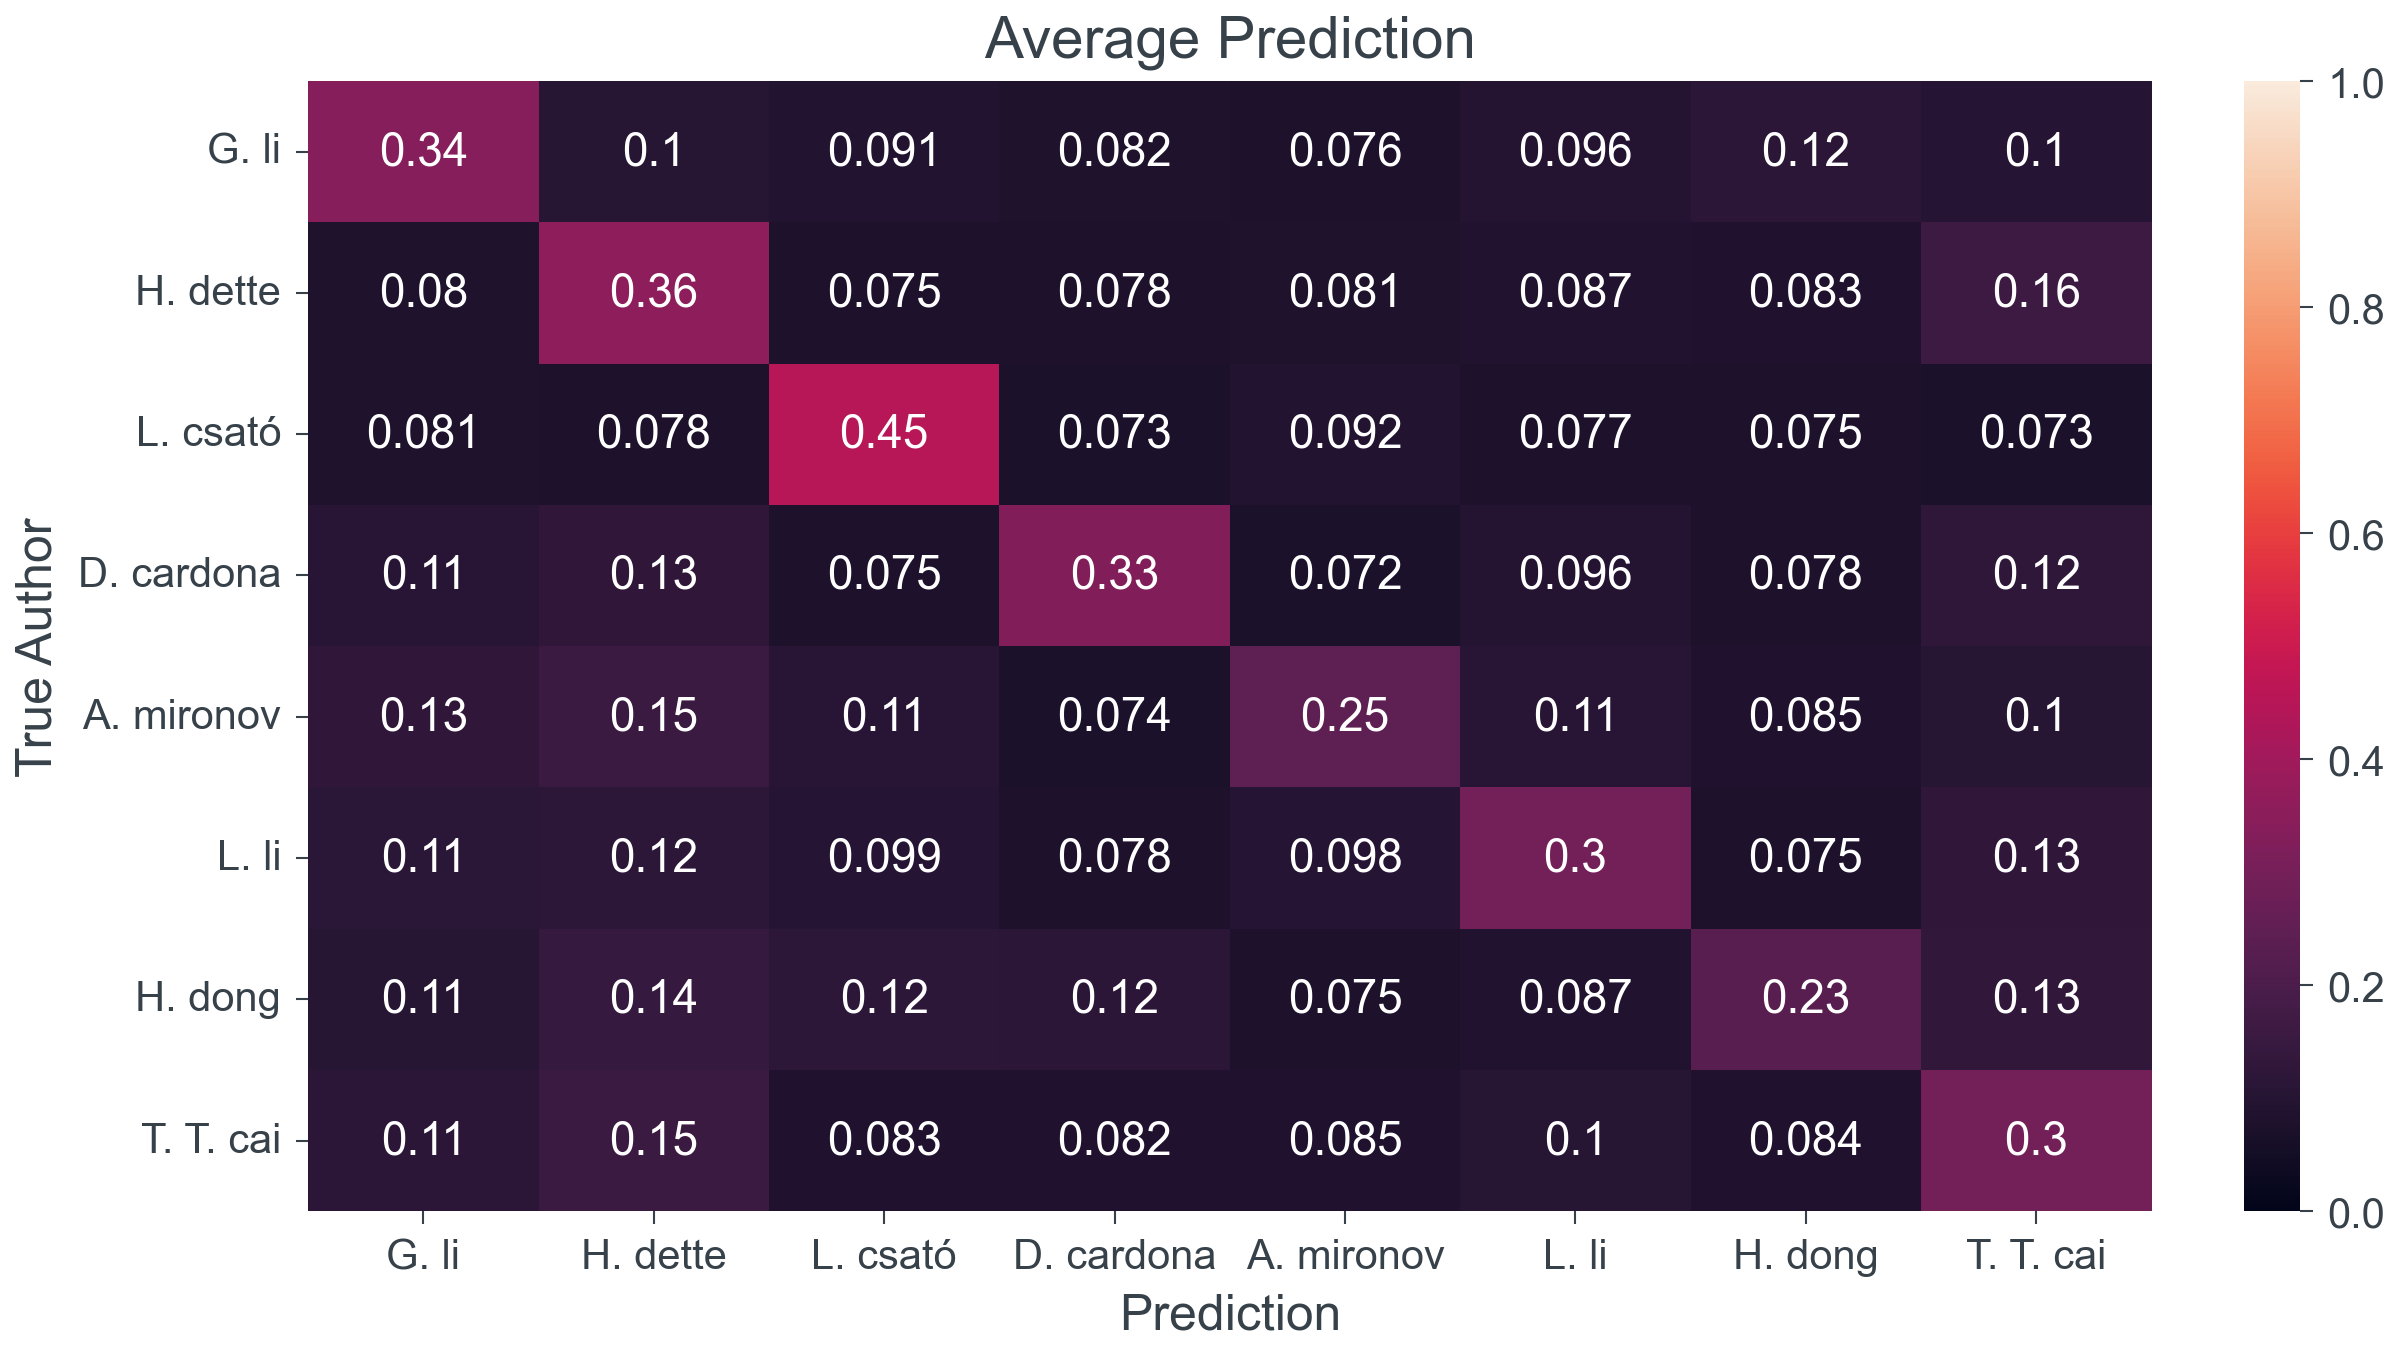

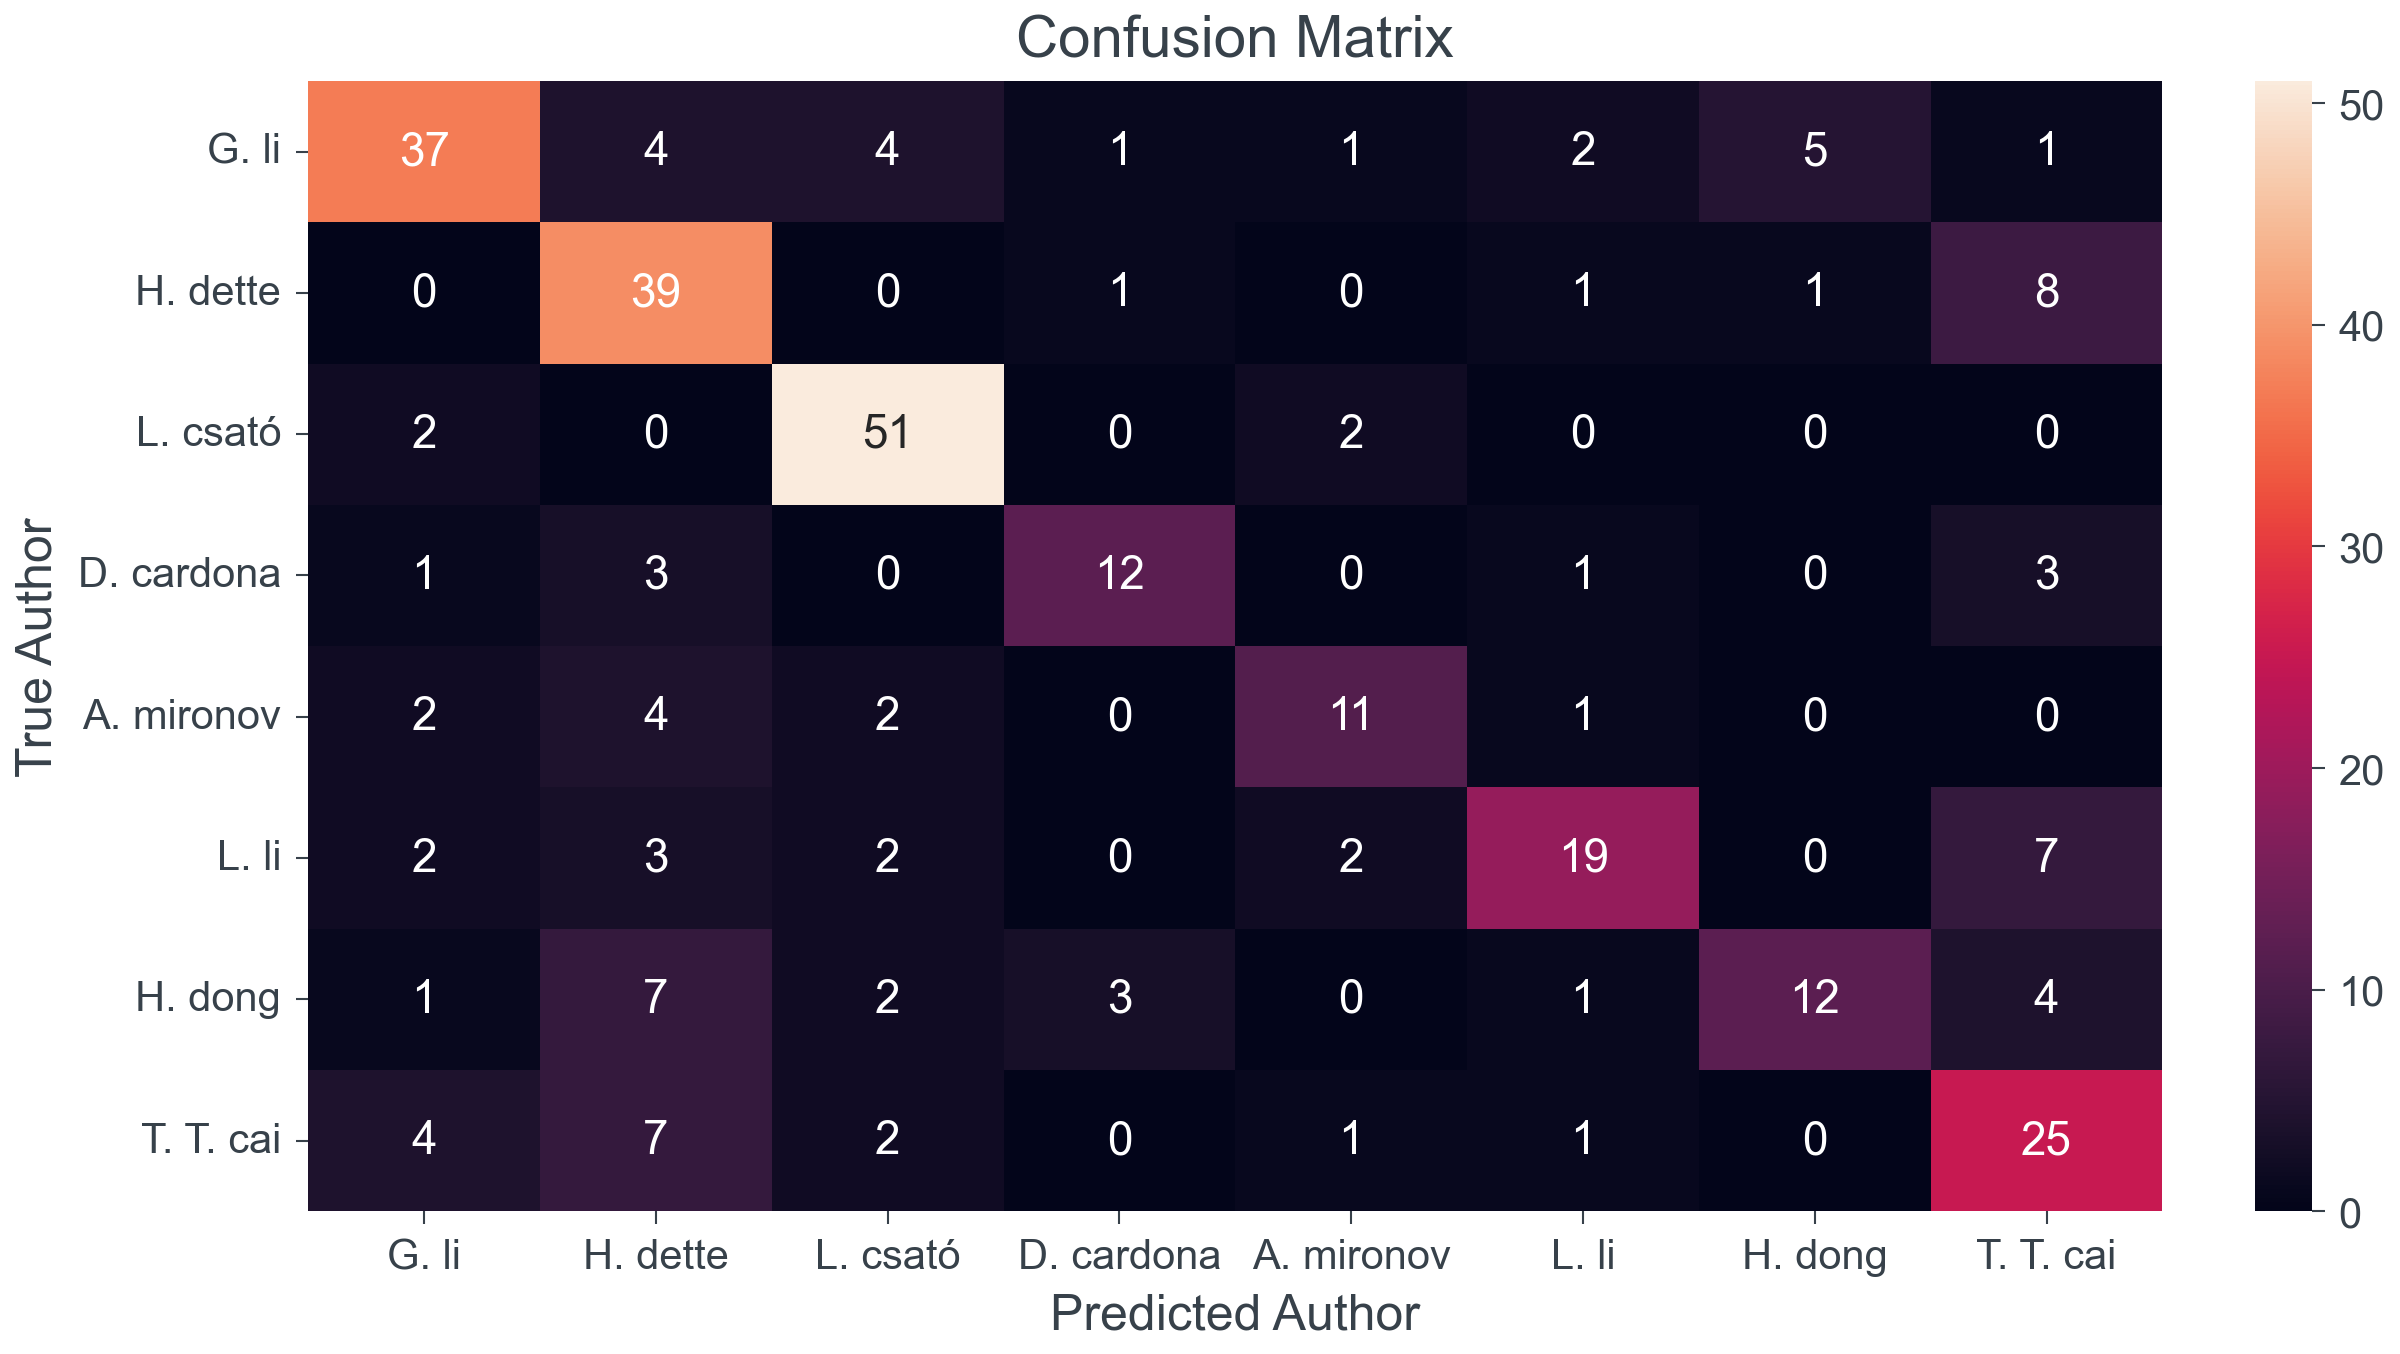

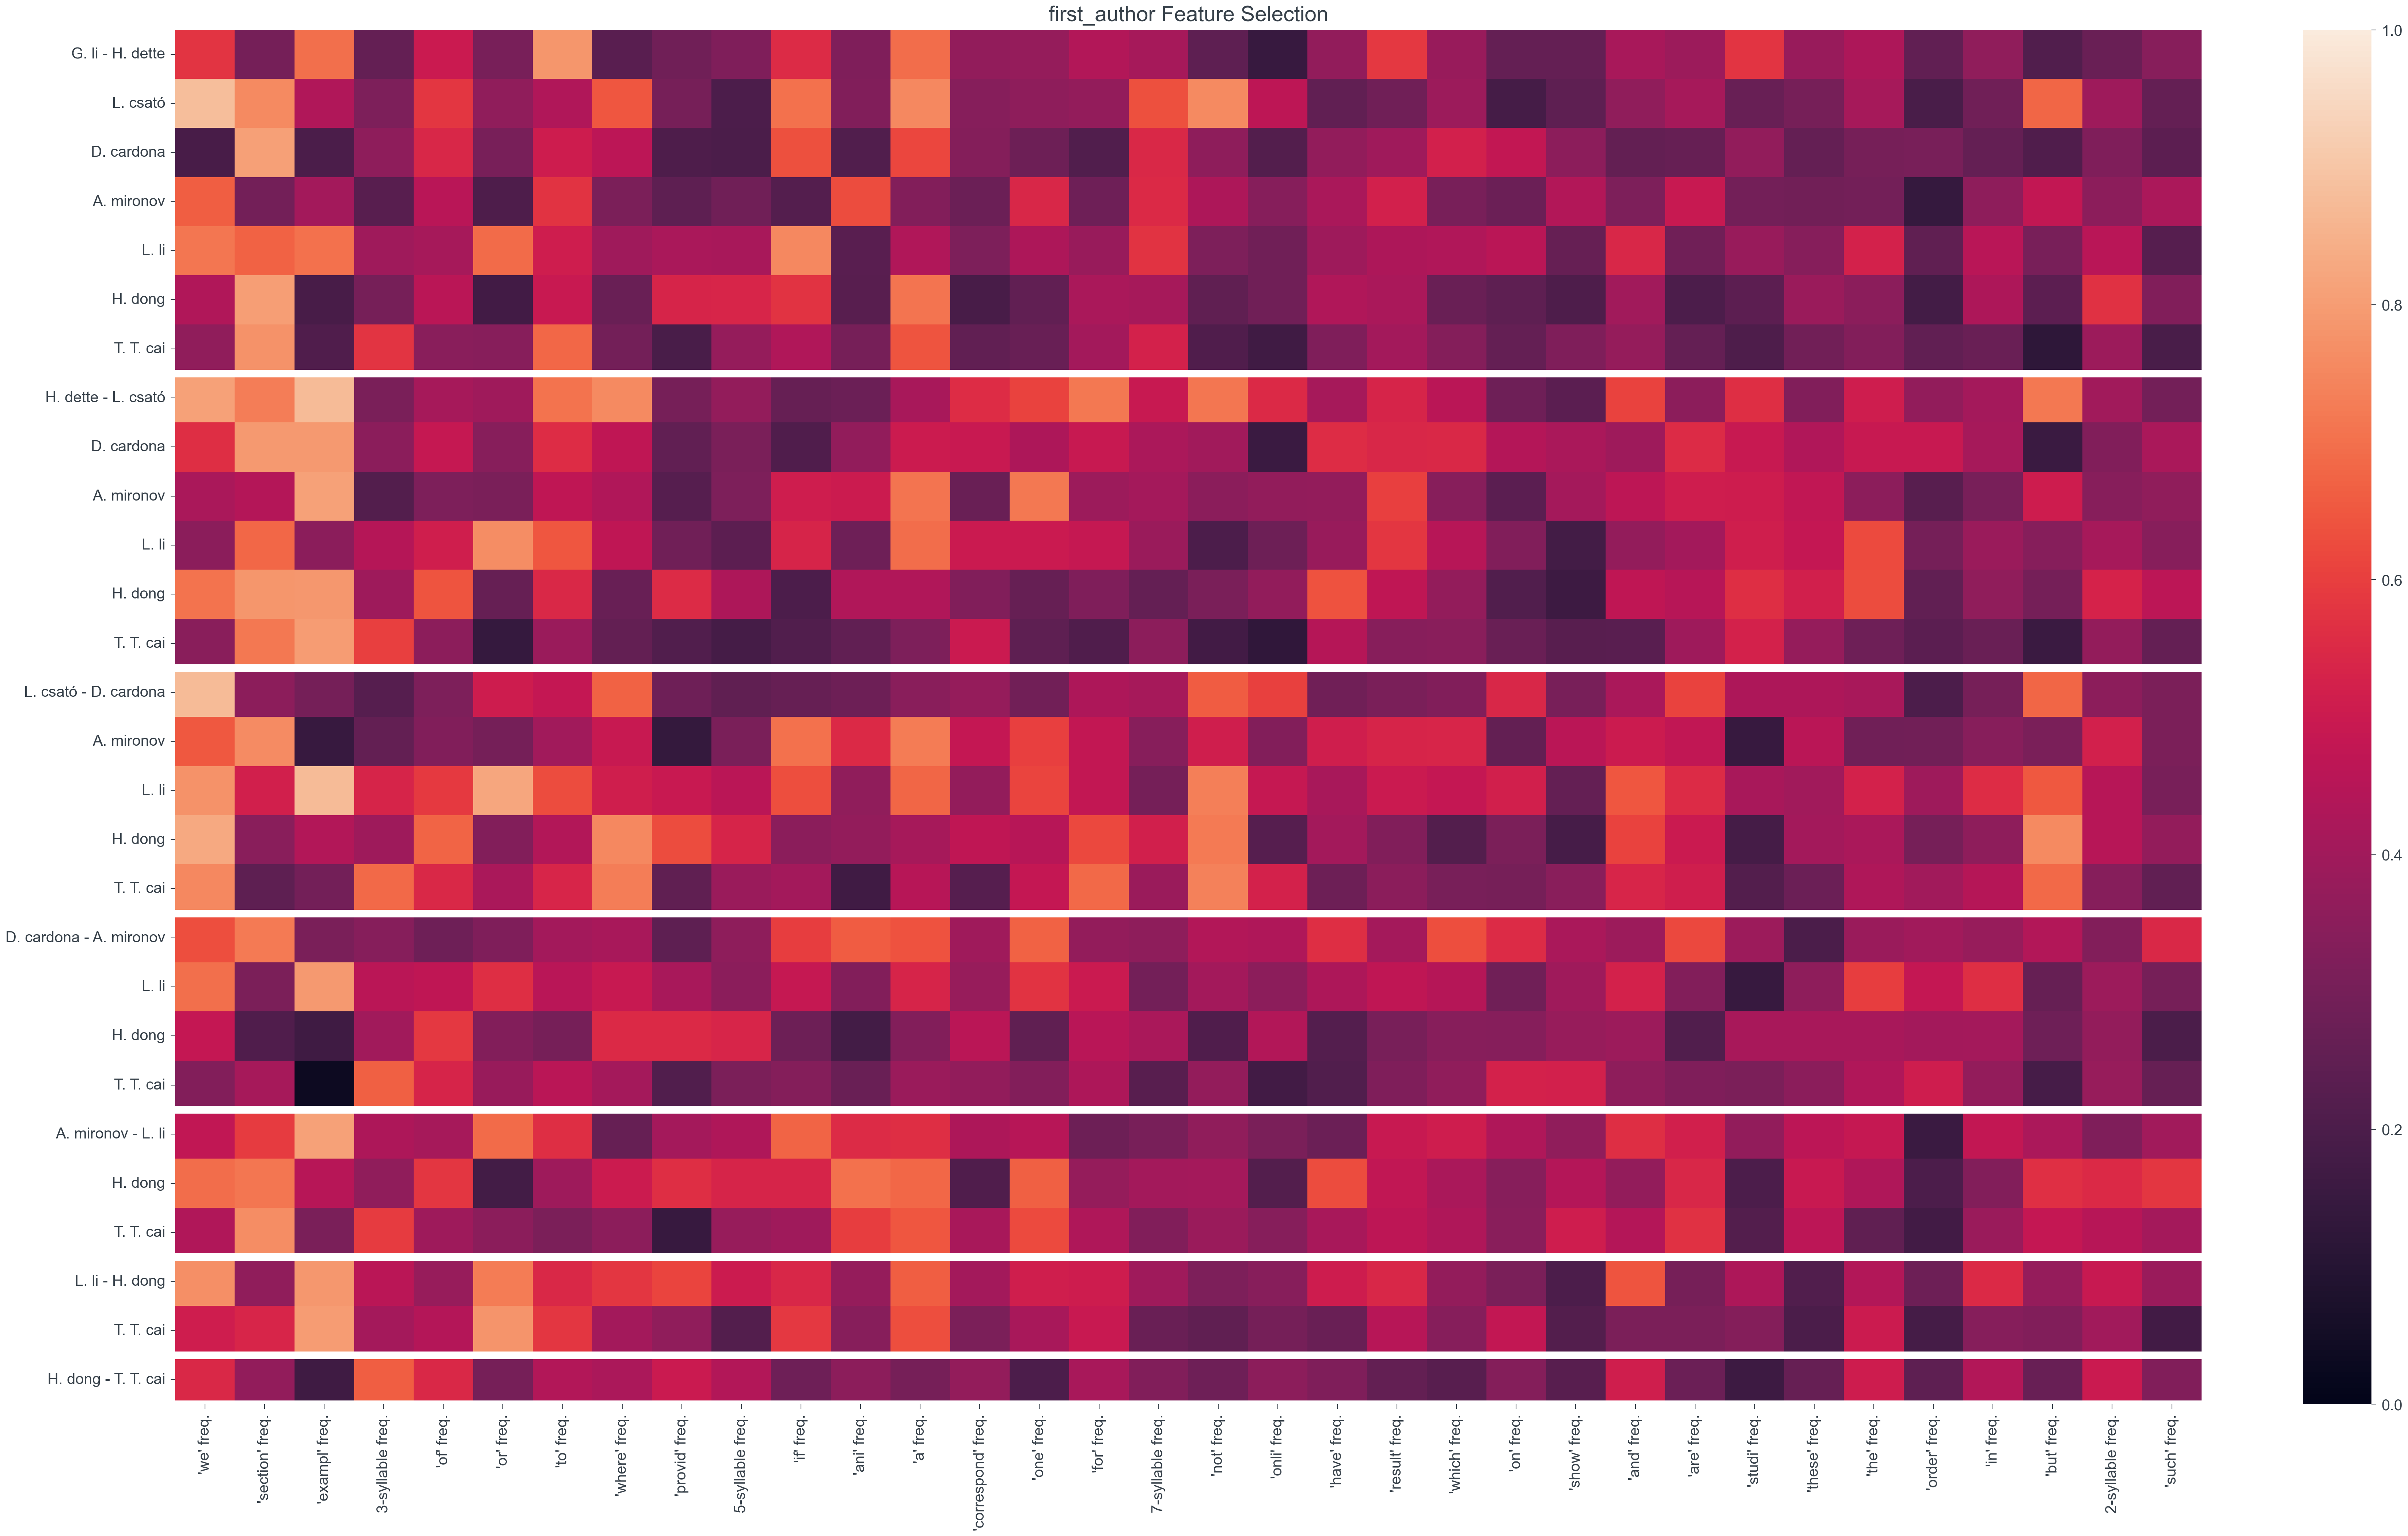

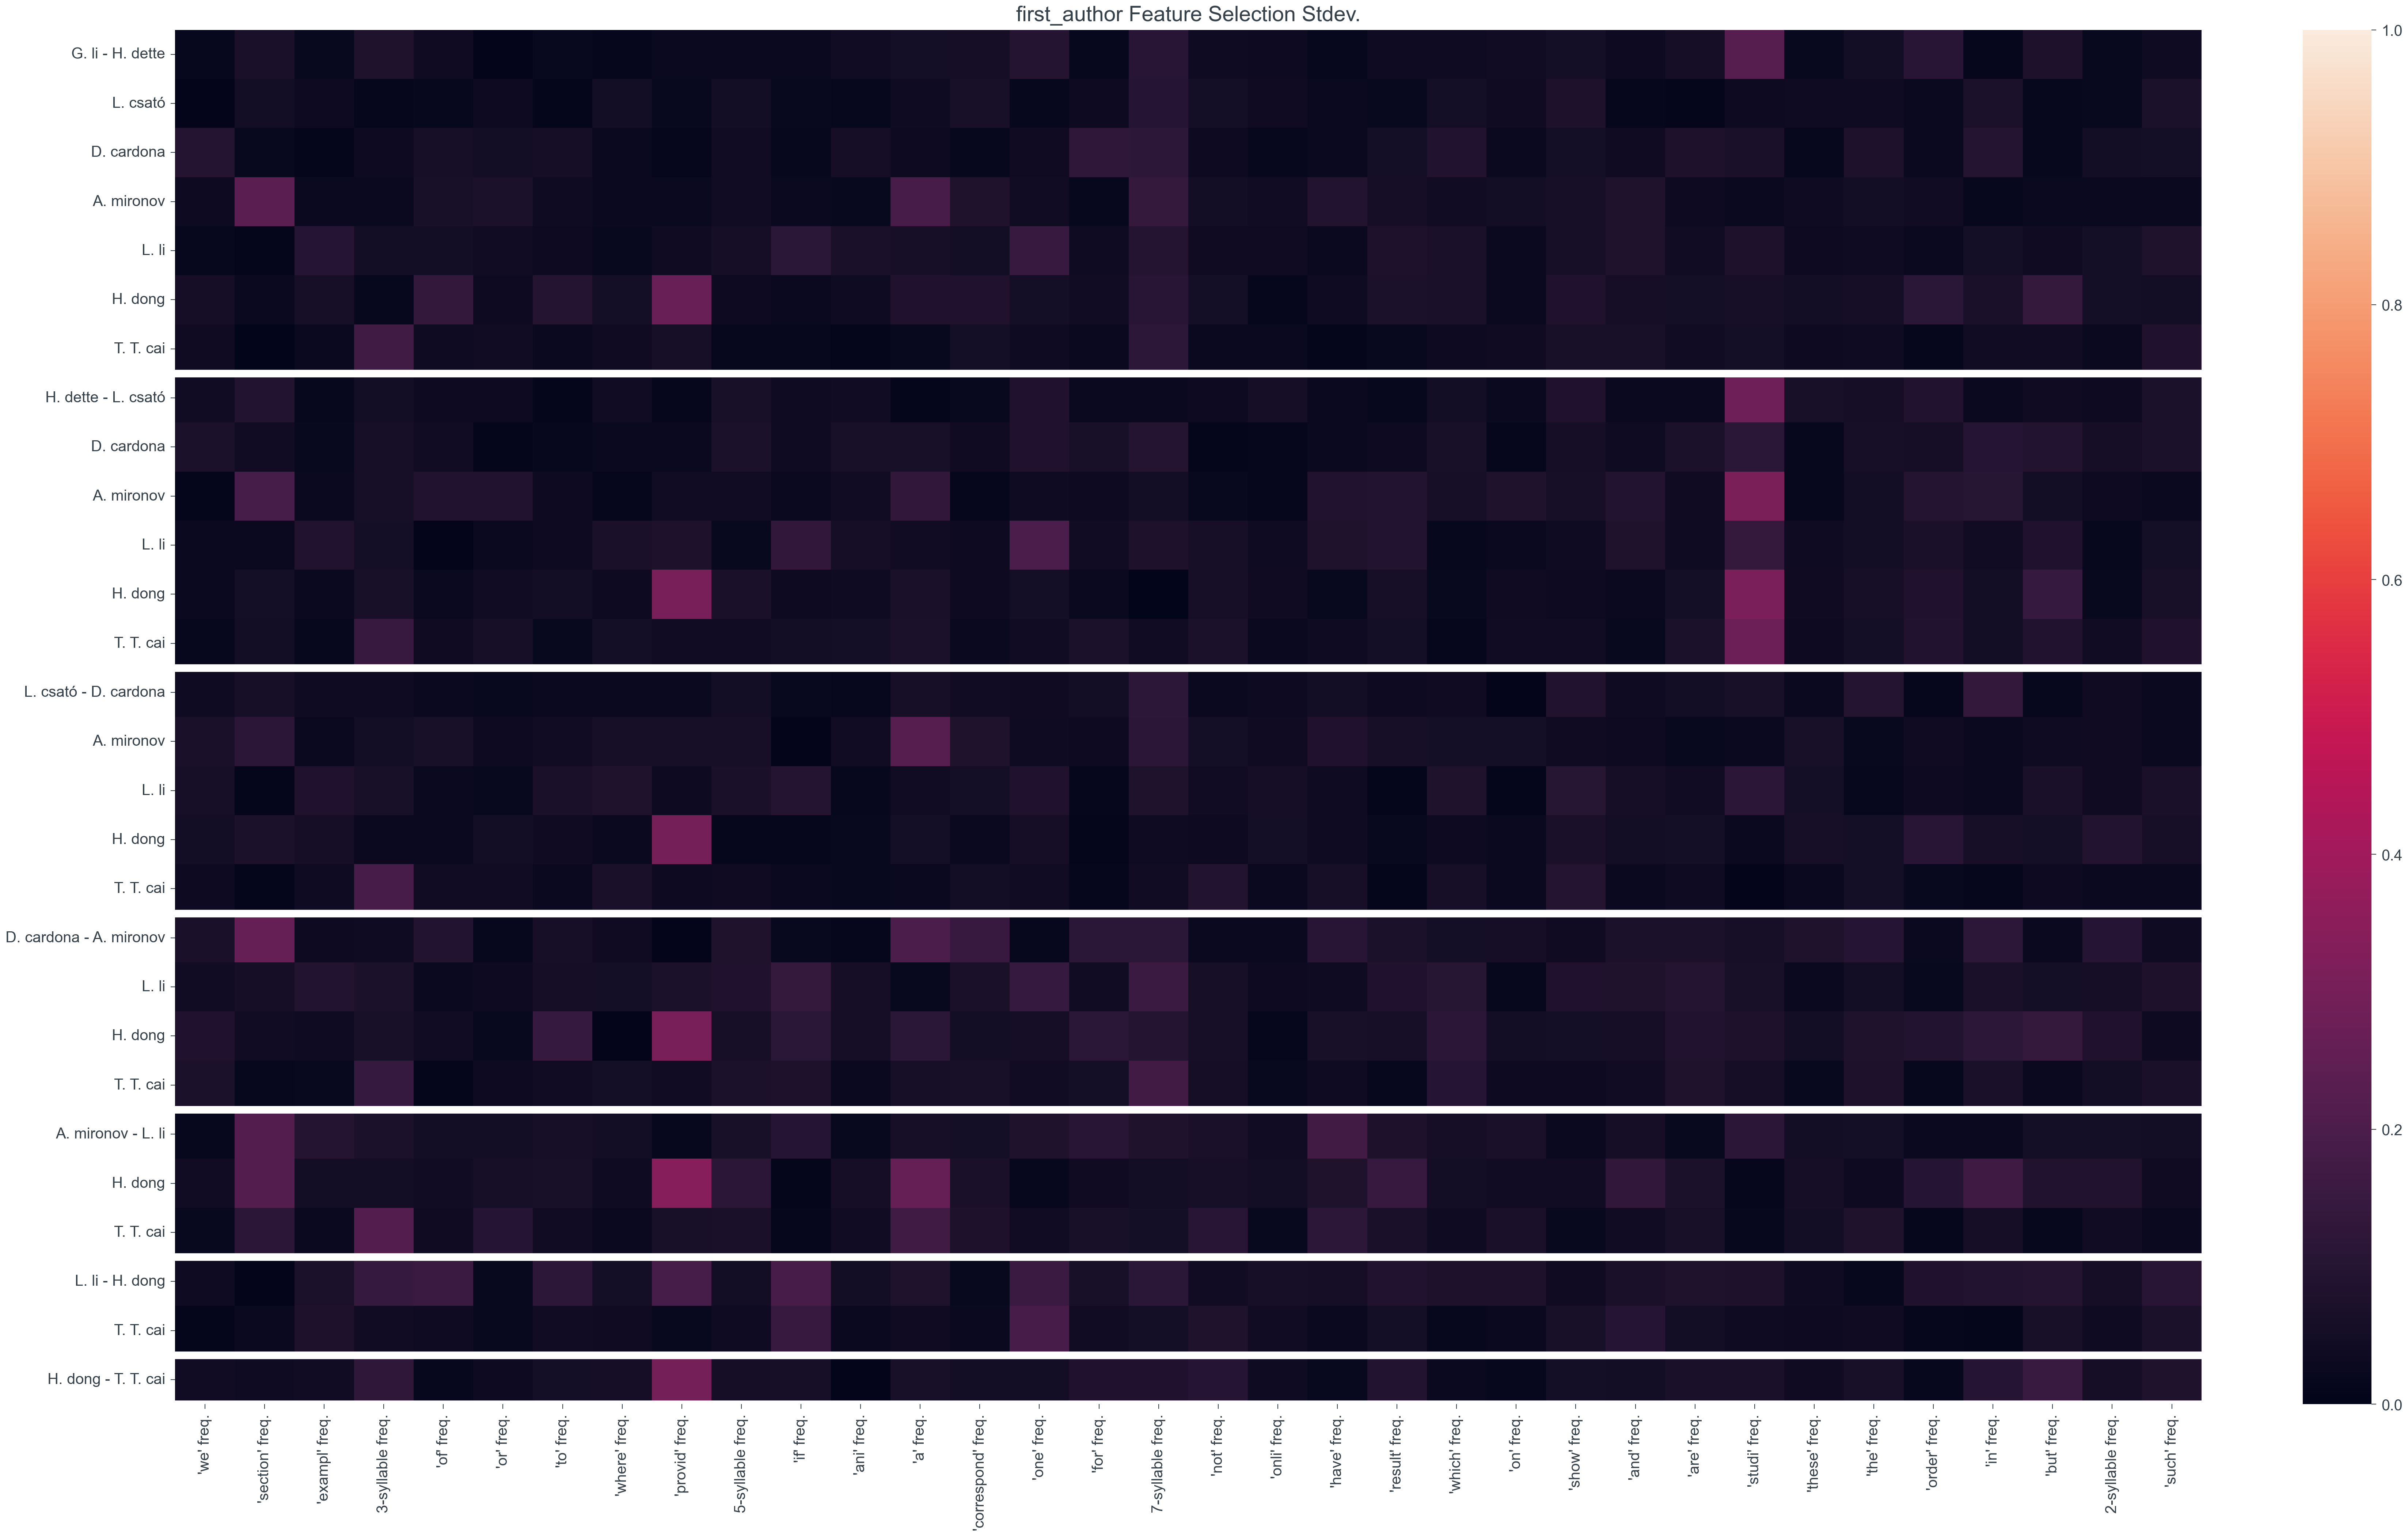

In [18]:
apply_style()
(predictions_general_34, 
 performances_general_34, 
 feature_selection_ratios_general_34, 
 feature_selection_dfs_general_34, 
 feature_selection_stdev_dfs_general_34,
 balanced_precisions_34) = analysis.pipeline_wrapper(root_folders[0], feature_select_nums=[34], show_graphics=True)

Mode: STANDARD (Lines)
Tübingen Style Applied successfully!


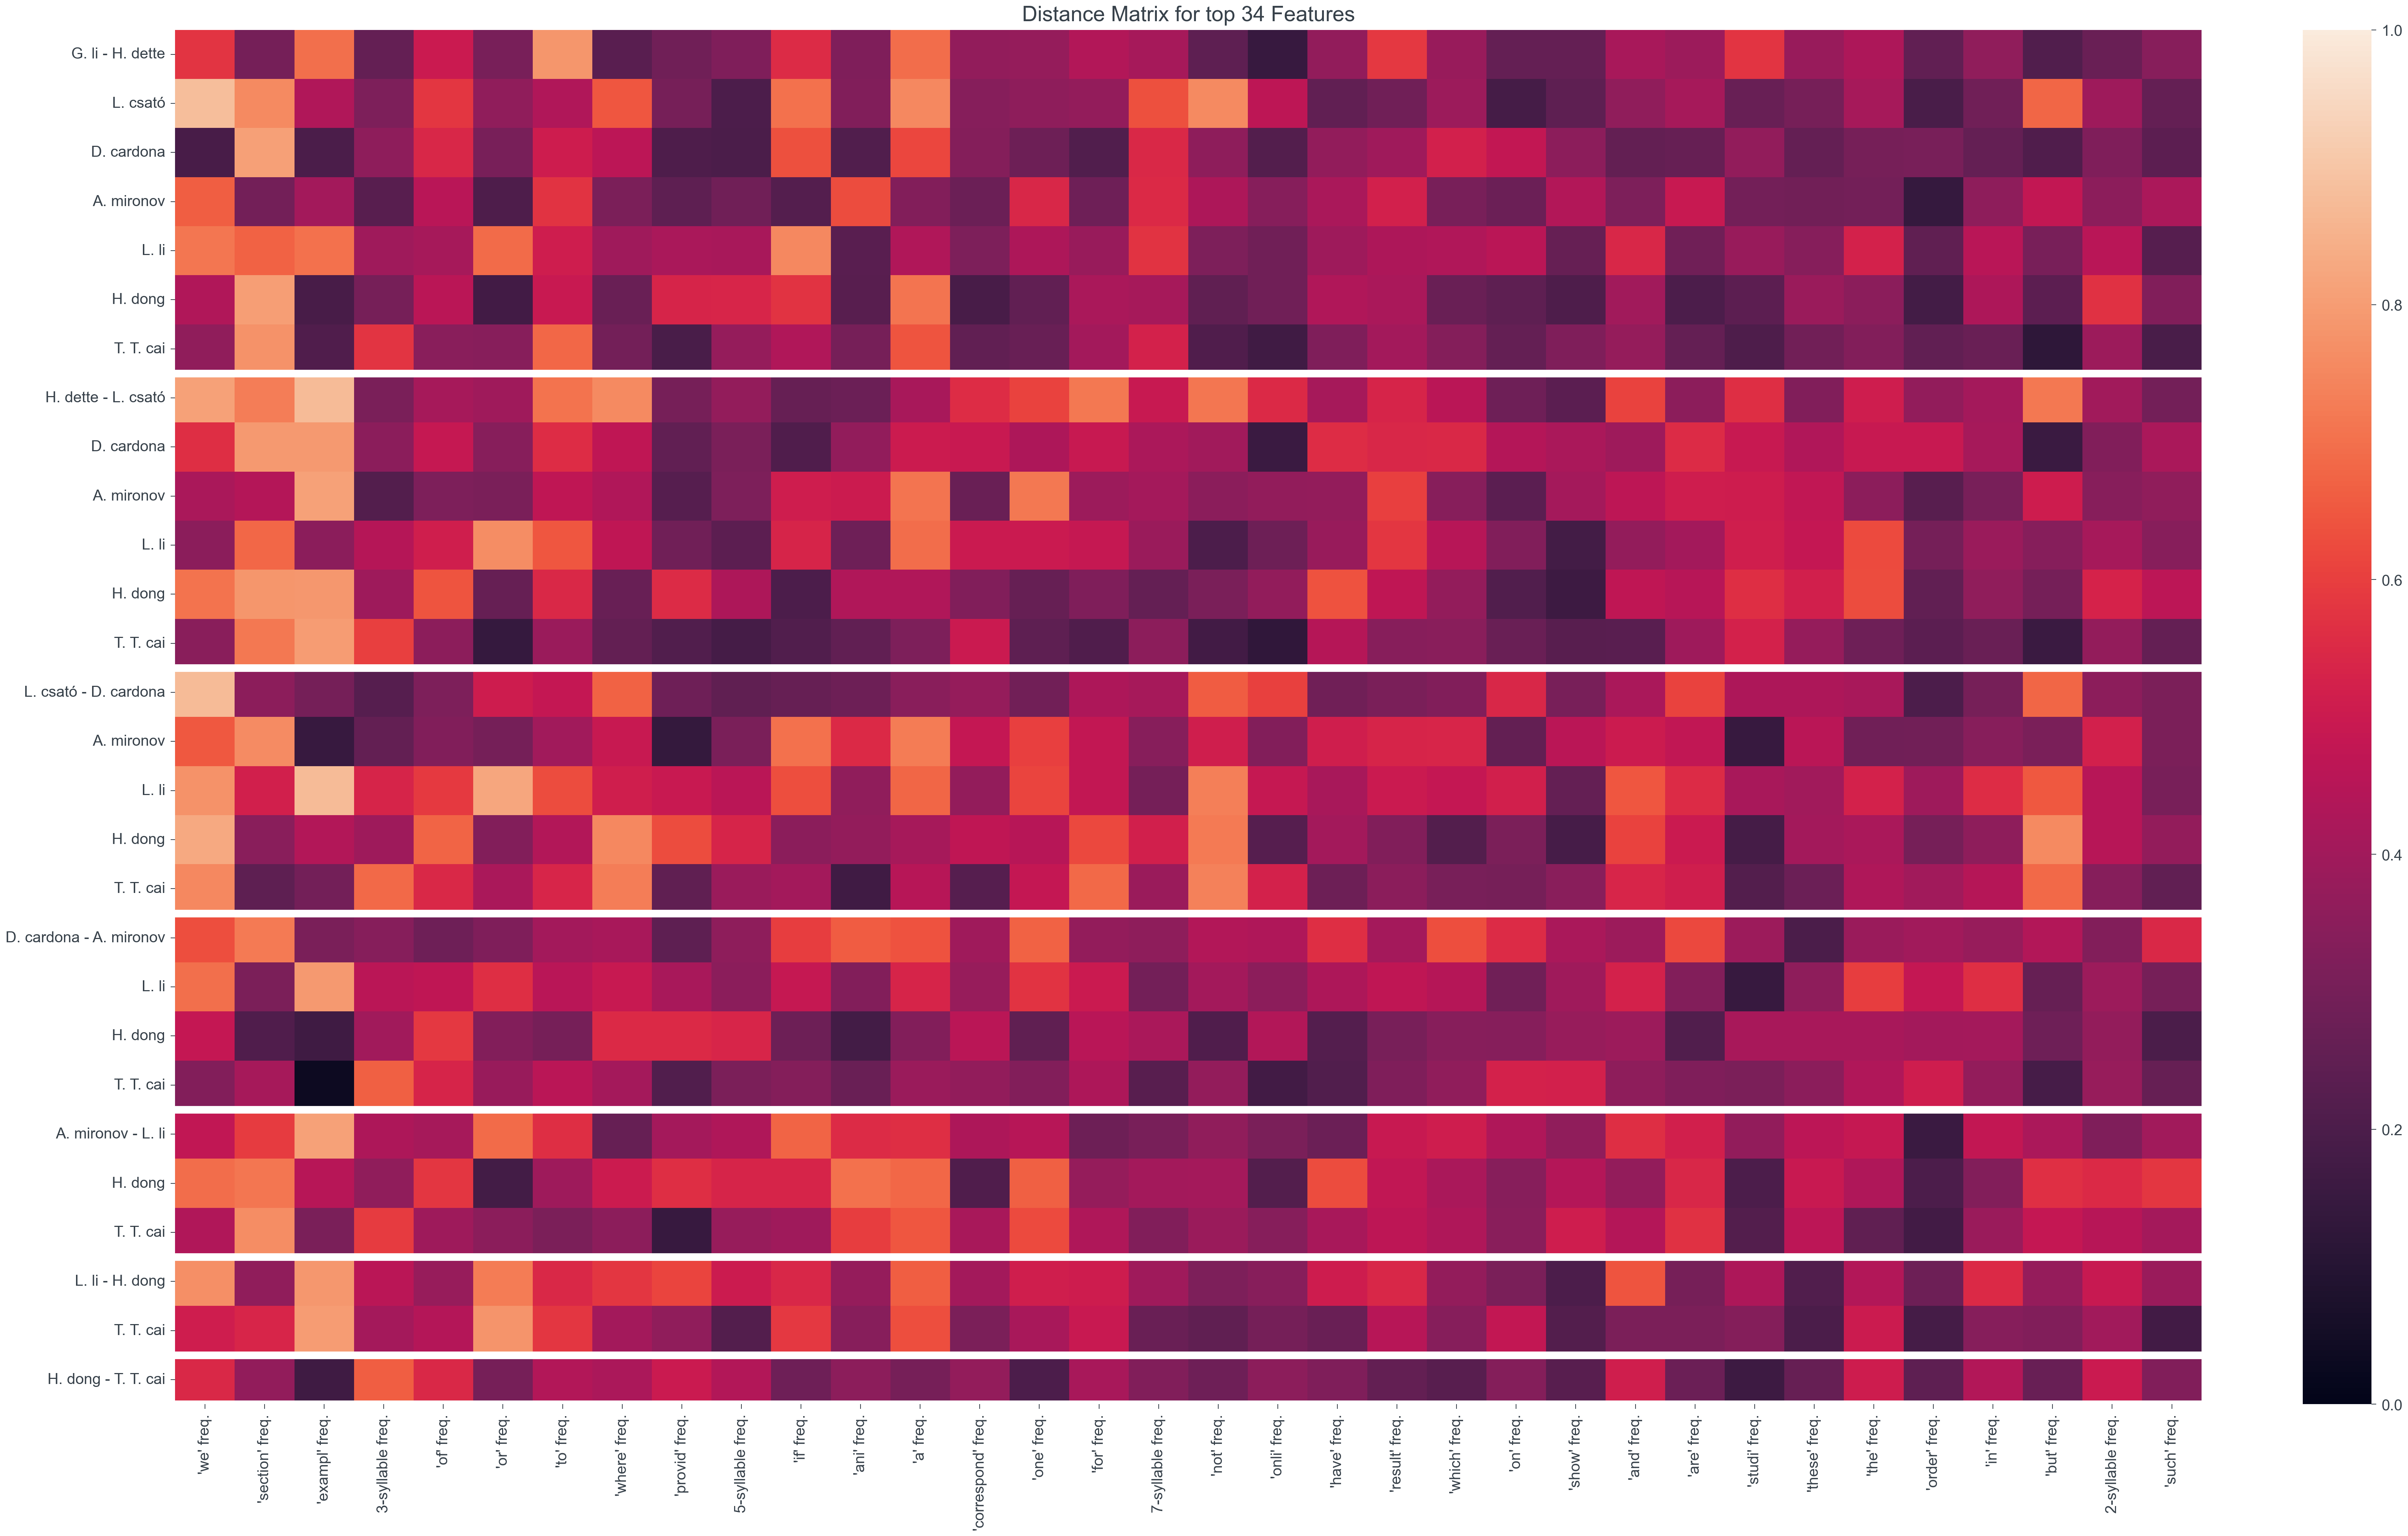

In [20]:
from src.plotting import visualize_multiindex_df

apply_style()
feature_selection_df = feature_selection_dfs_general_34[34]["first_author"]
visualize_multiindex_df(data_df=feature_selection_df, 
                        title="Distance Matrix for top 34 Features", 
                        save_path=root_folders[0]+"Feature_analysis_34", 
                        annot=False, x_ax_factor=0.5, y_ax_factor=0.5, show_graphics=True)

2026-02-02 15:14:25,961 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:14:26,317 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:15:36,315 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:15:36,666 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:17:02,874 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:17:03,234 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:18:37,841 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:18:38,249 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:20:24,262 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:20:24,613 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:22:29,863 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:22:30,293 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:25:07,757 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:25:08,113 - WARNING - Removed zero-count row: 2503.1981
2026-02-02 15:29:52,

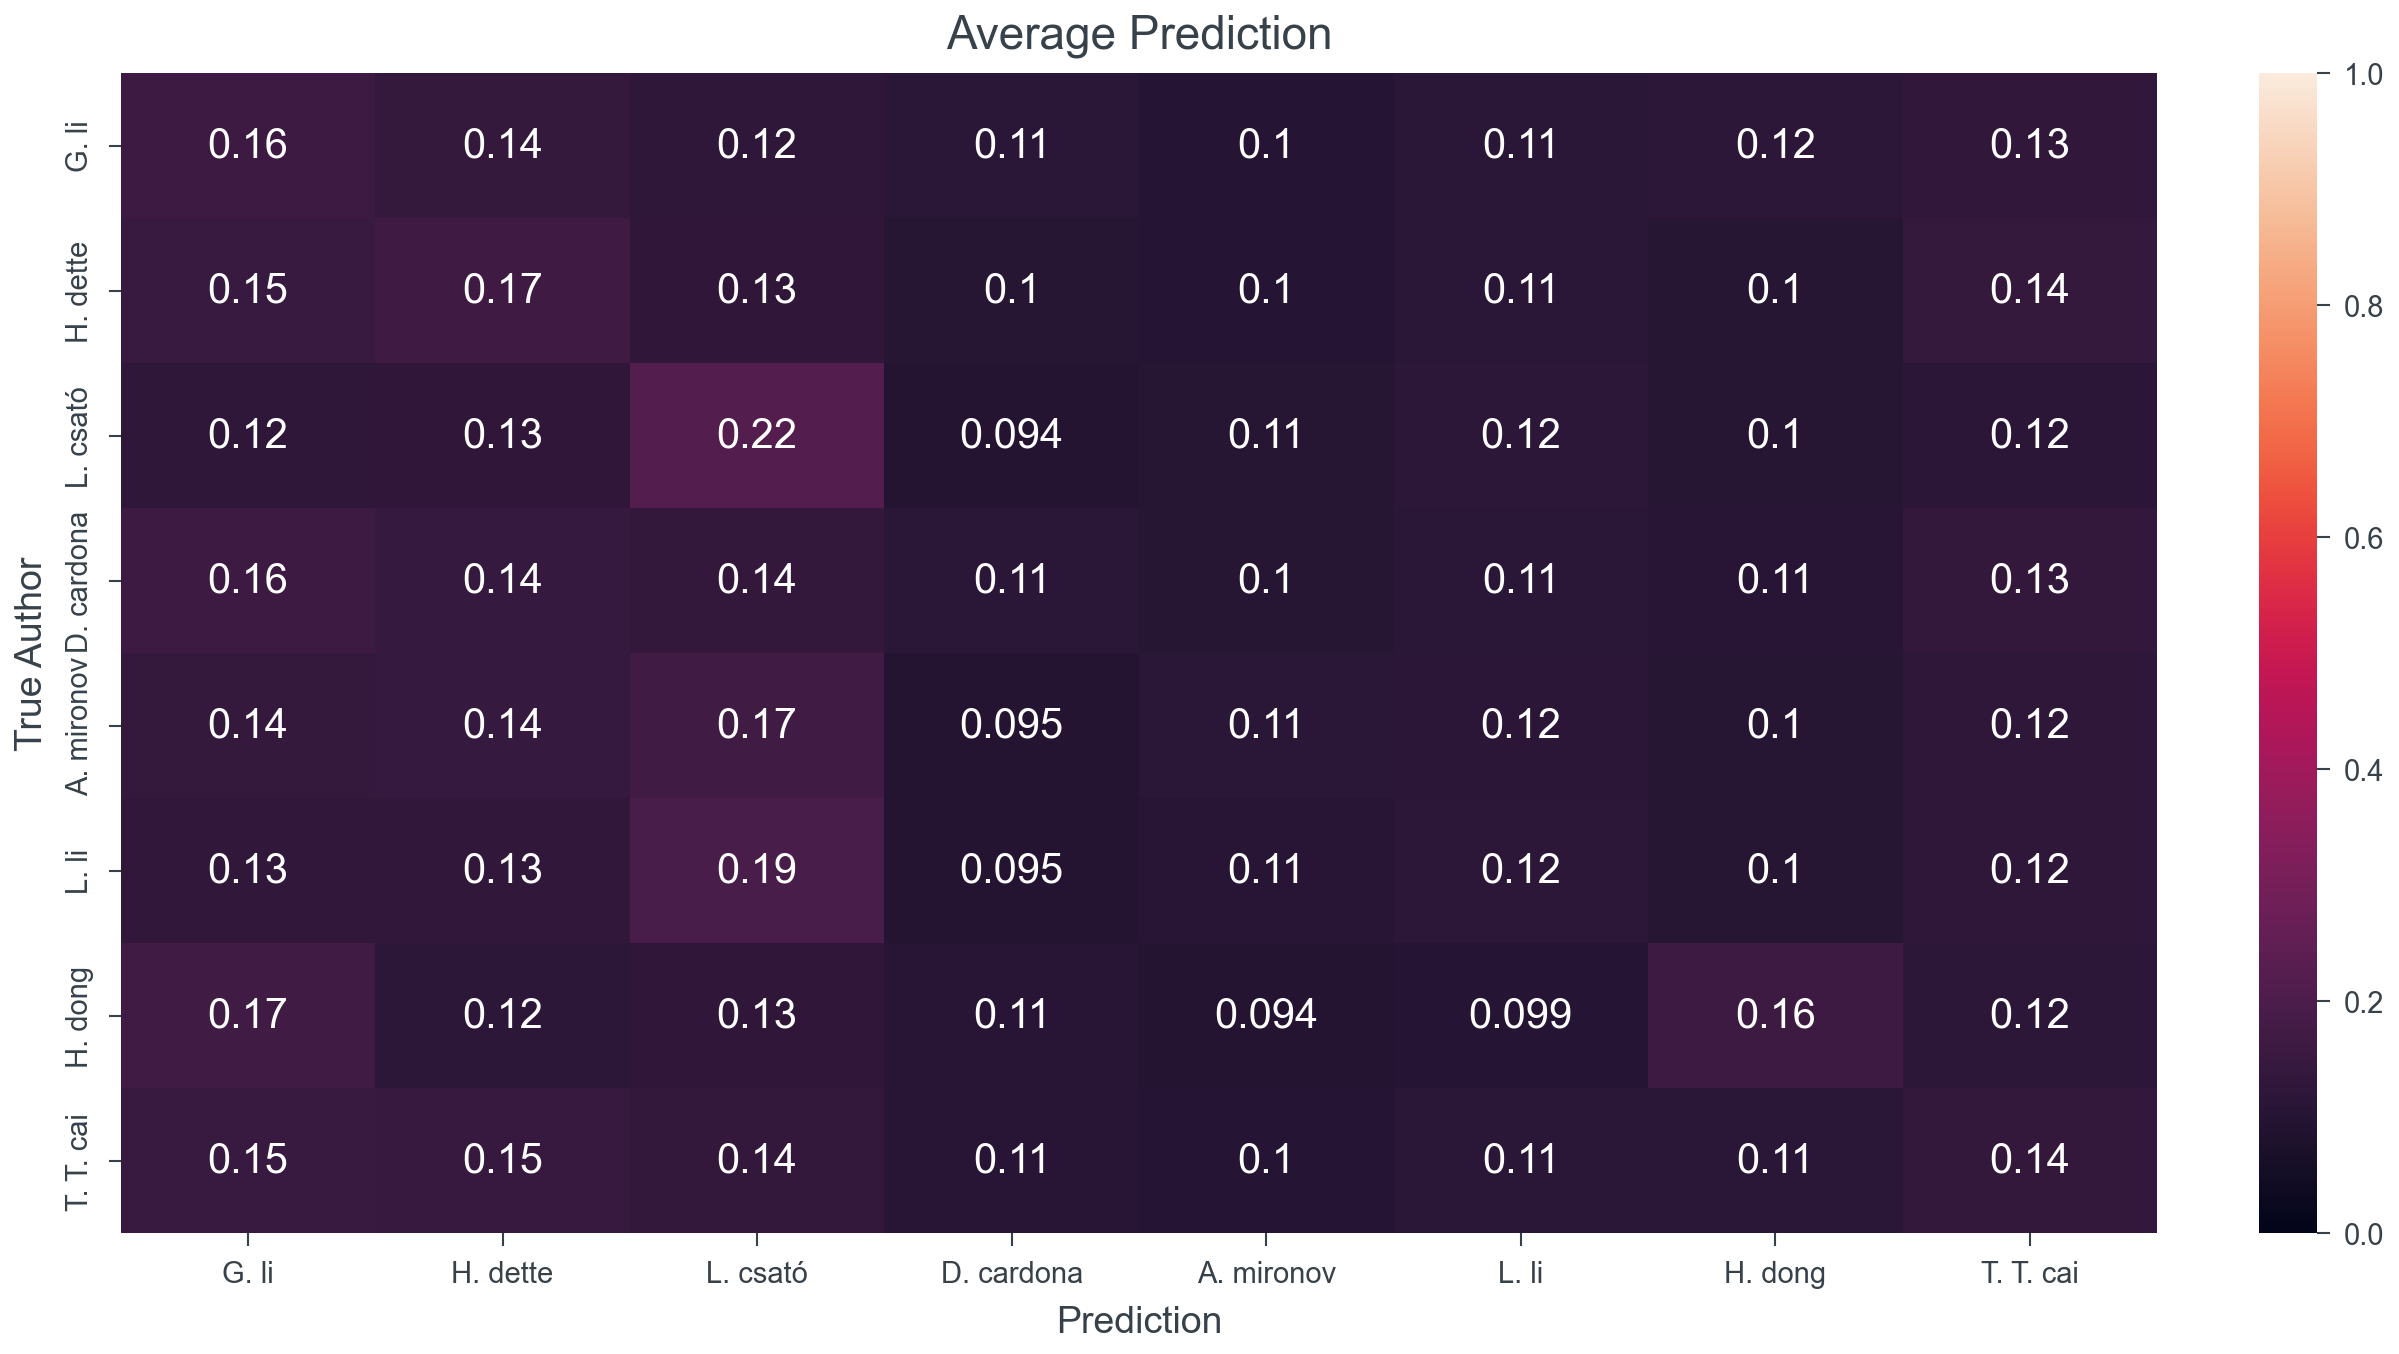

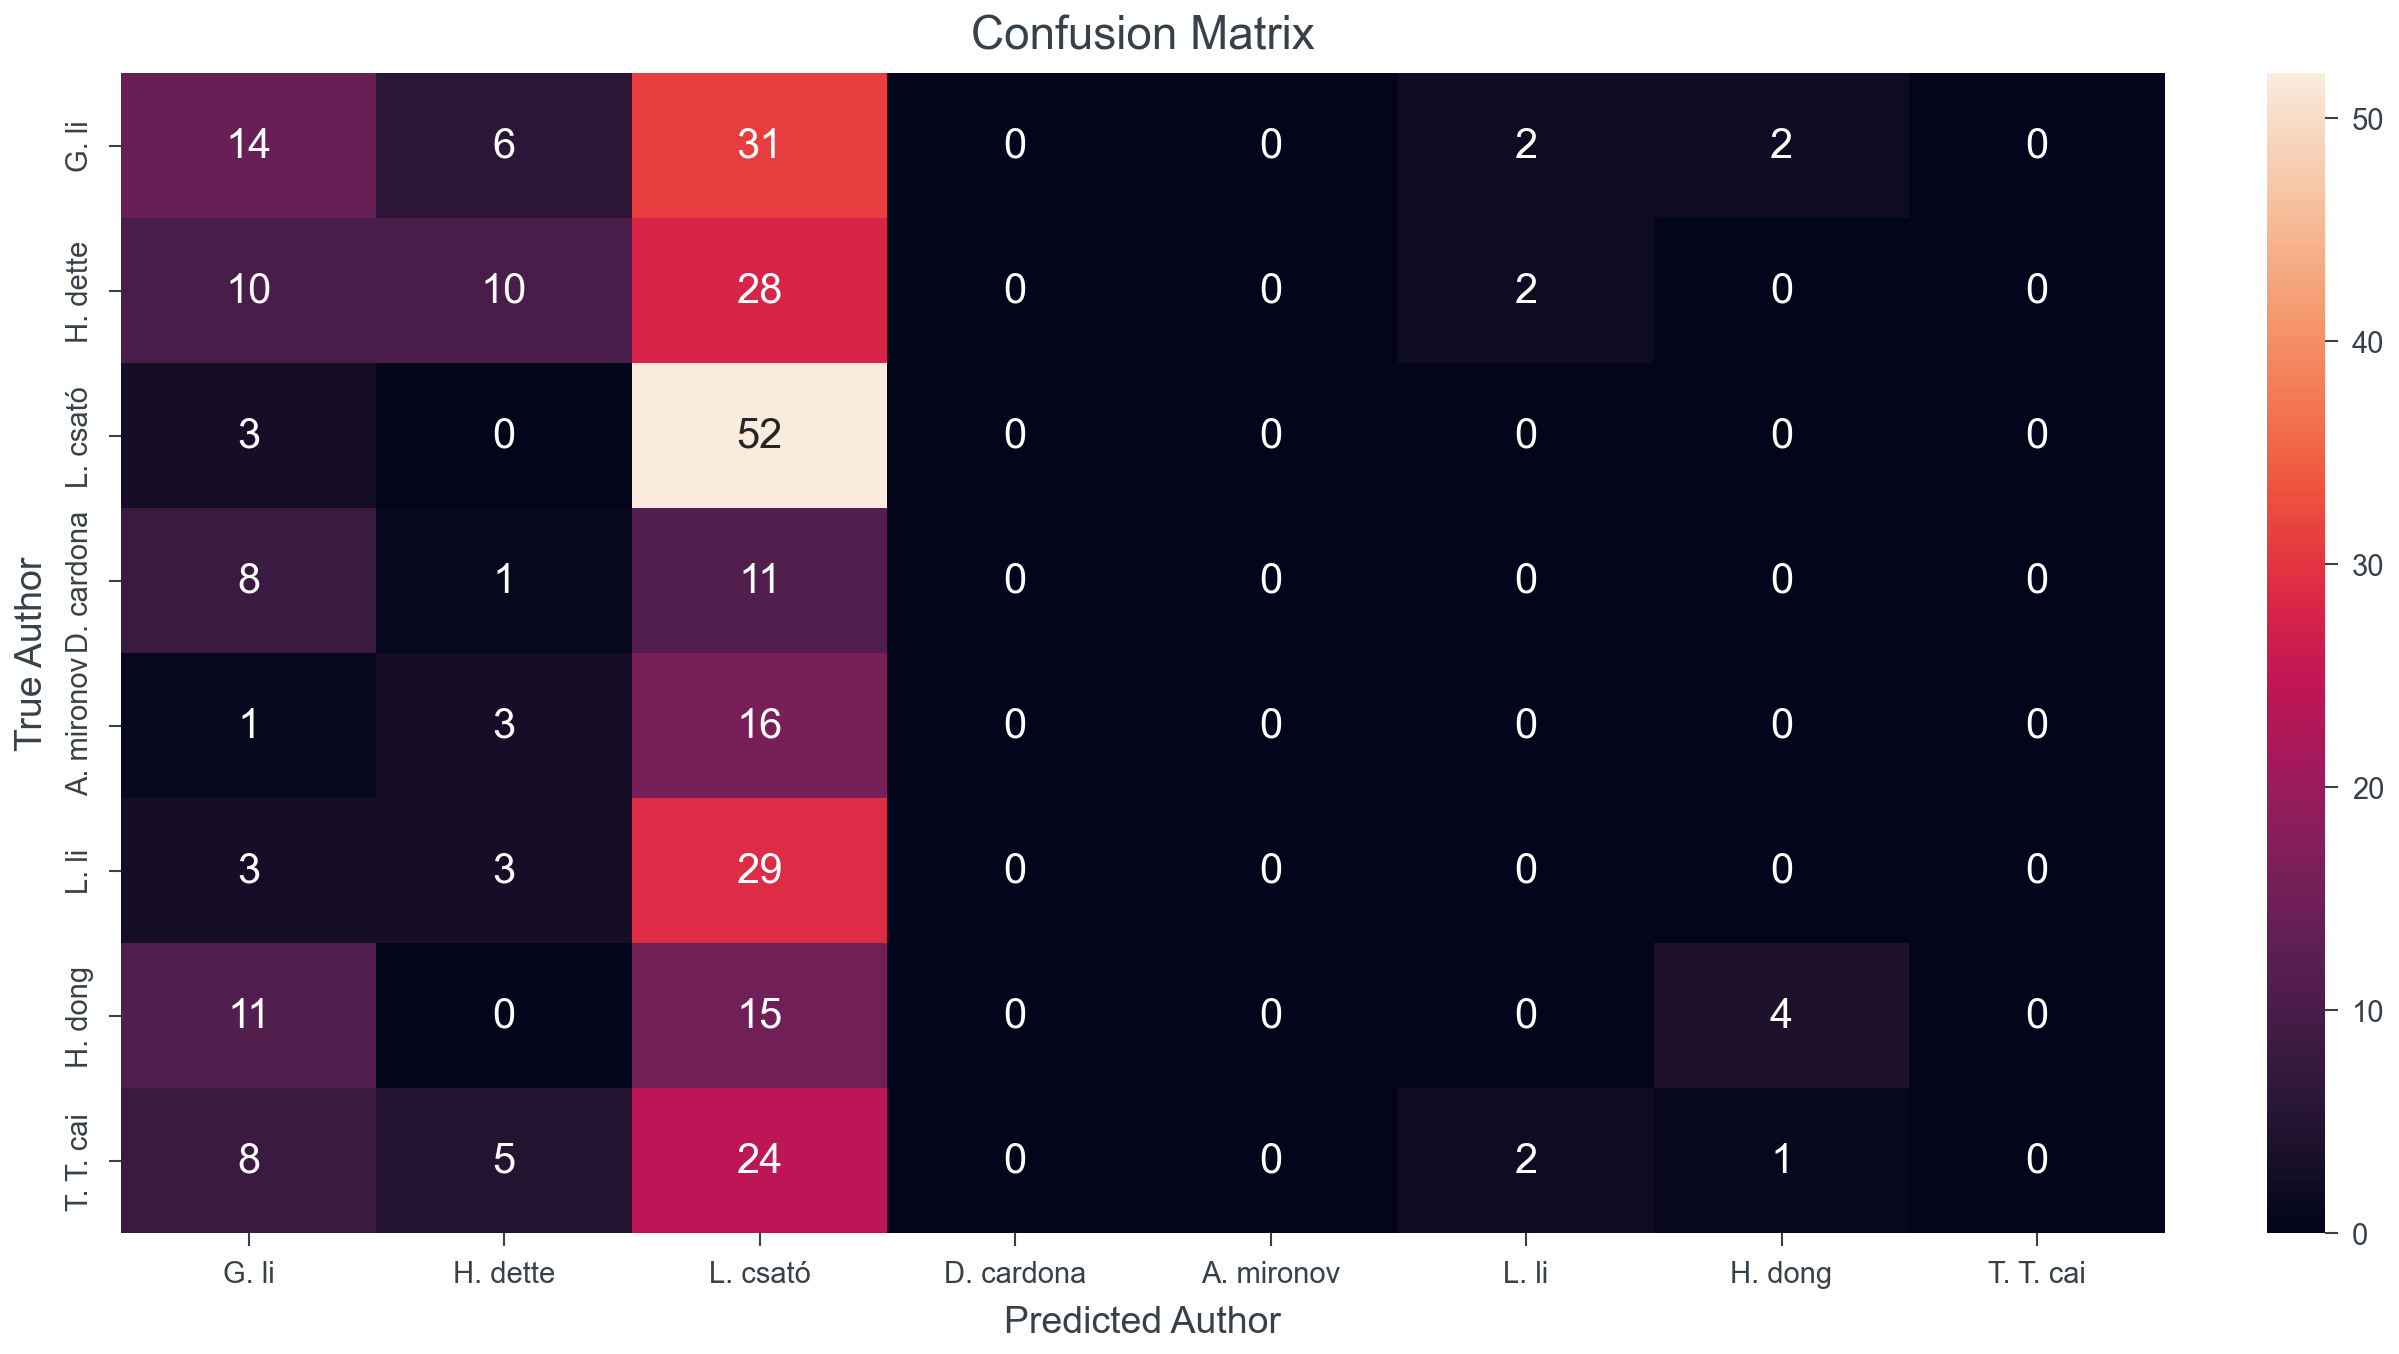

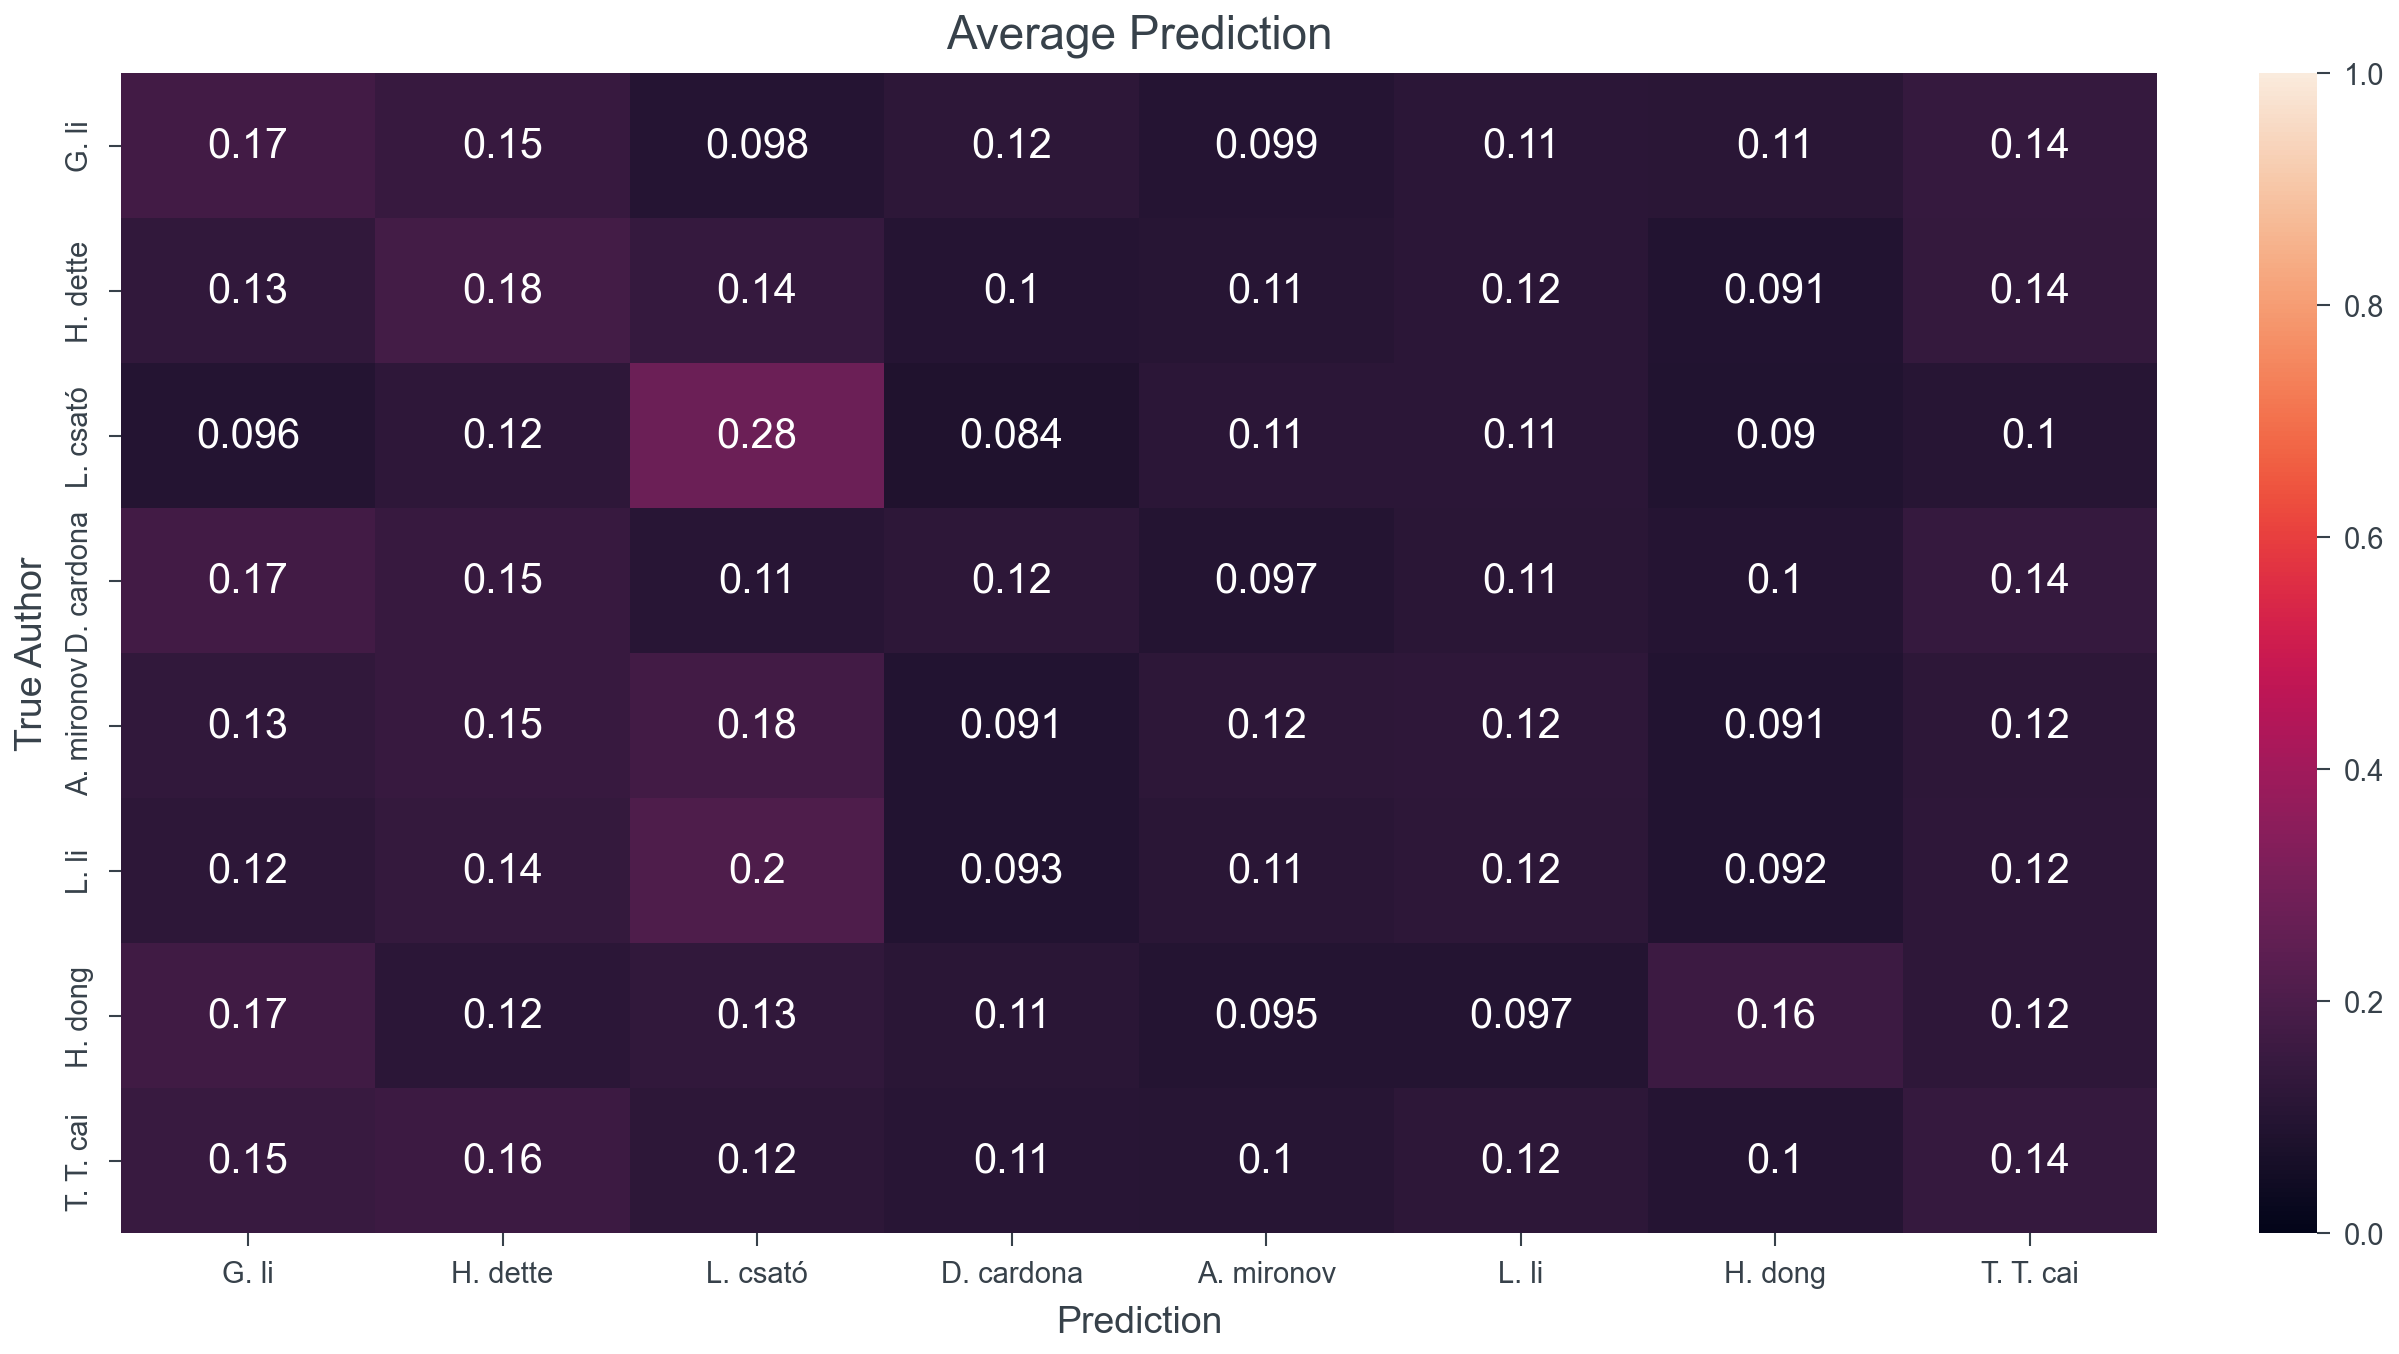

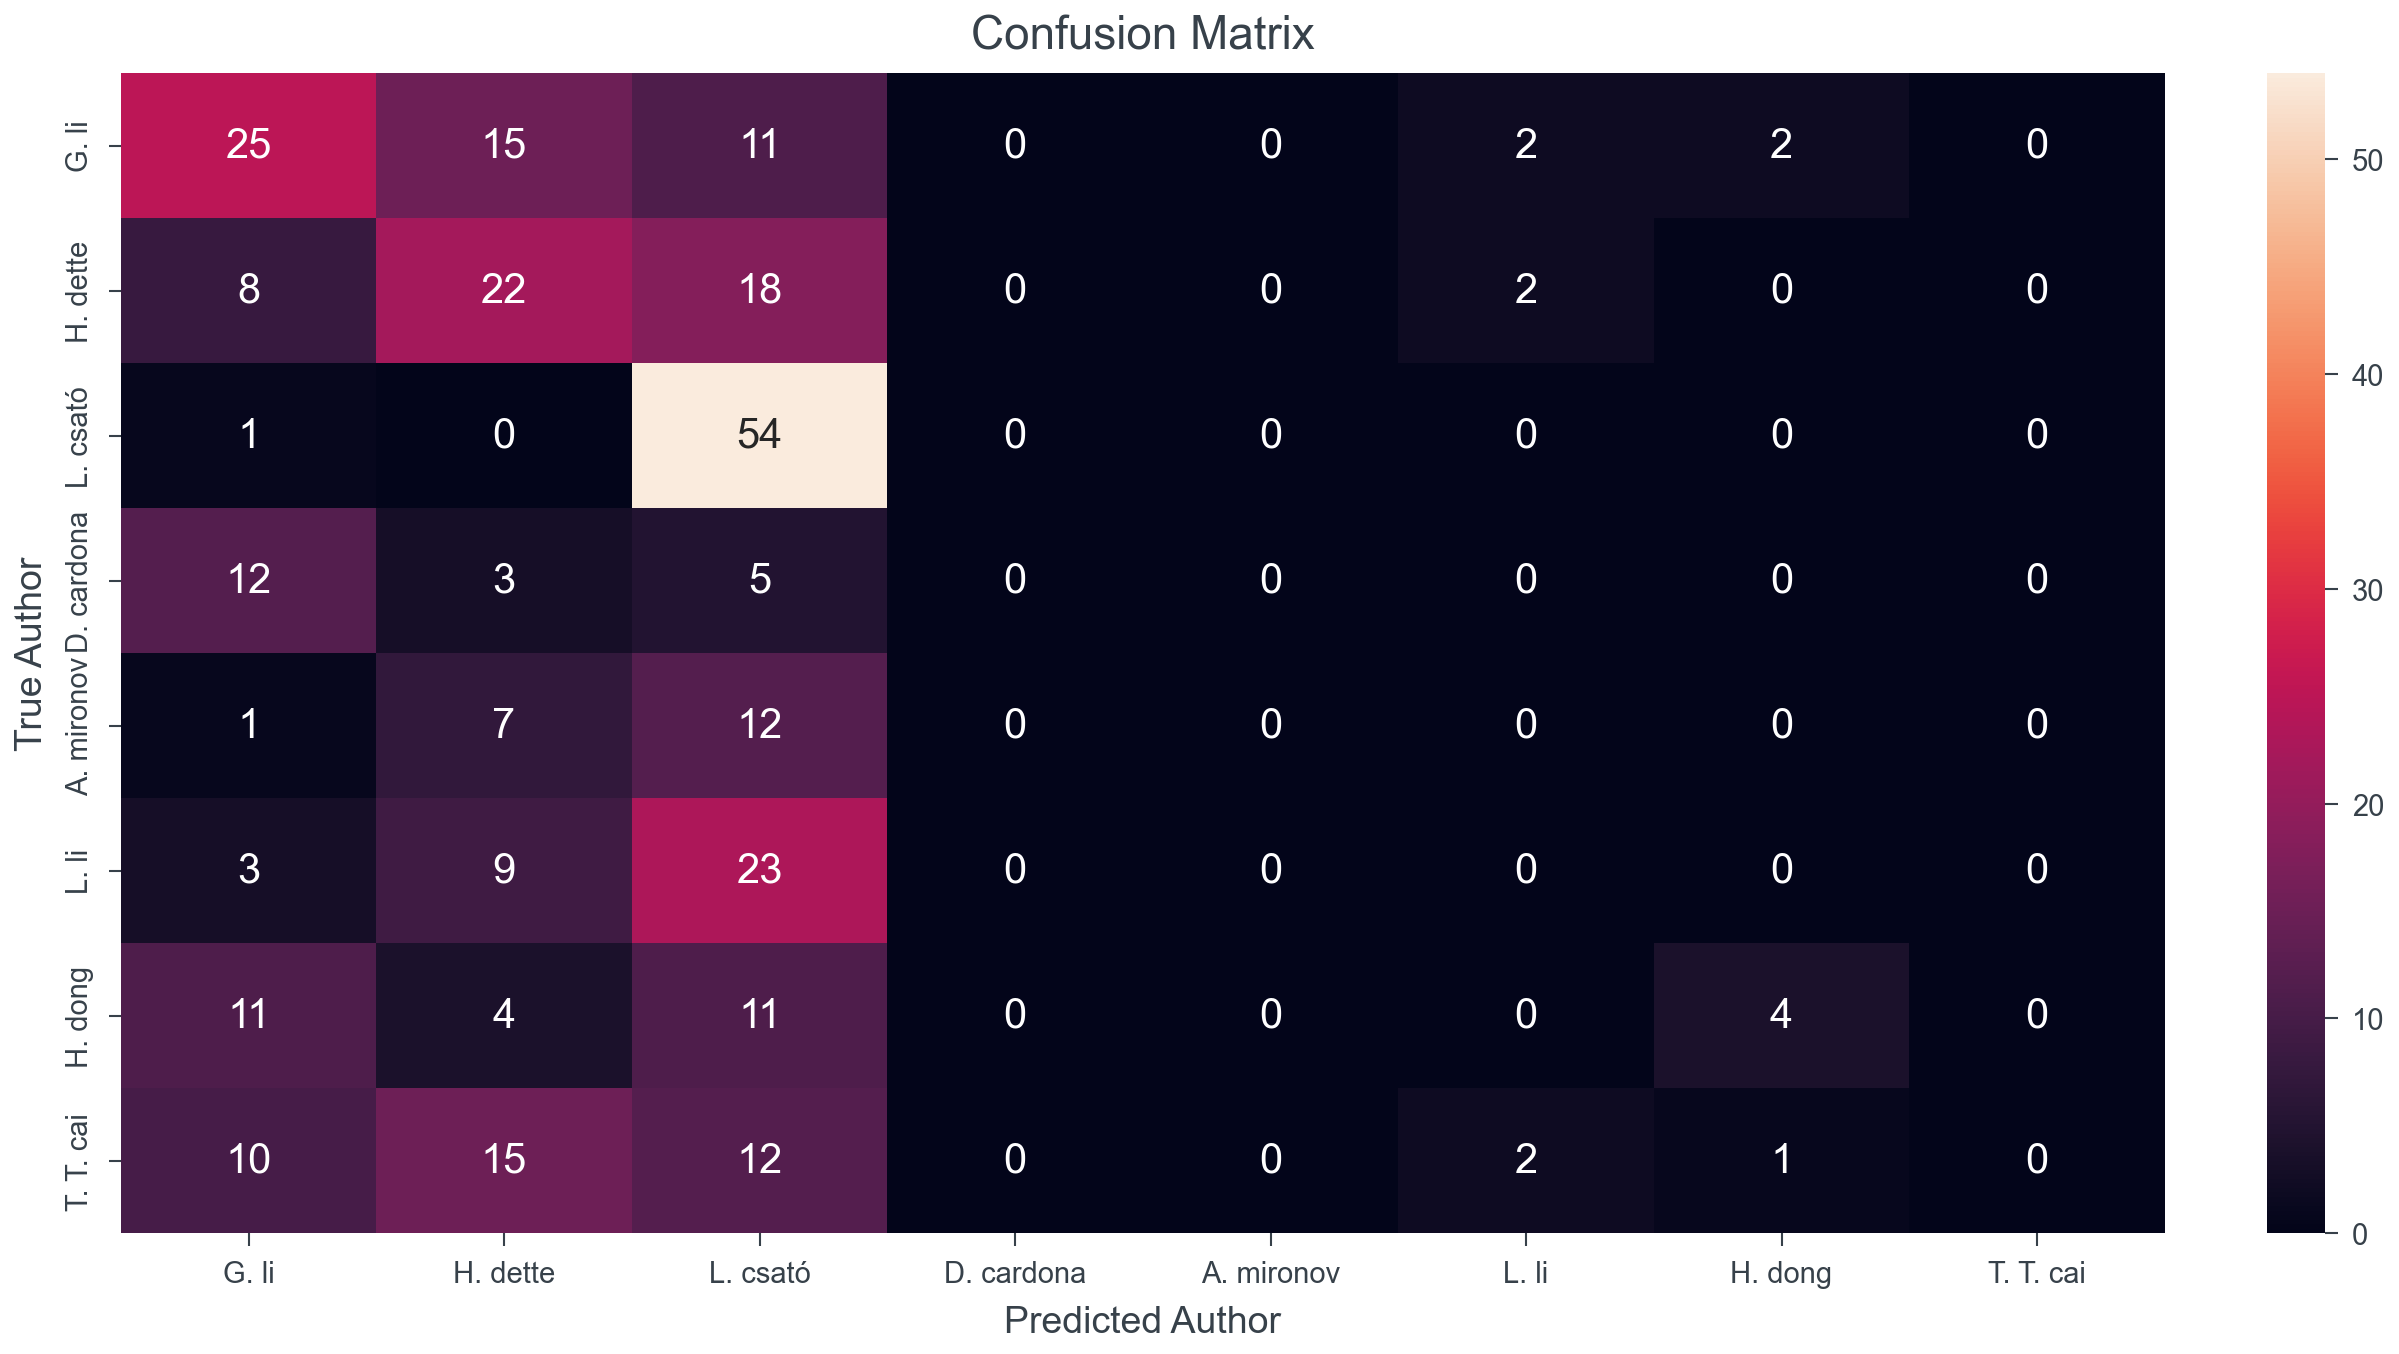

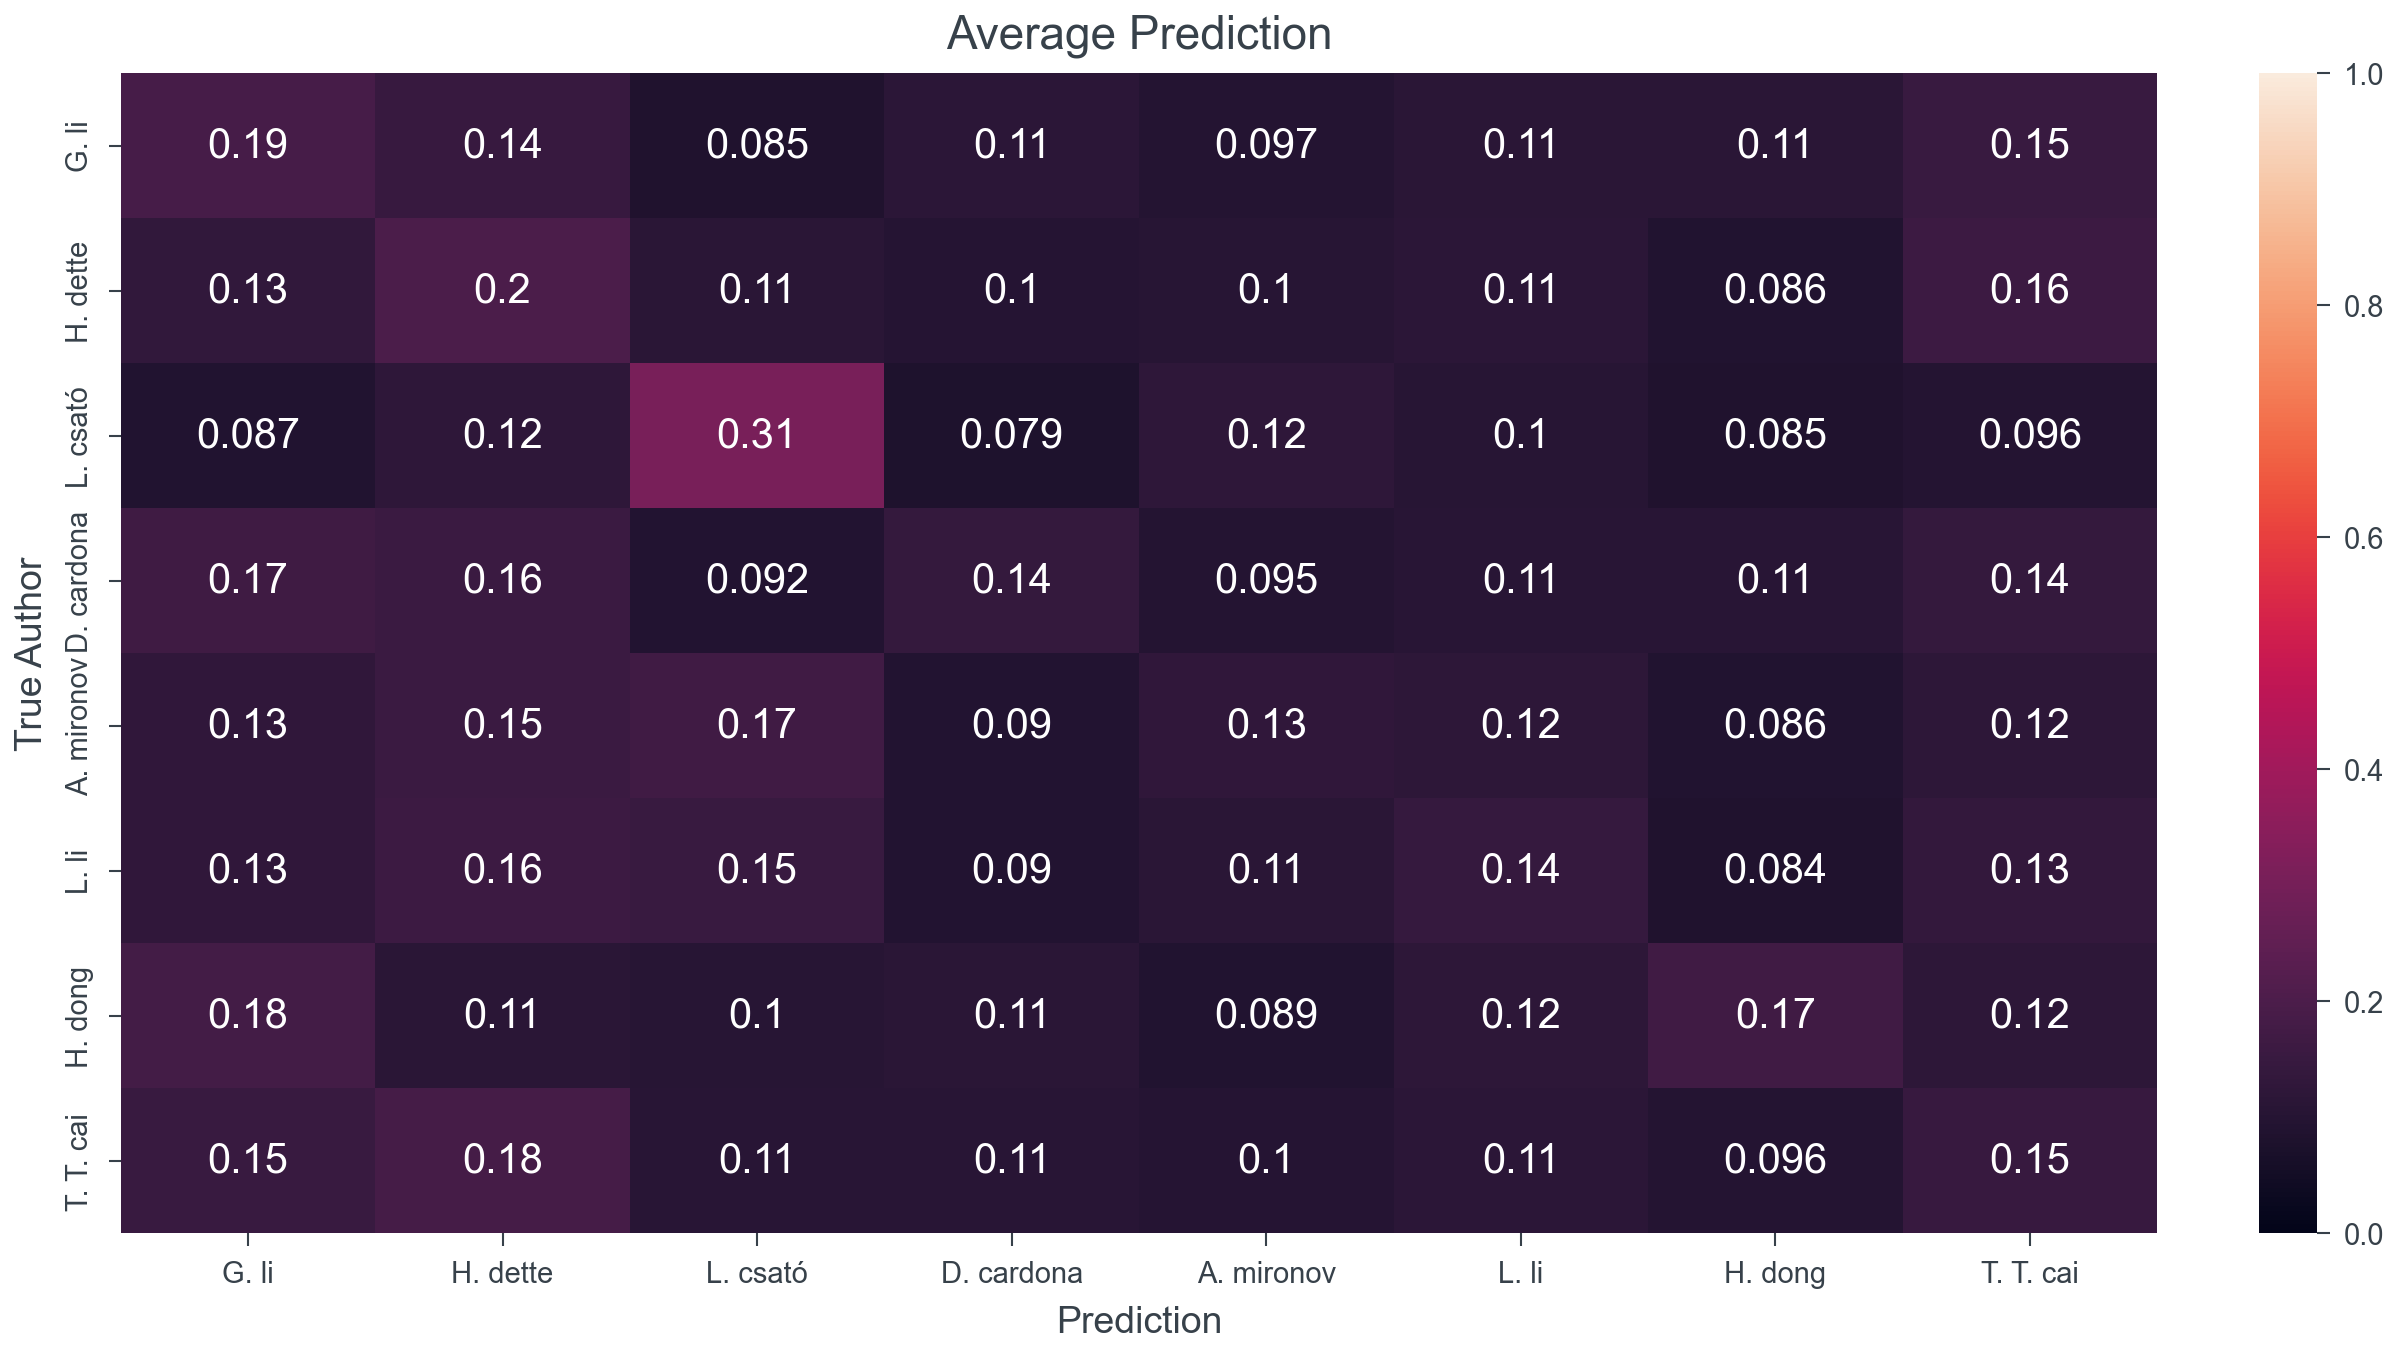

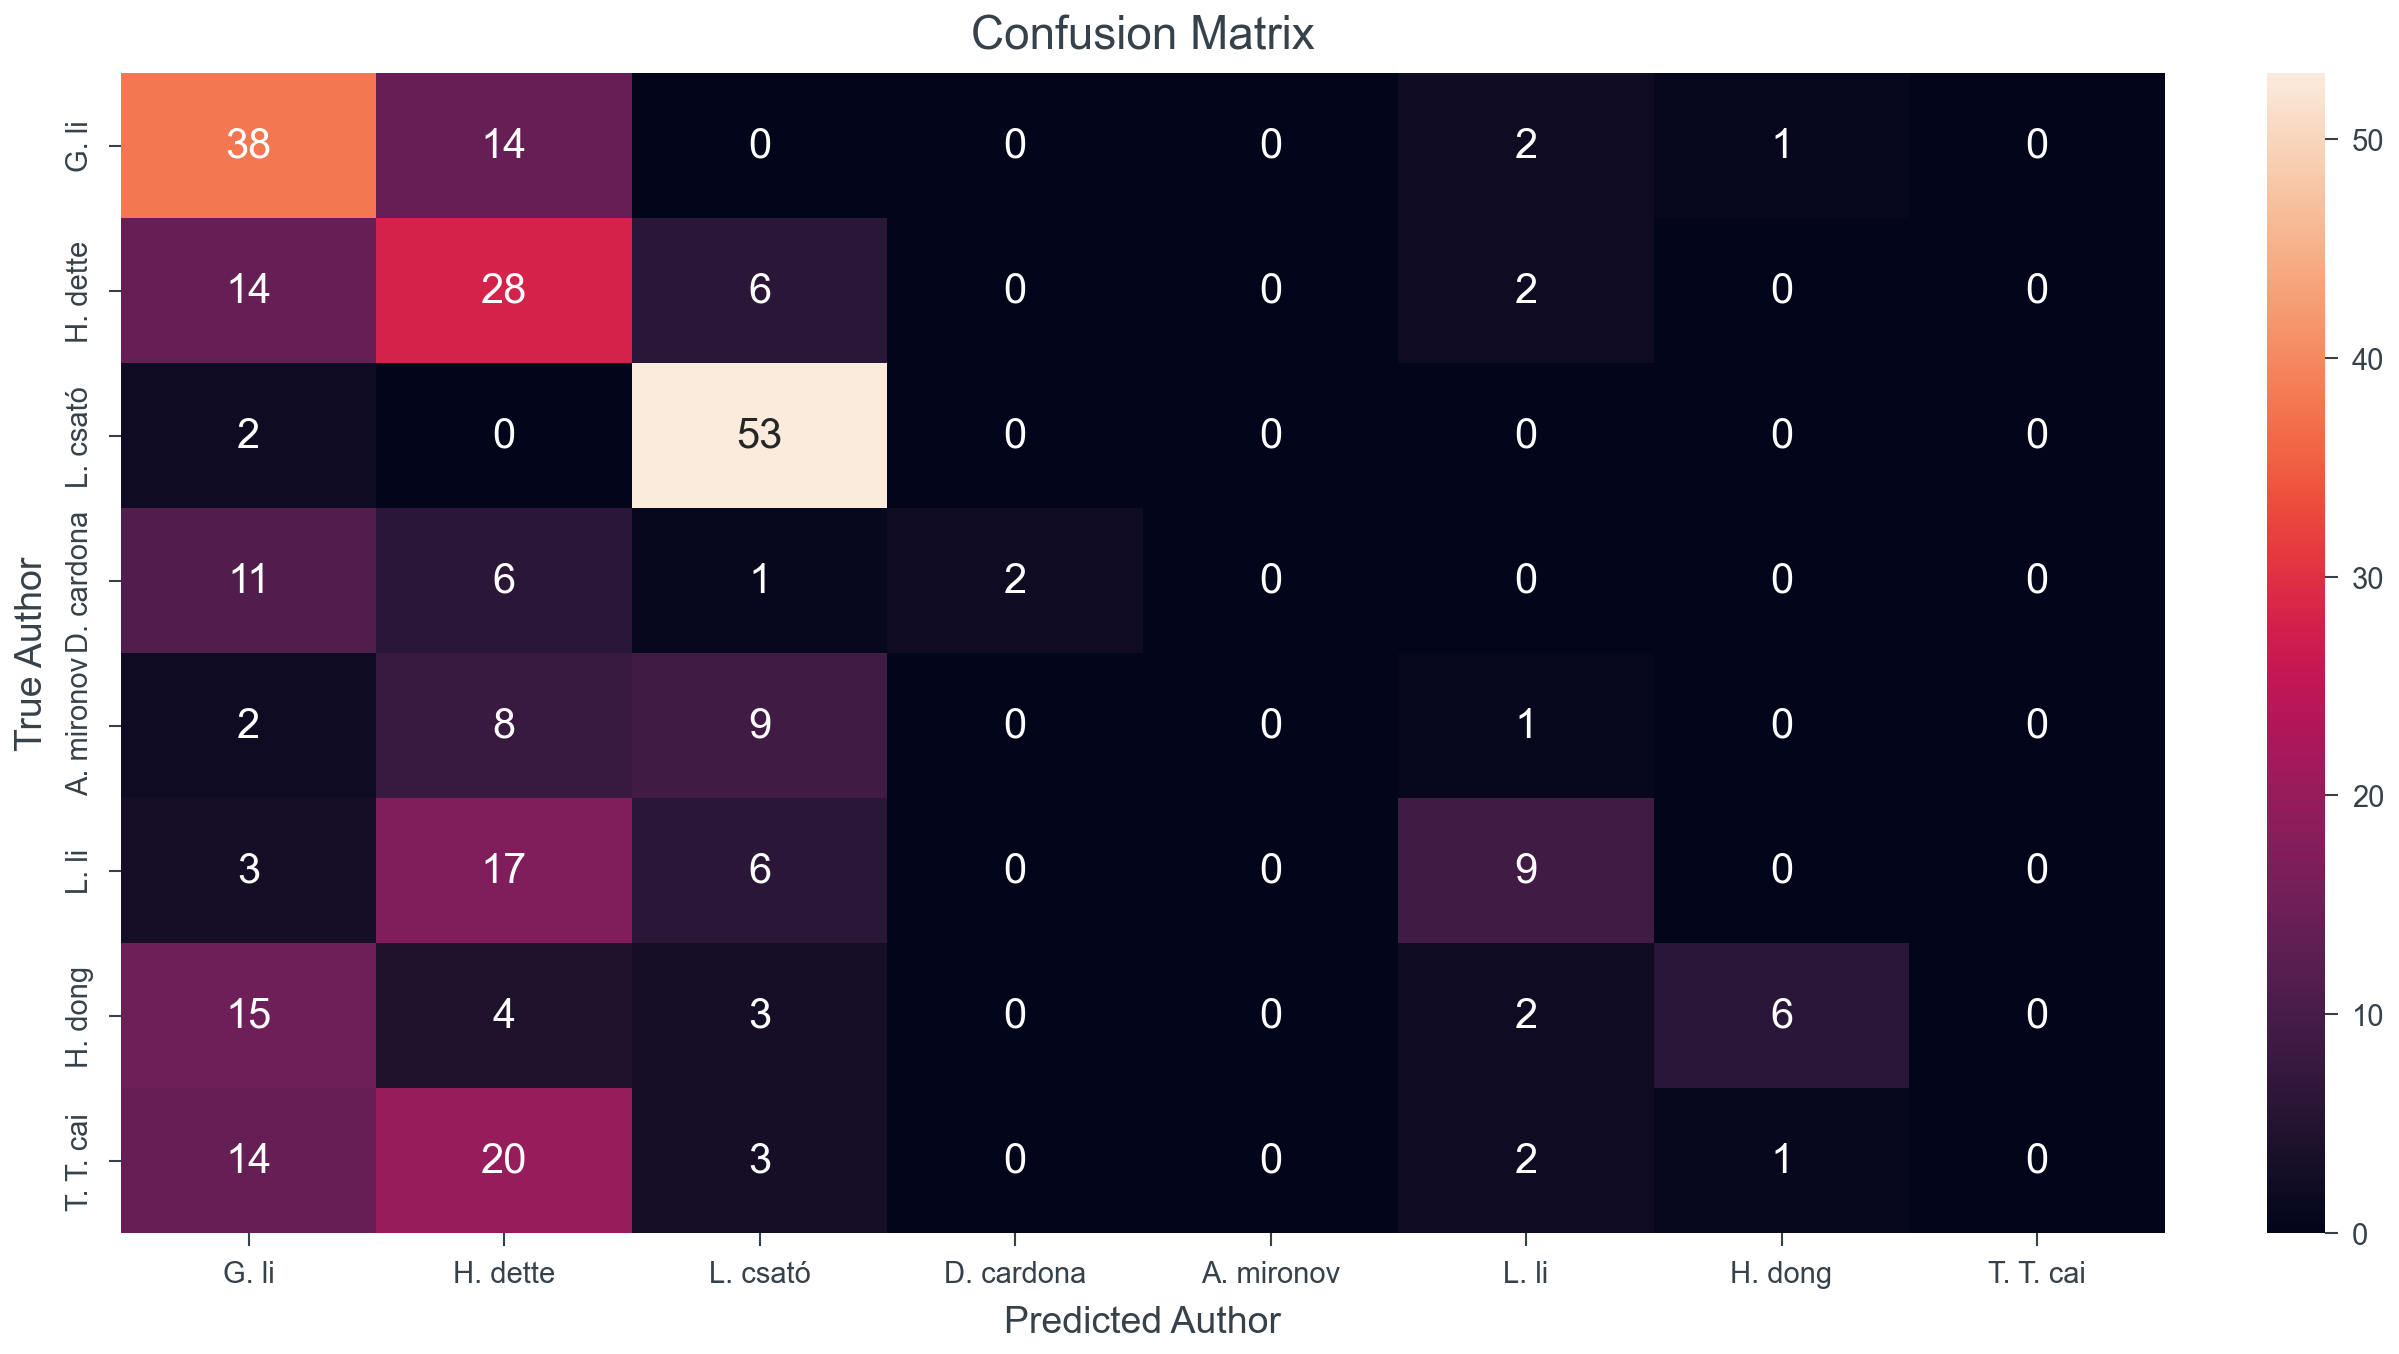

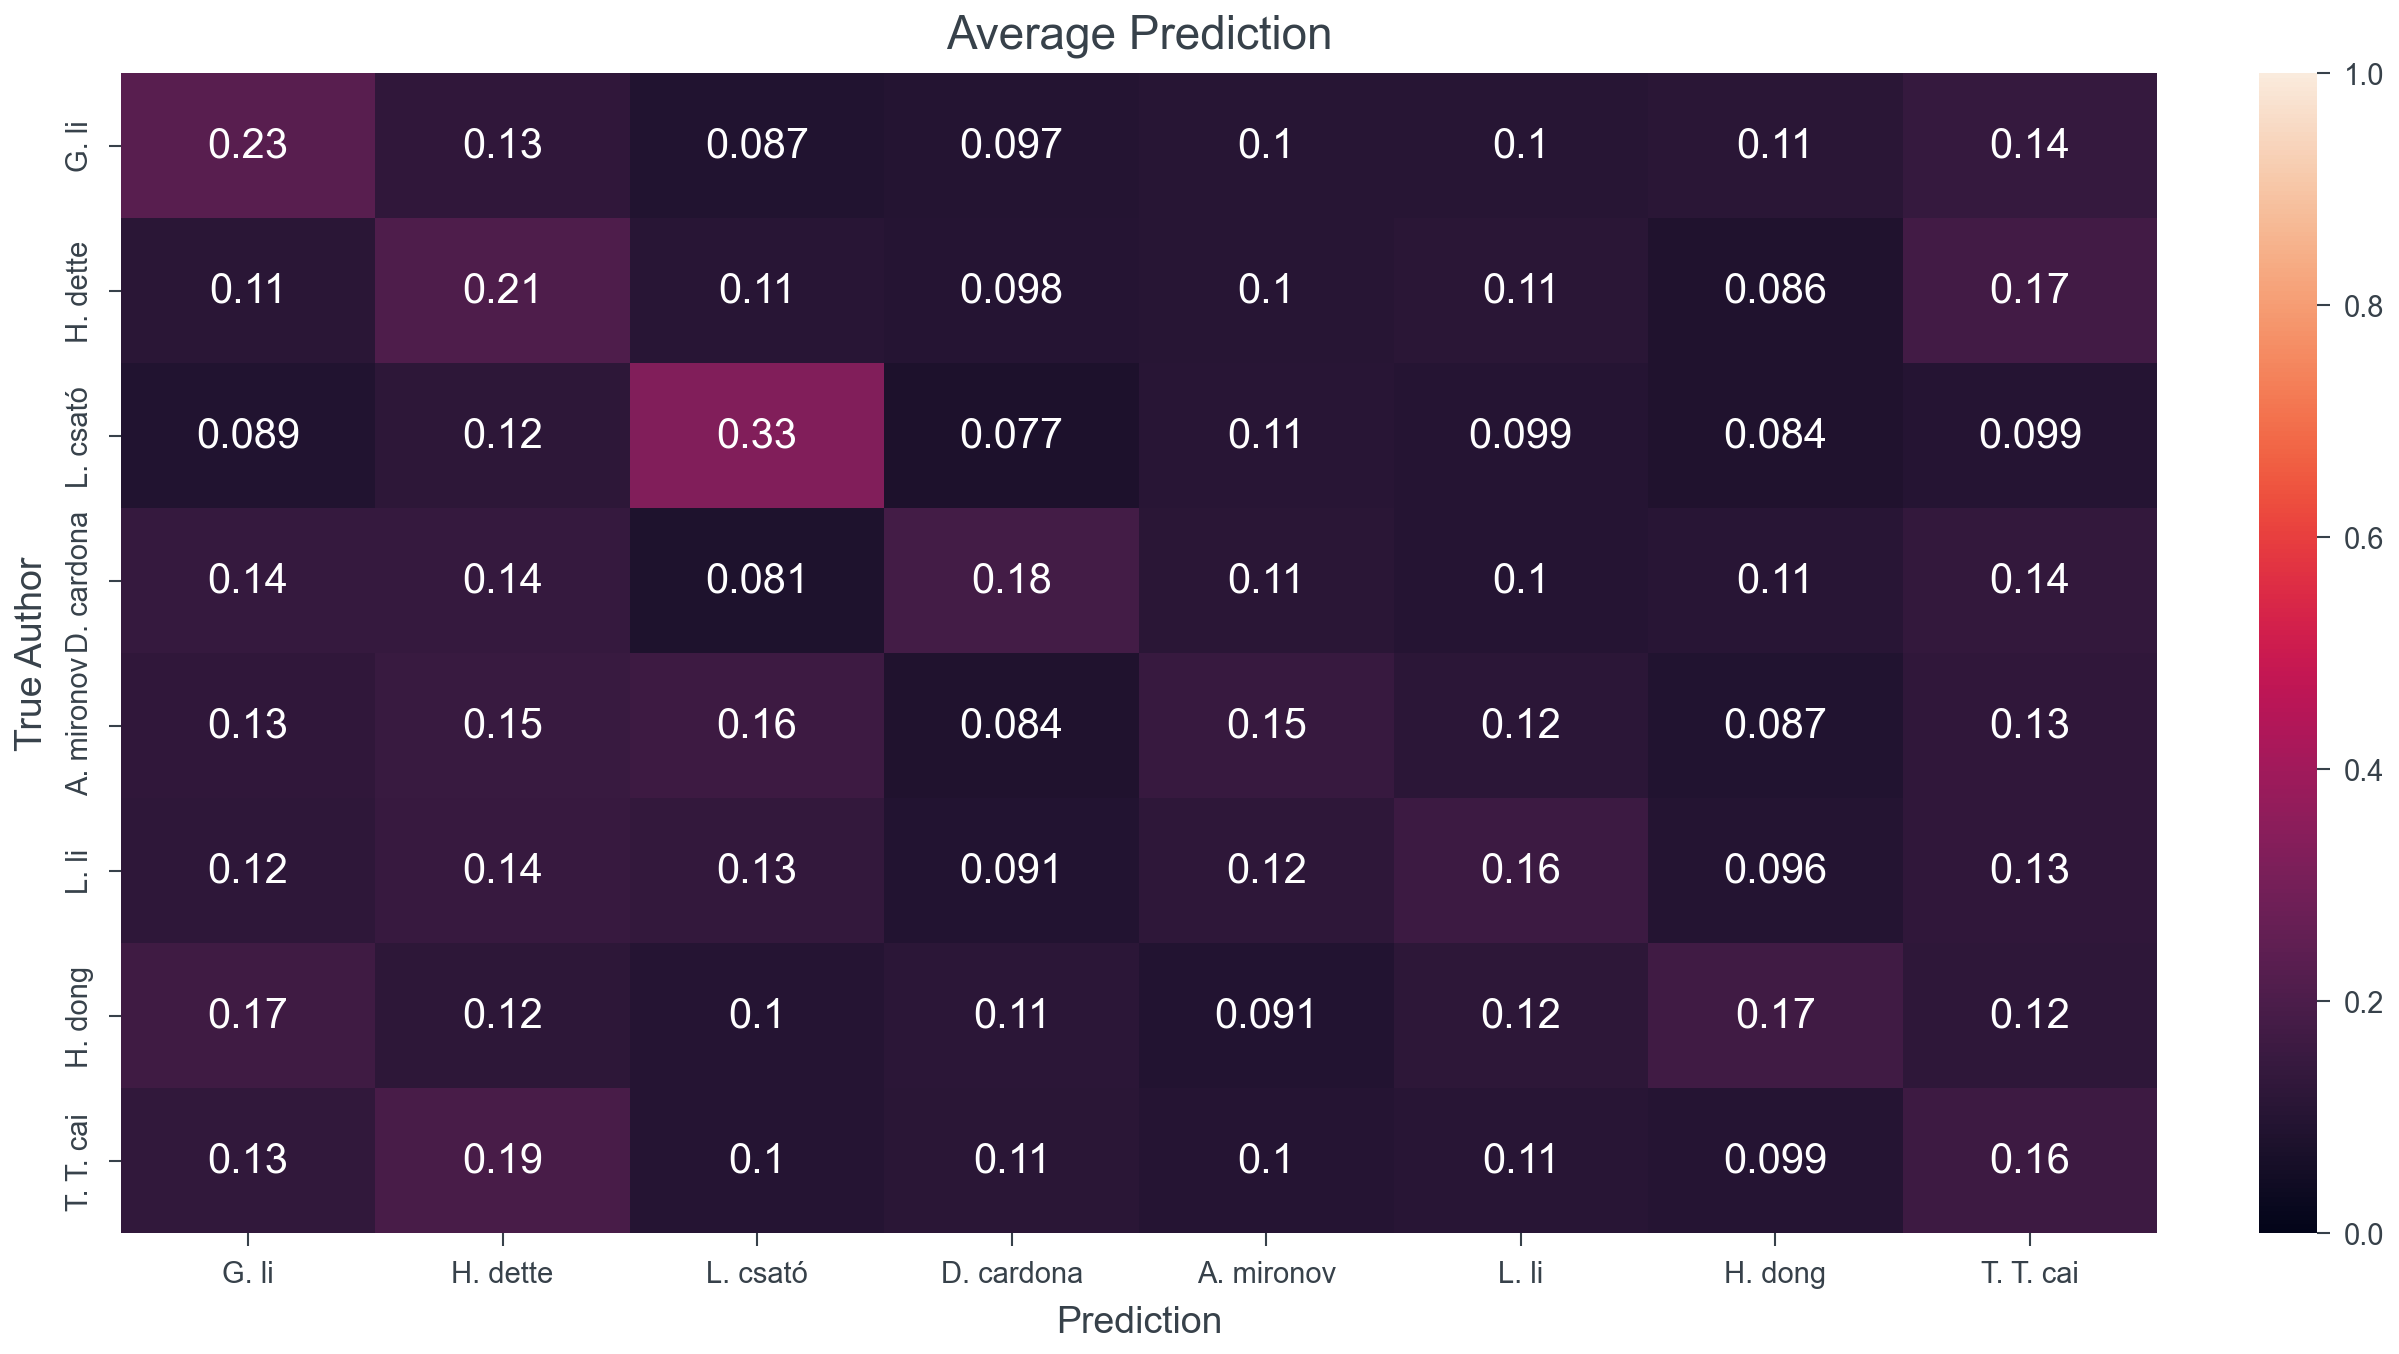

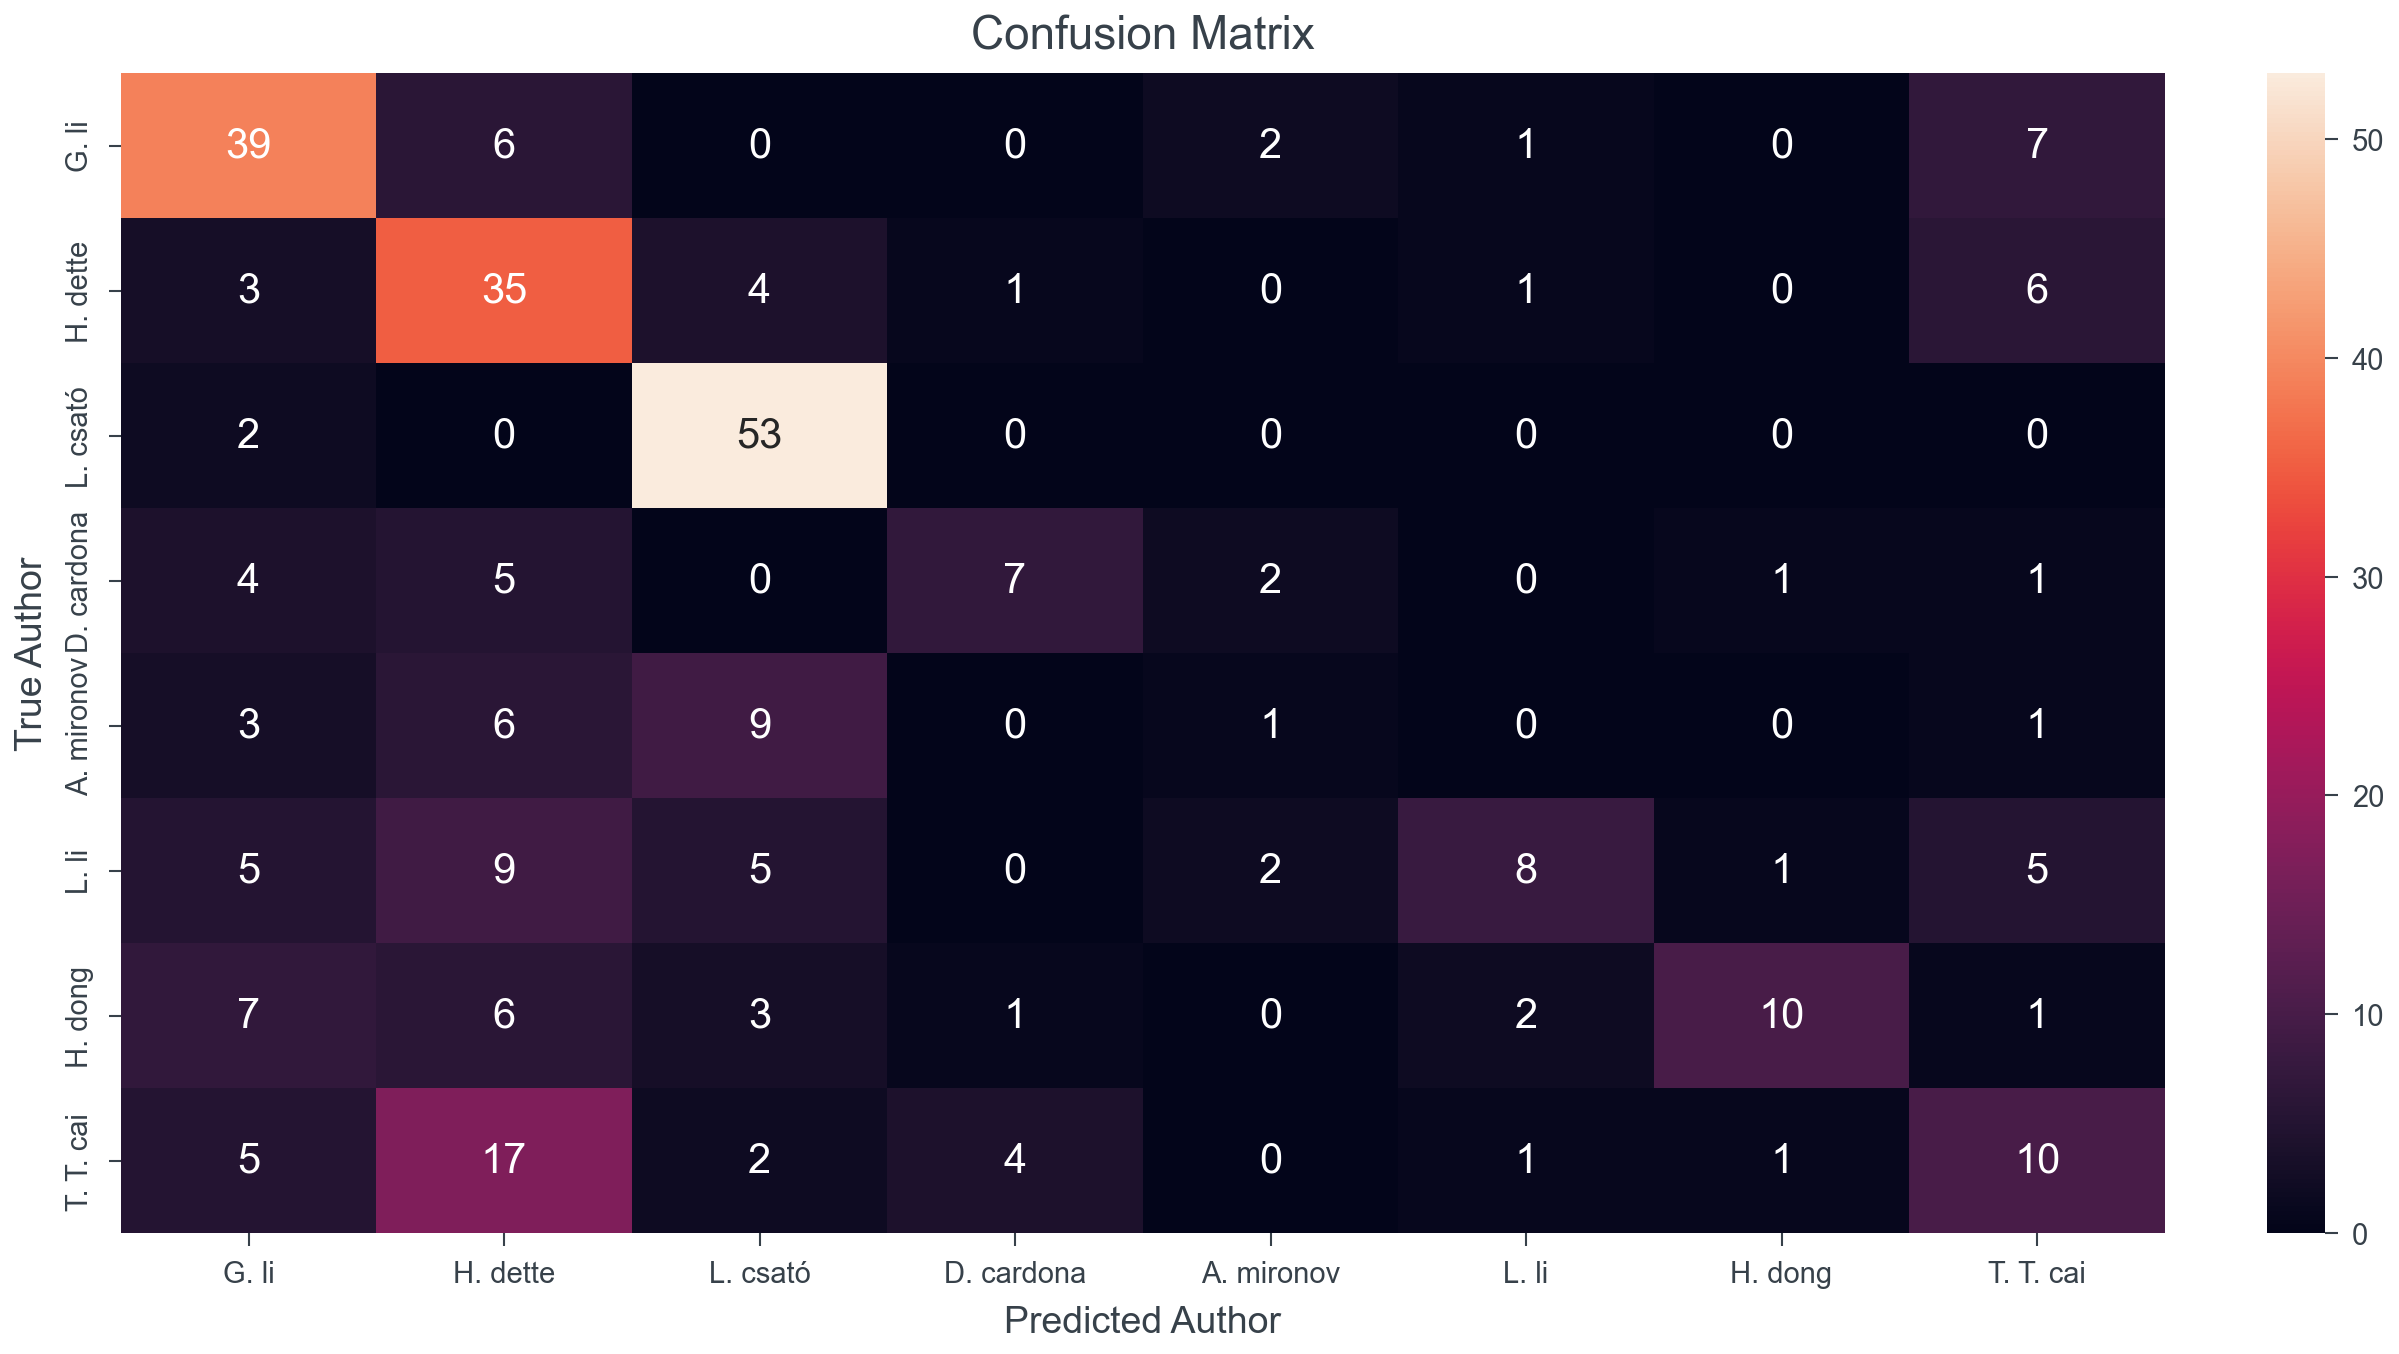

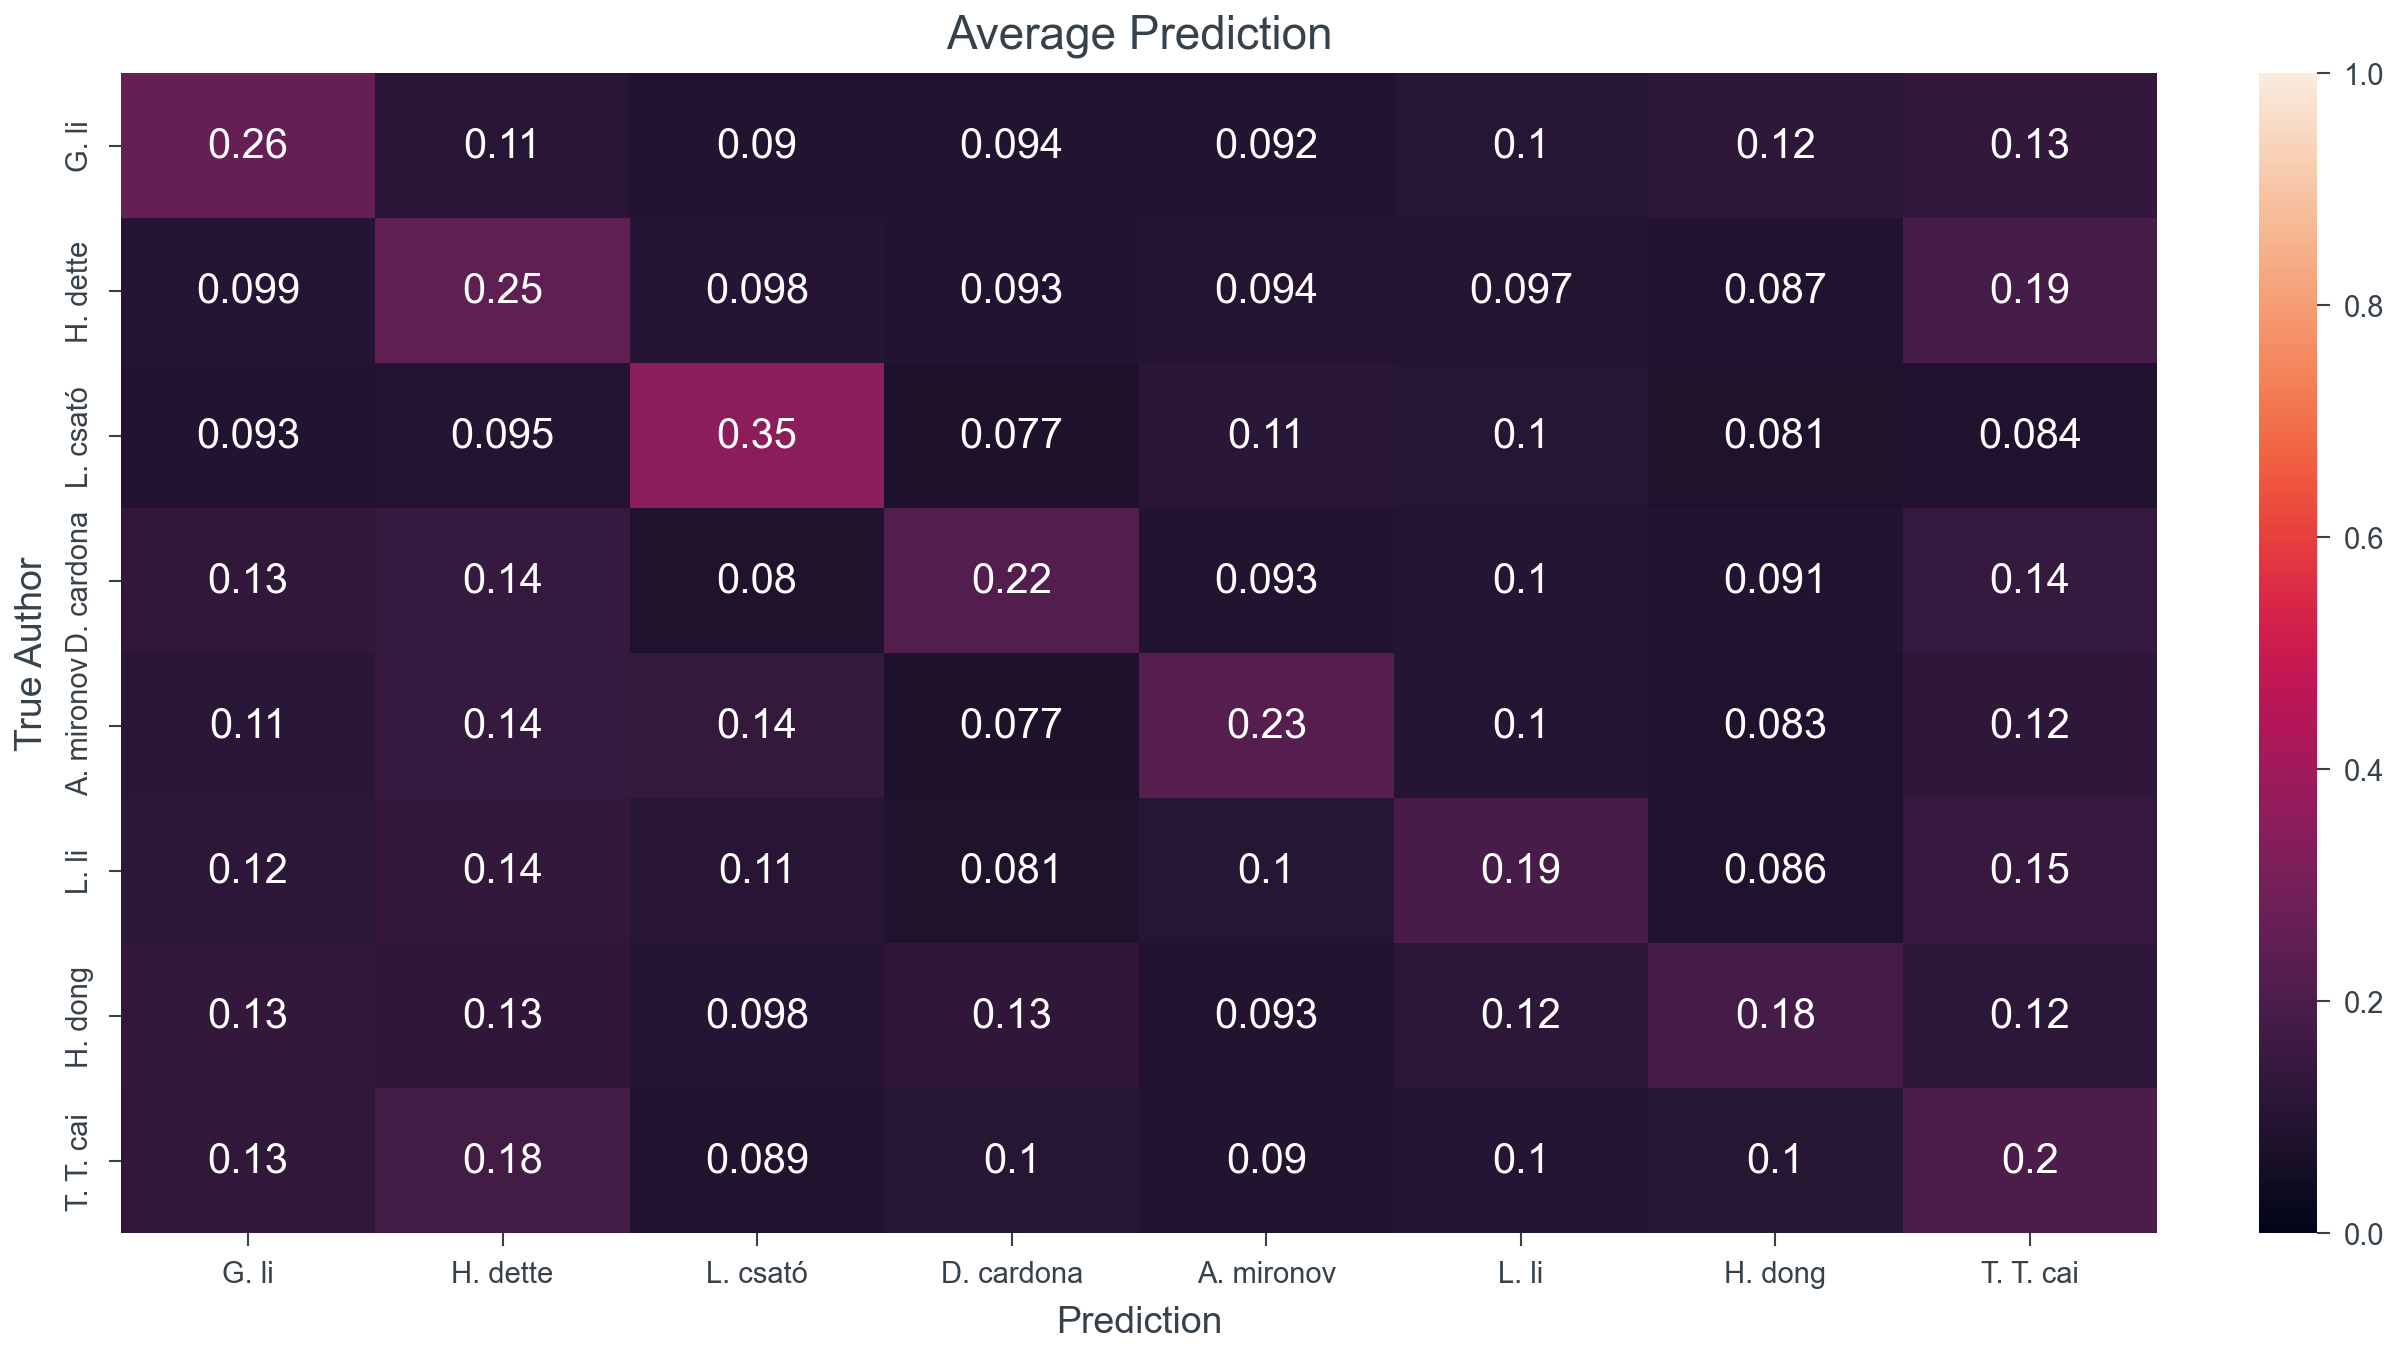

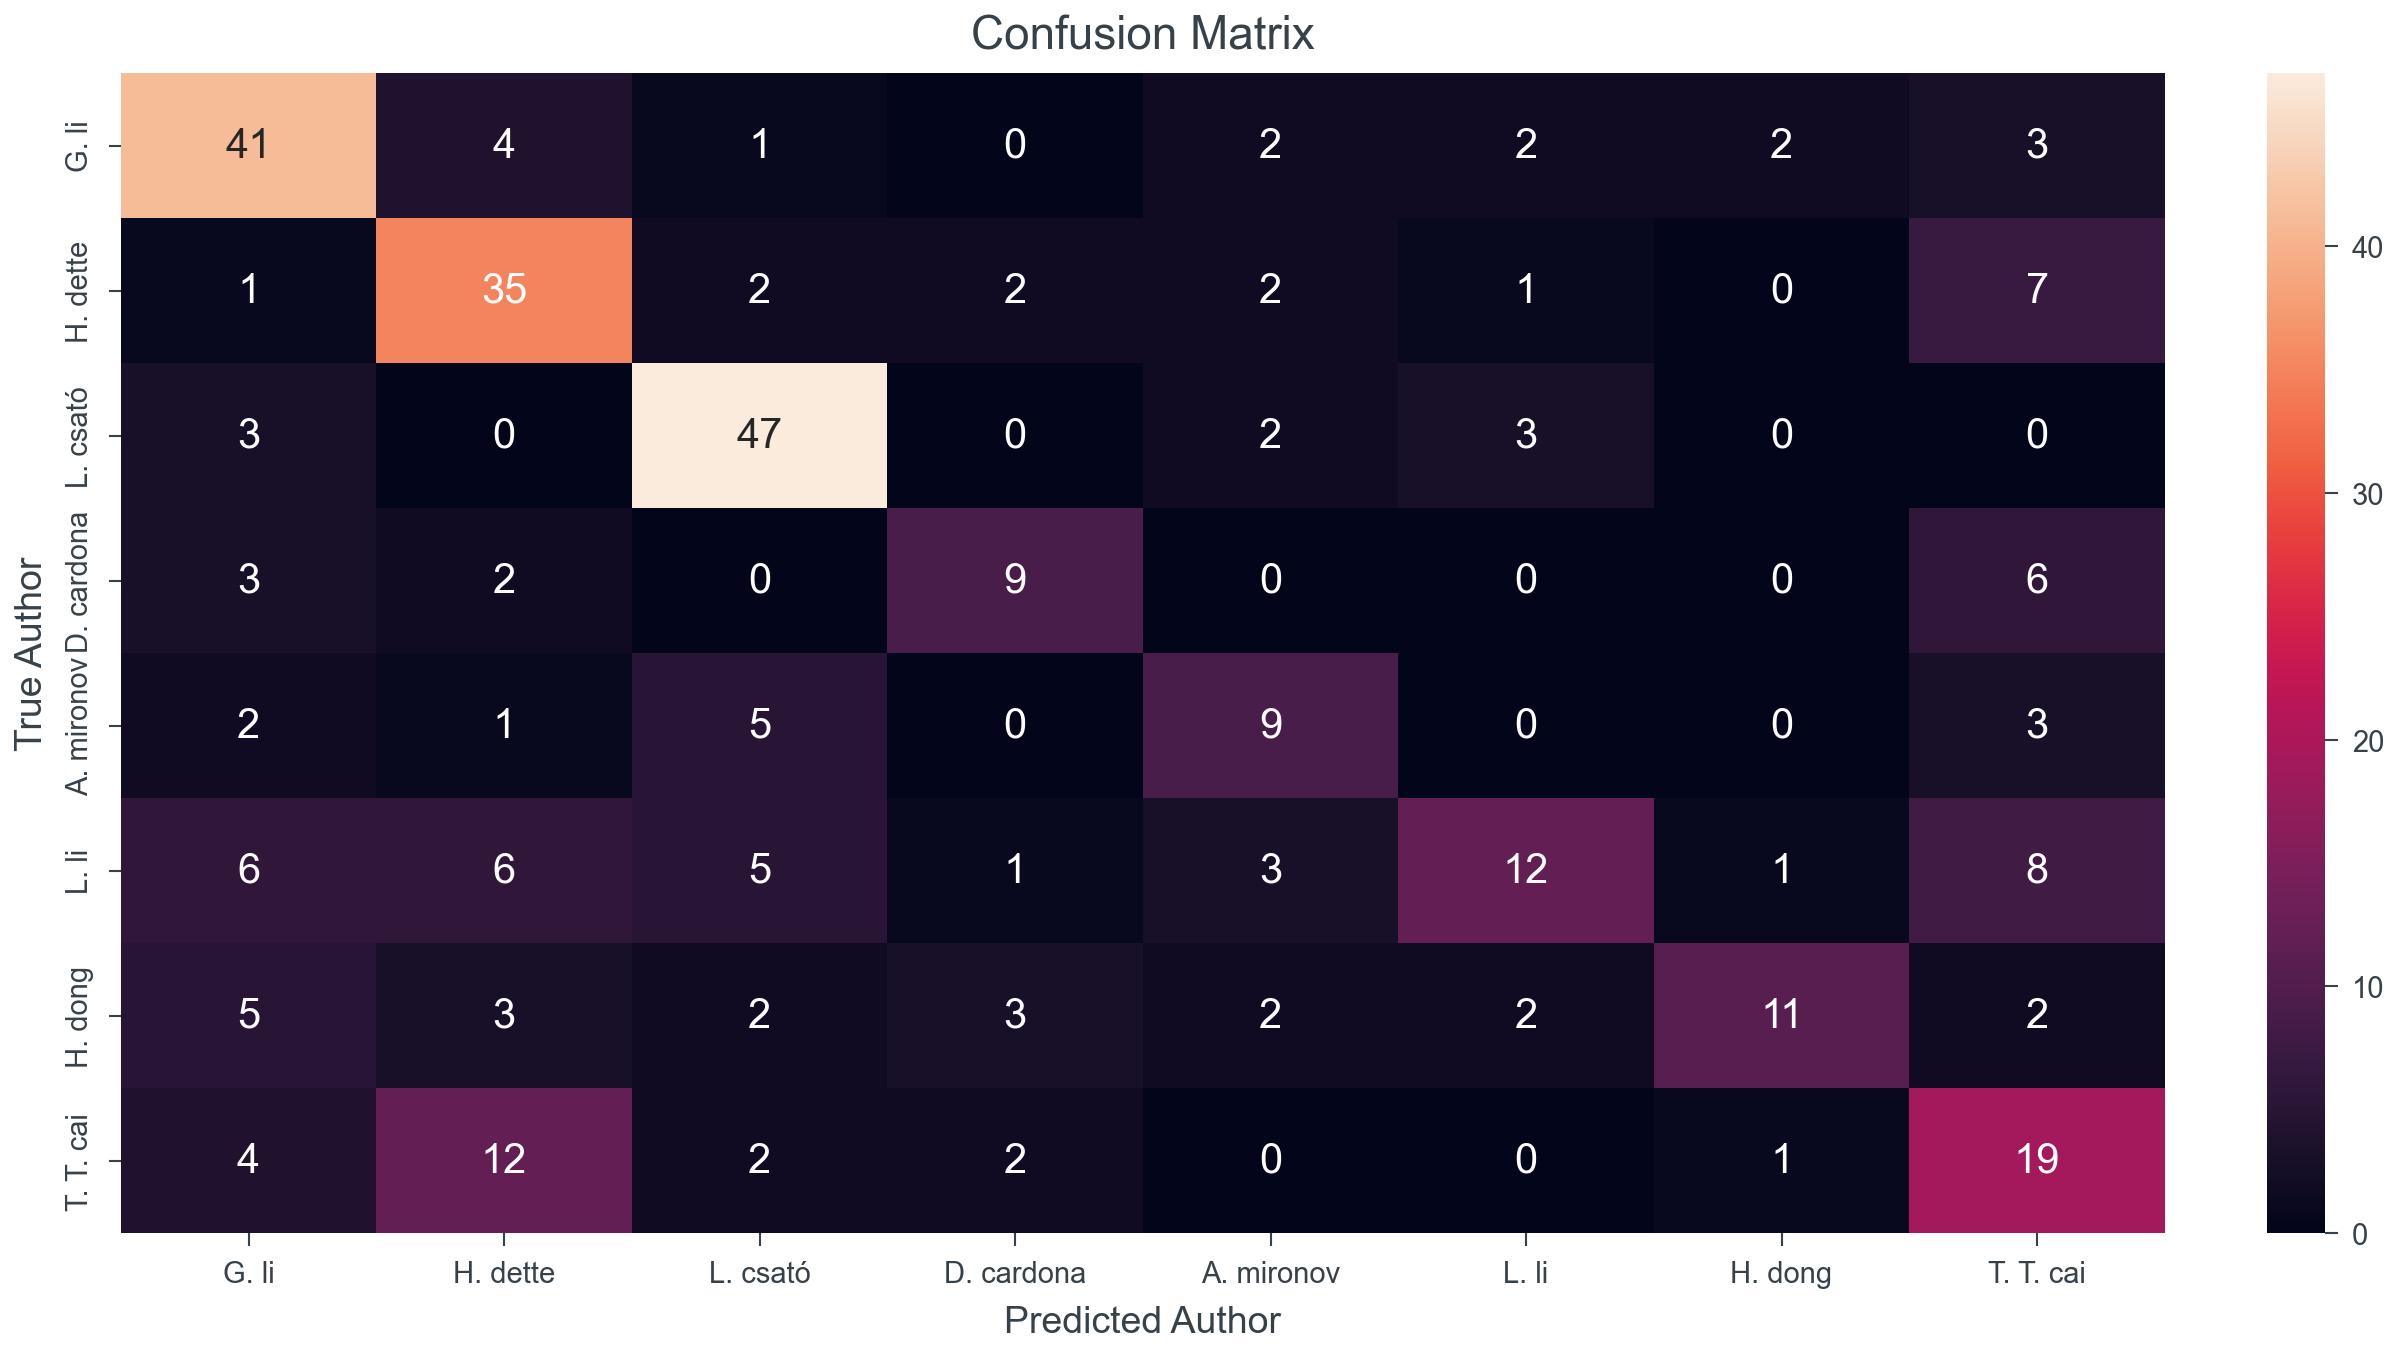

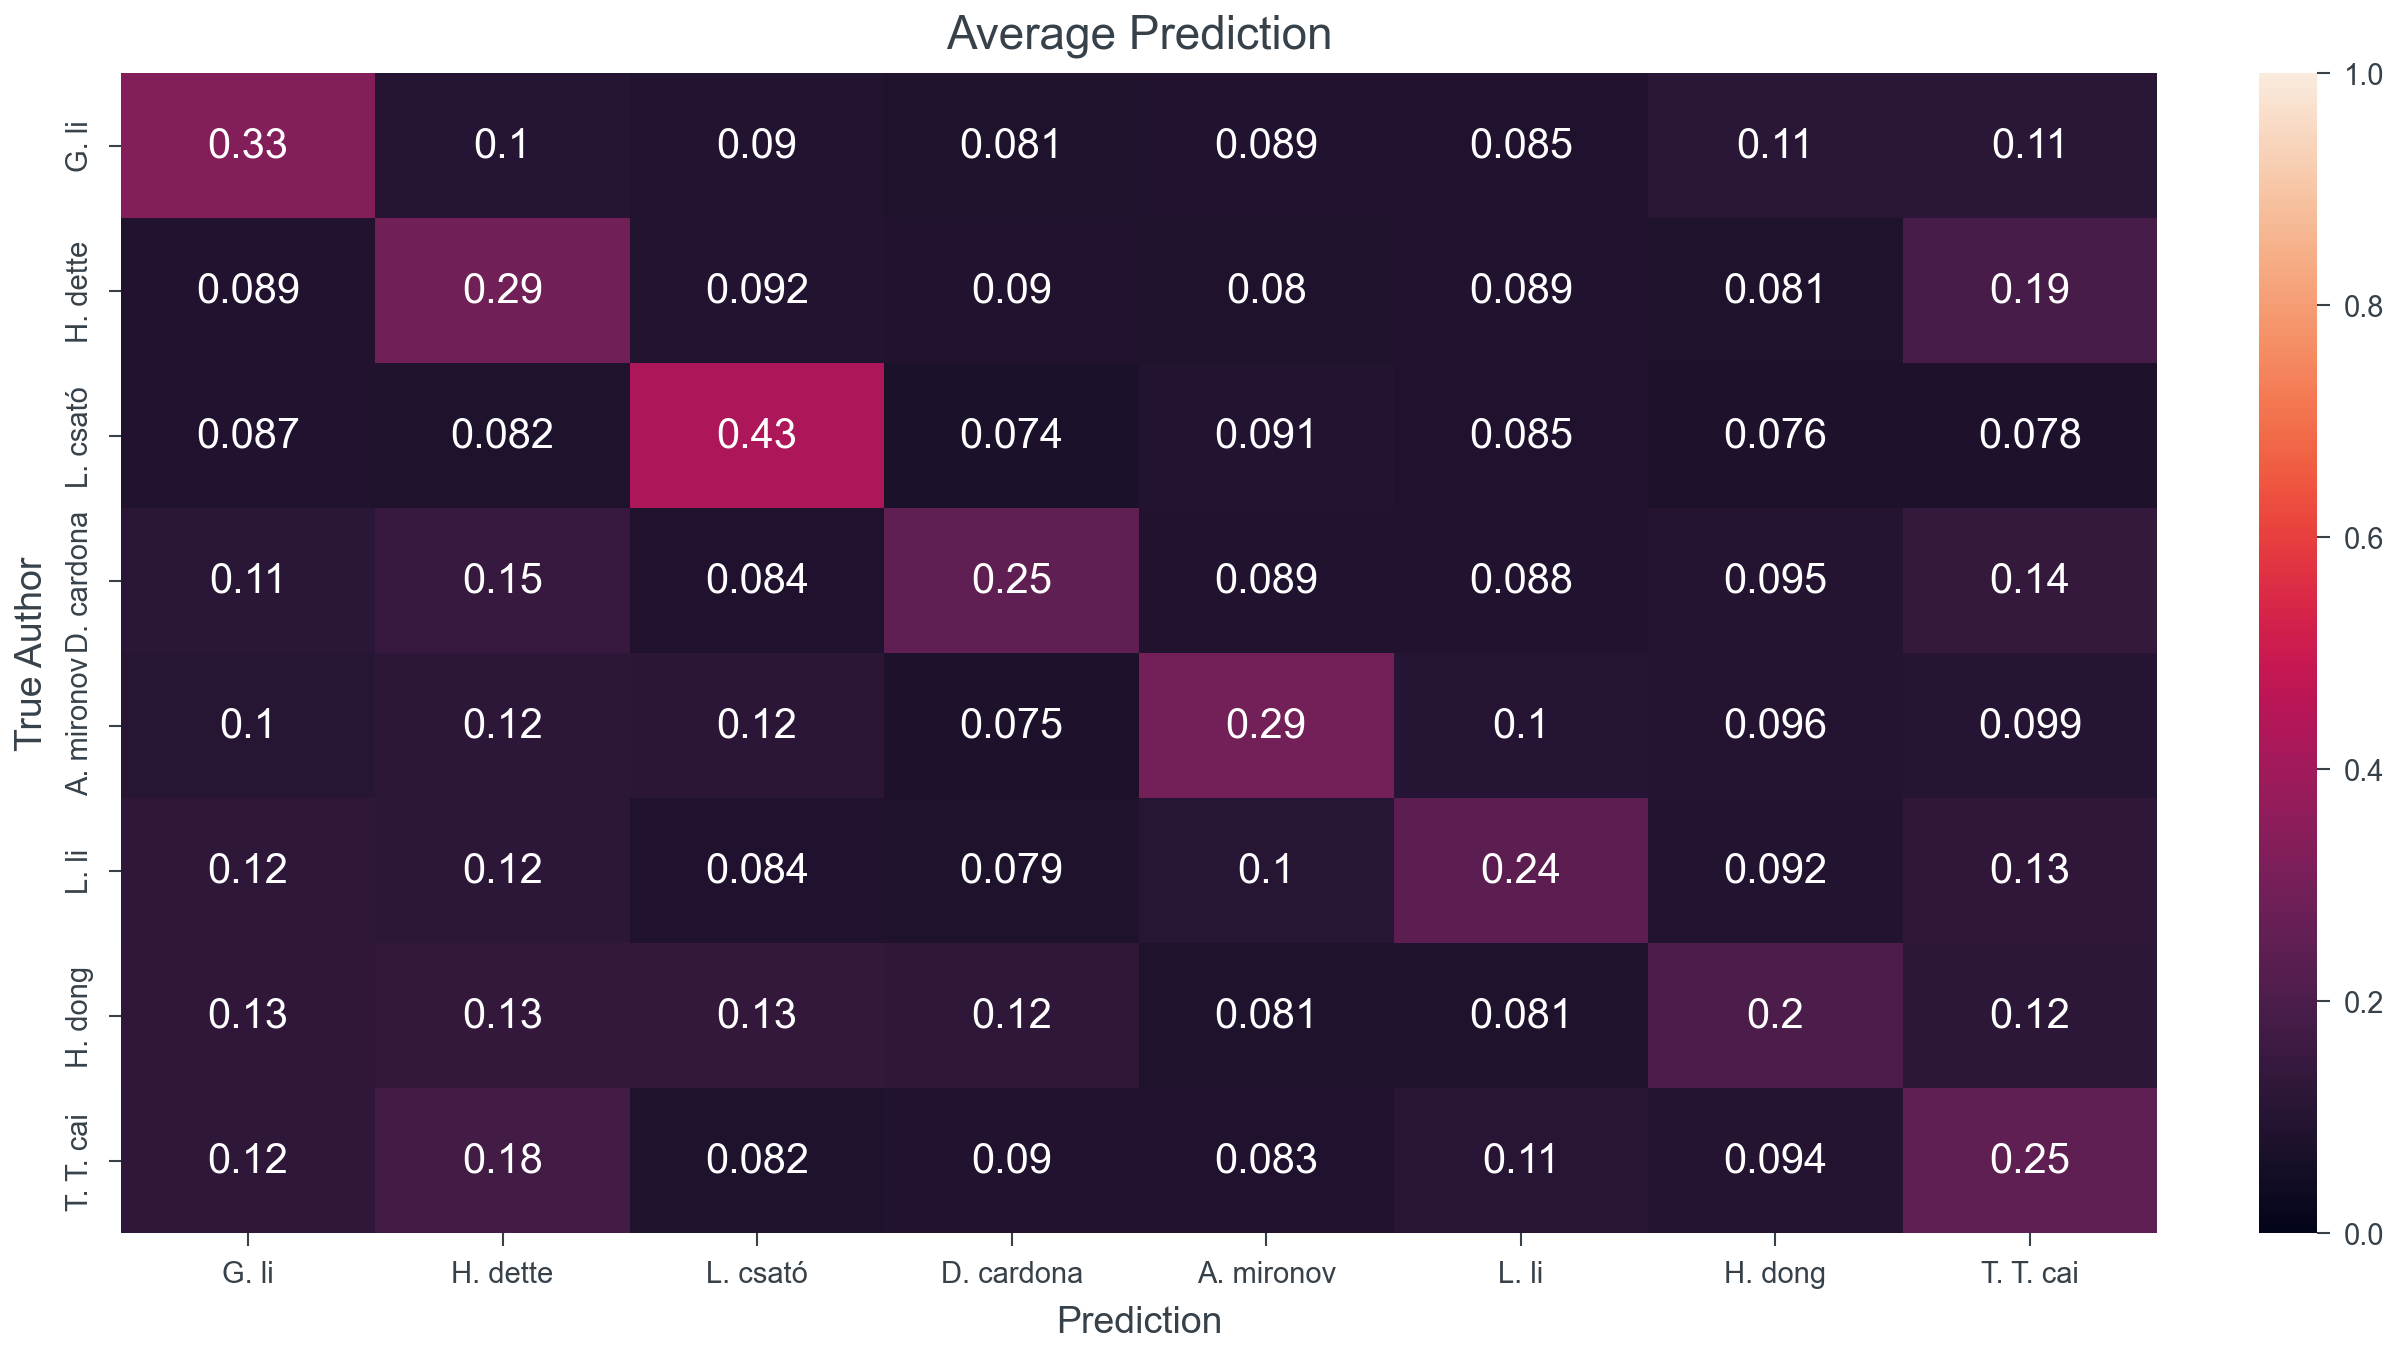

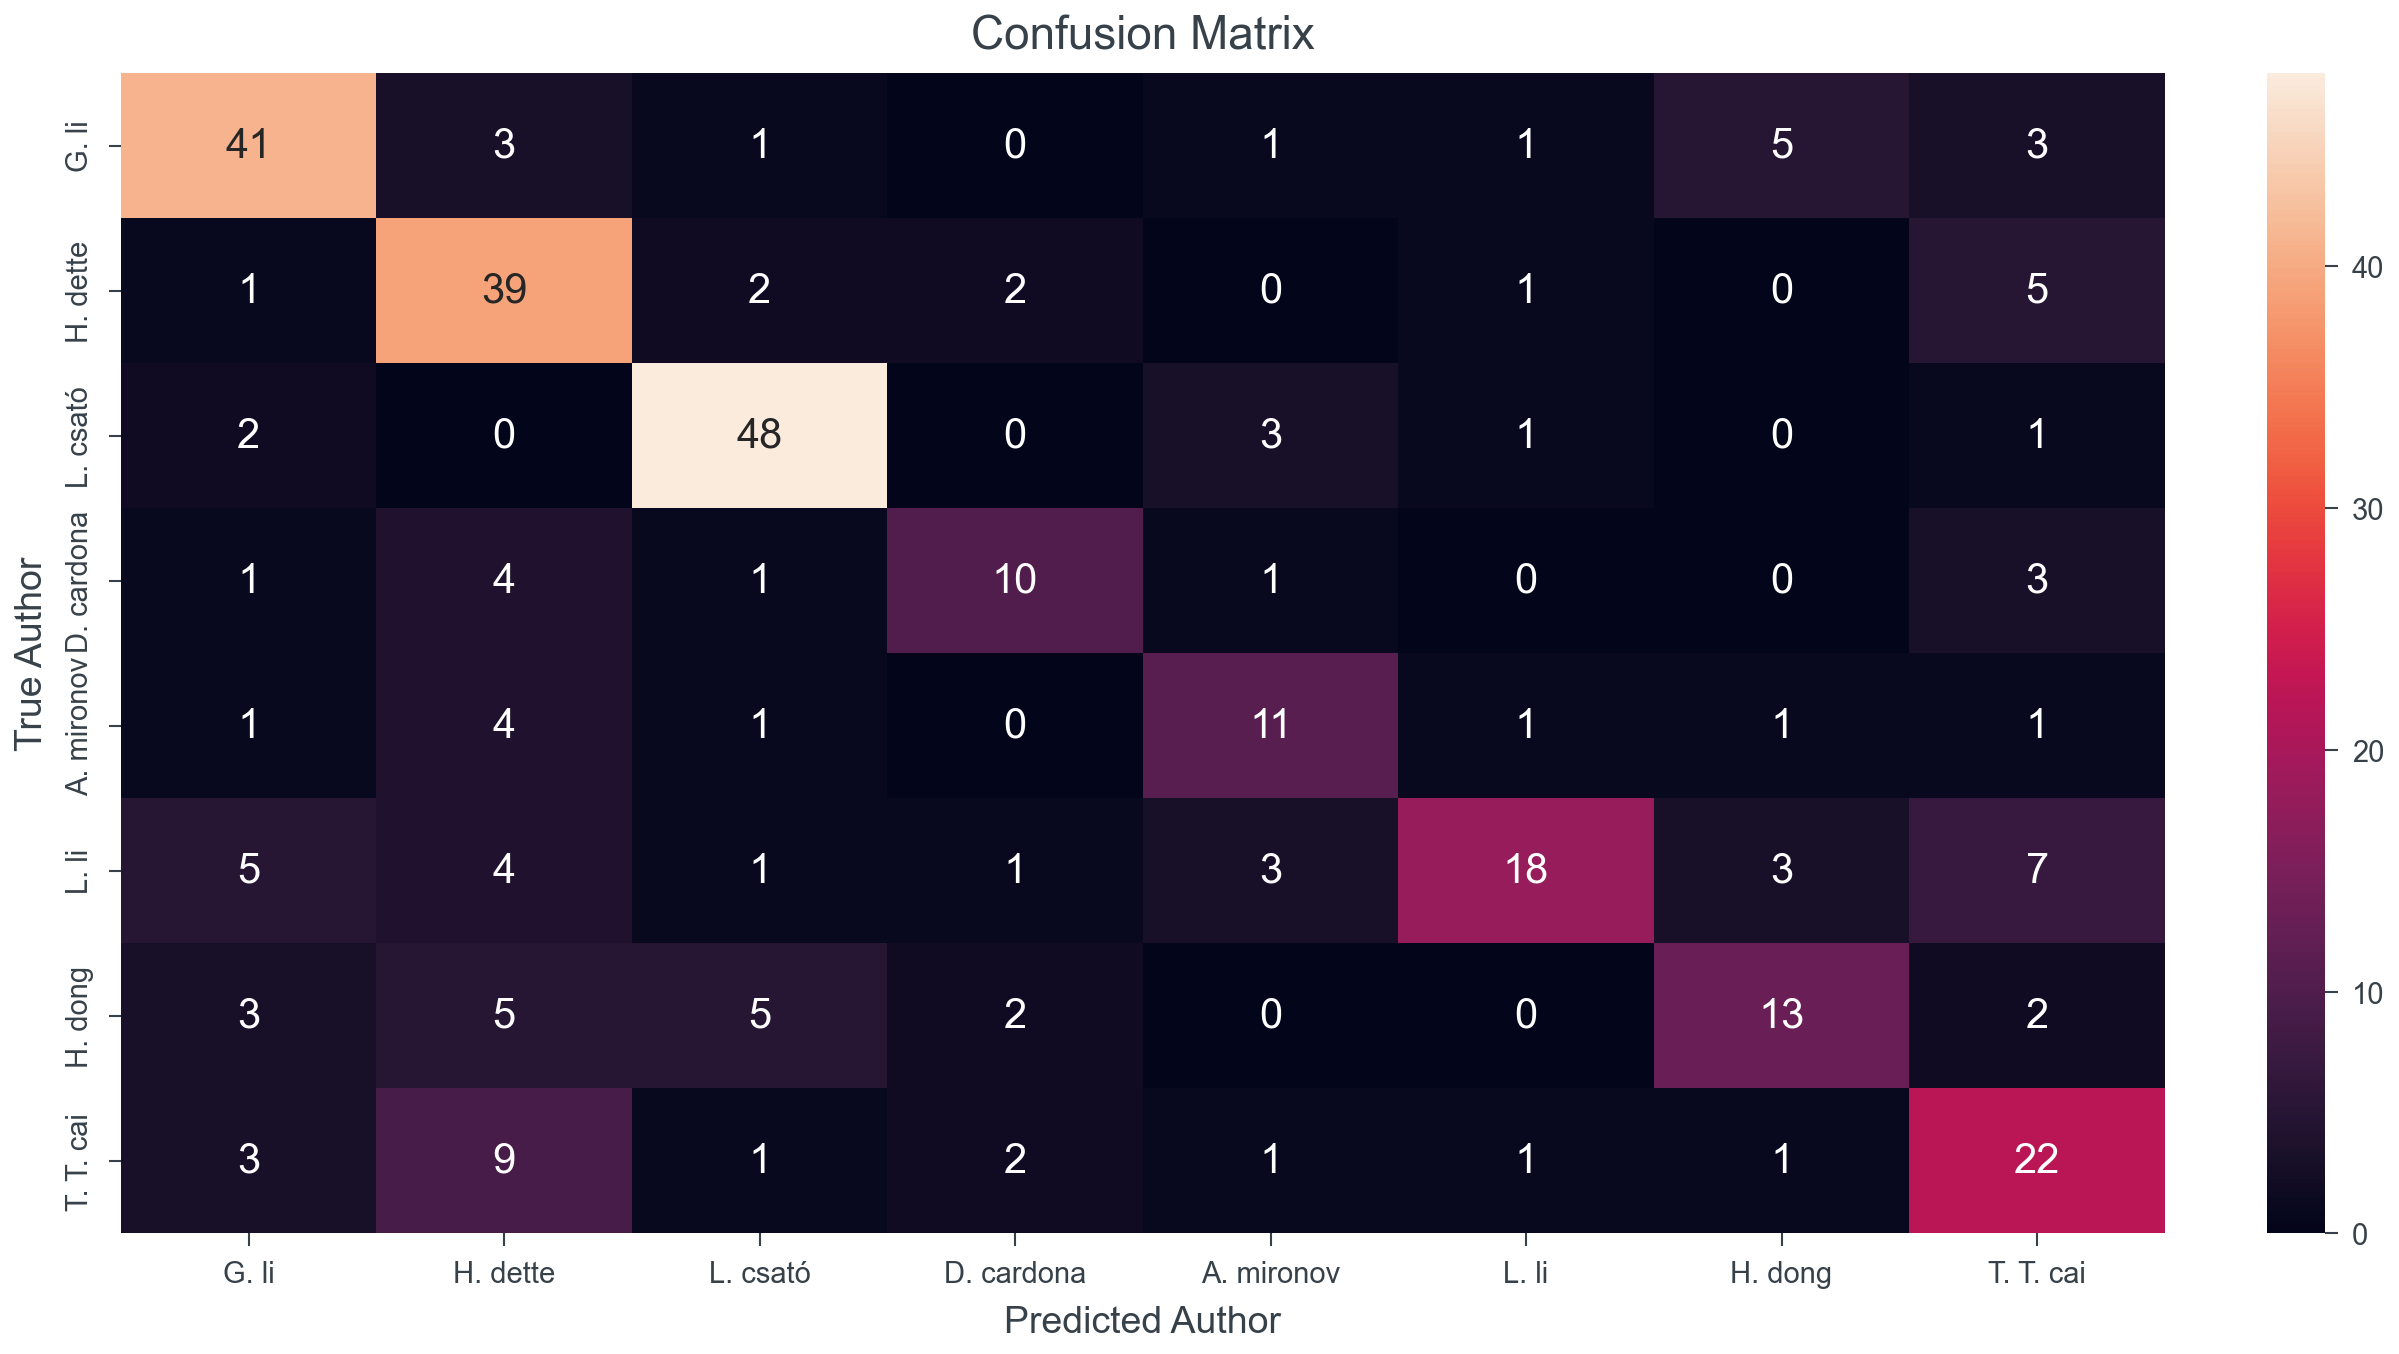

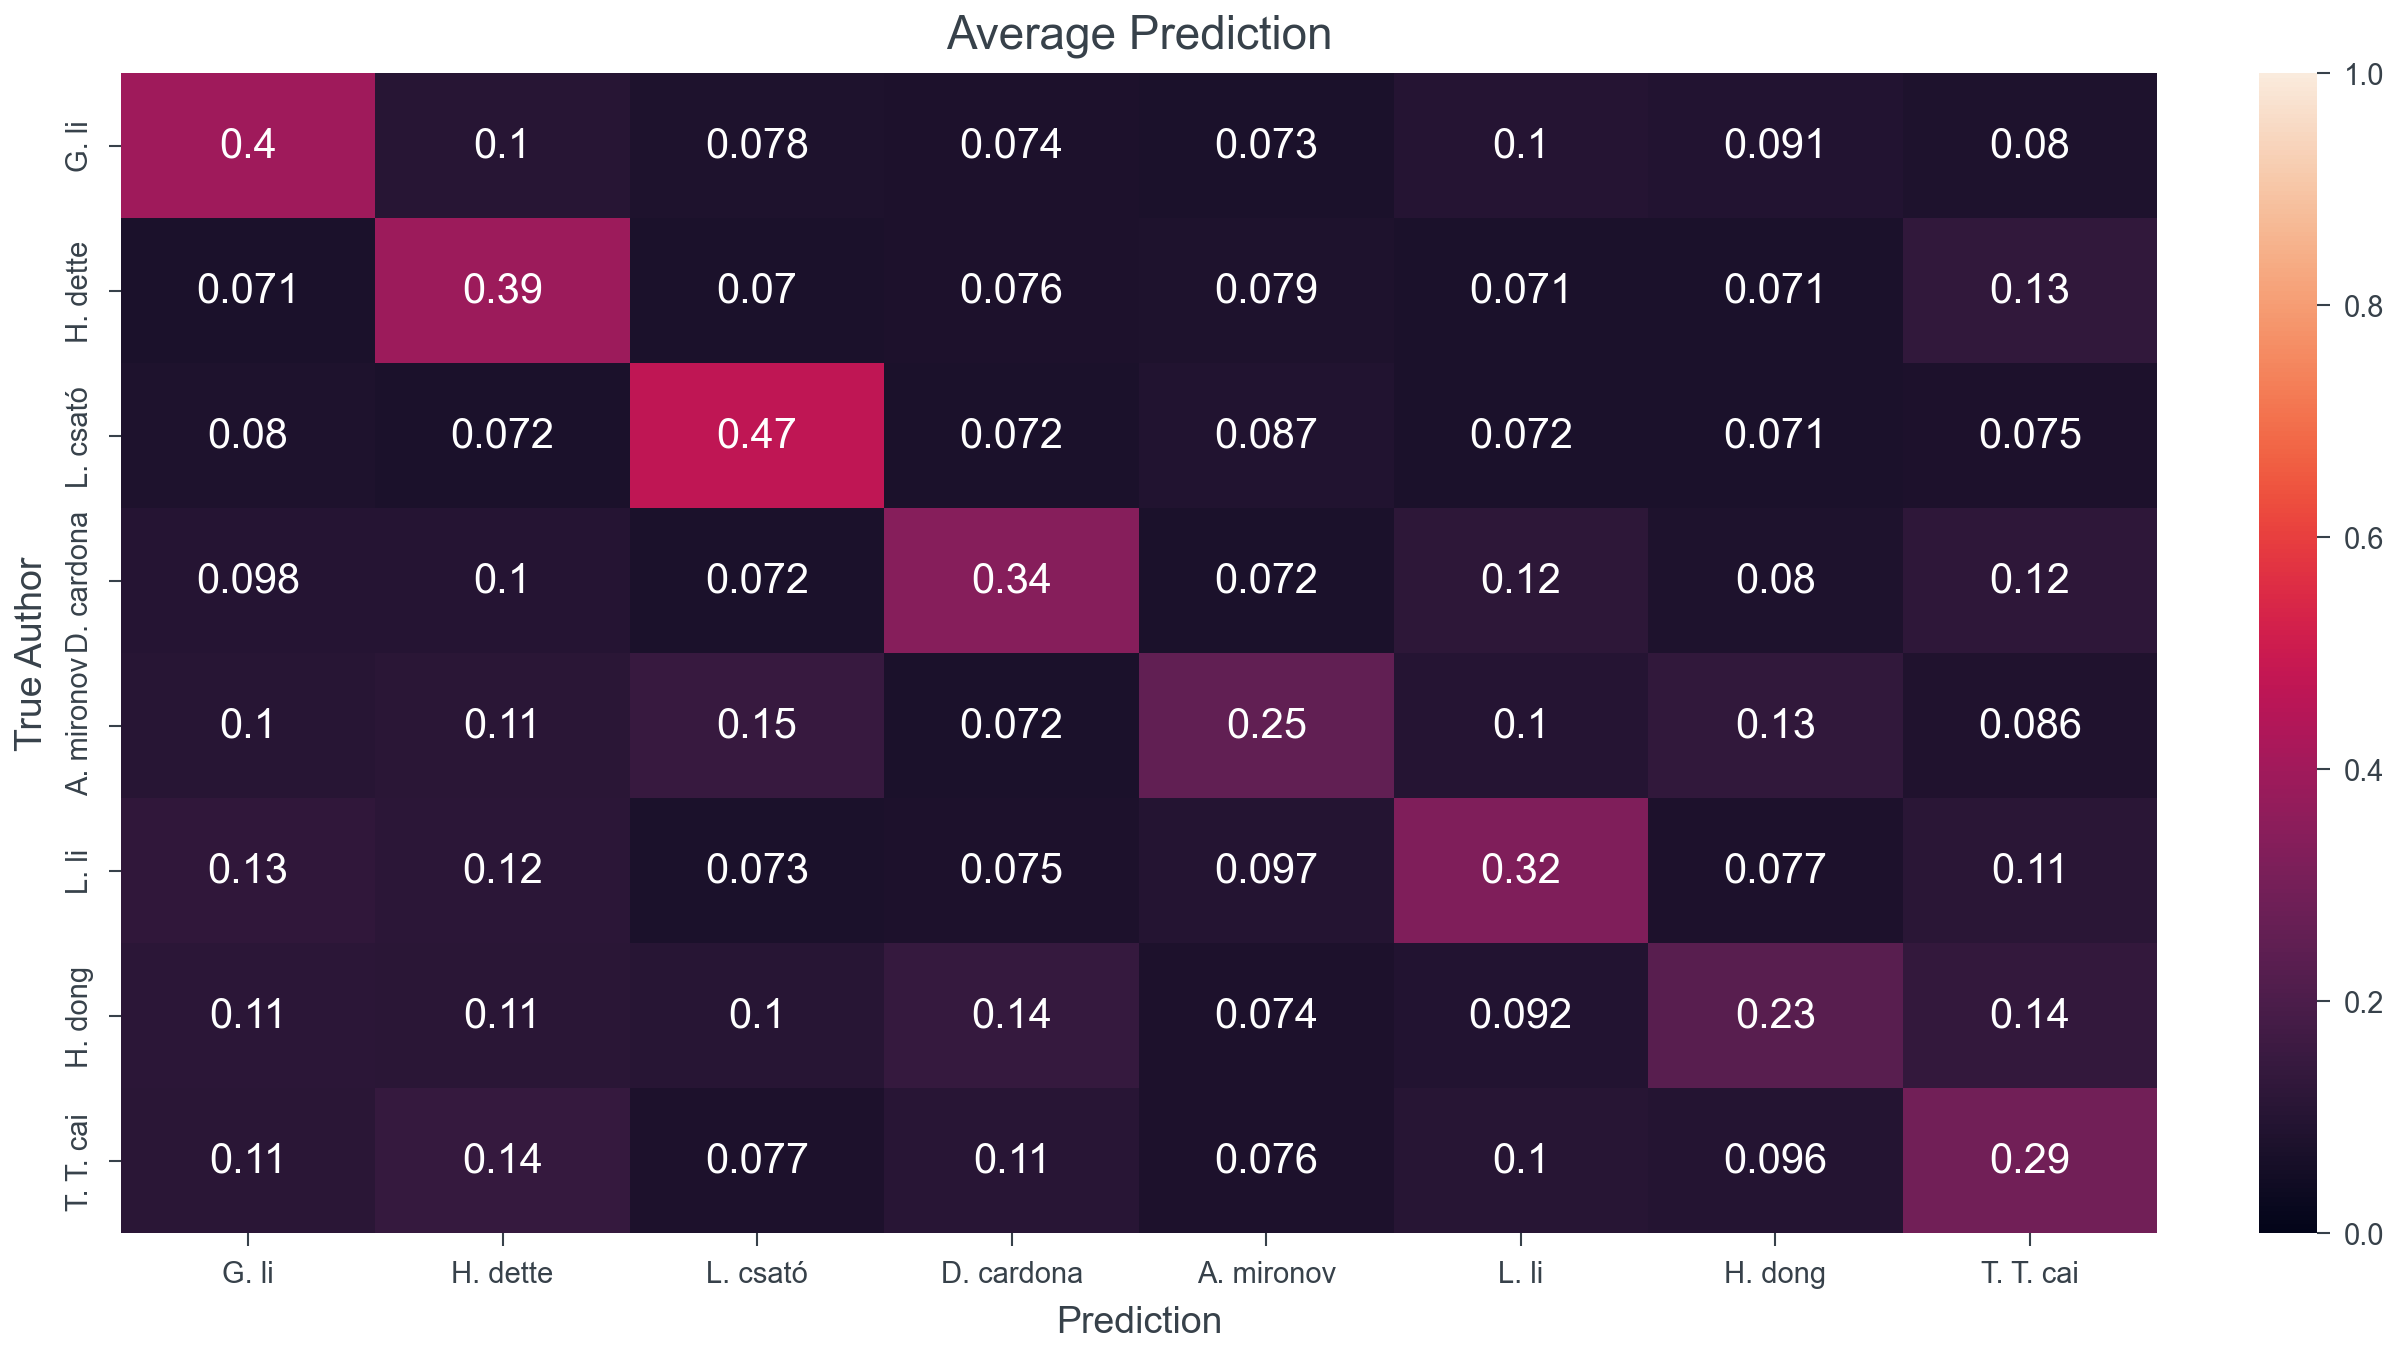

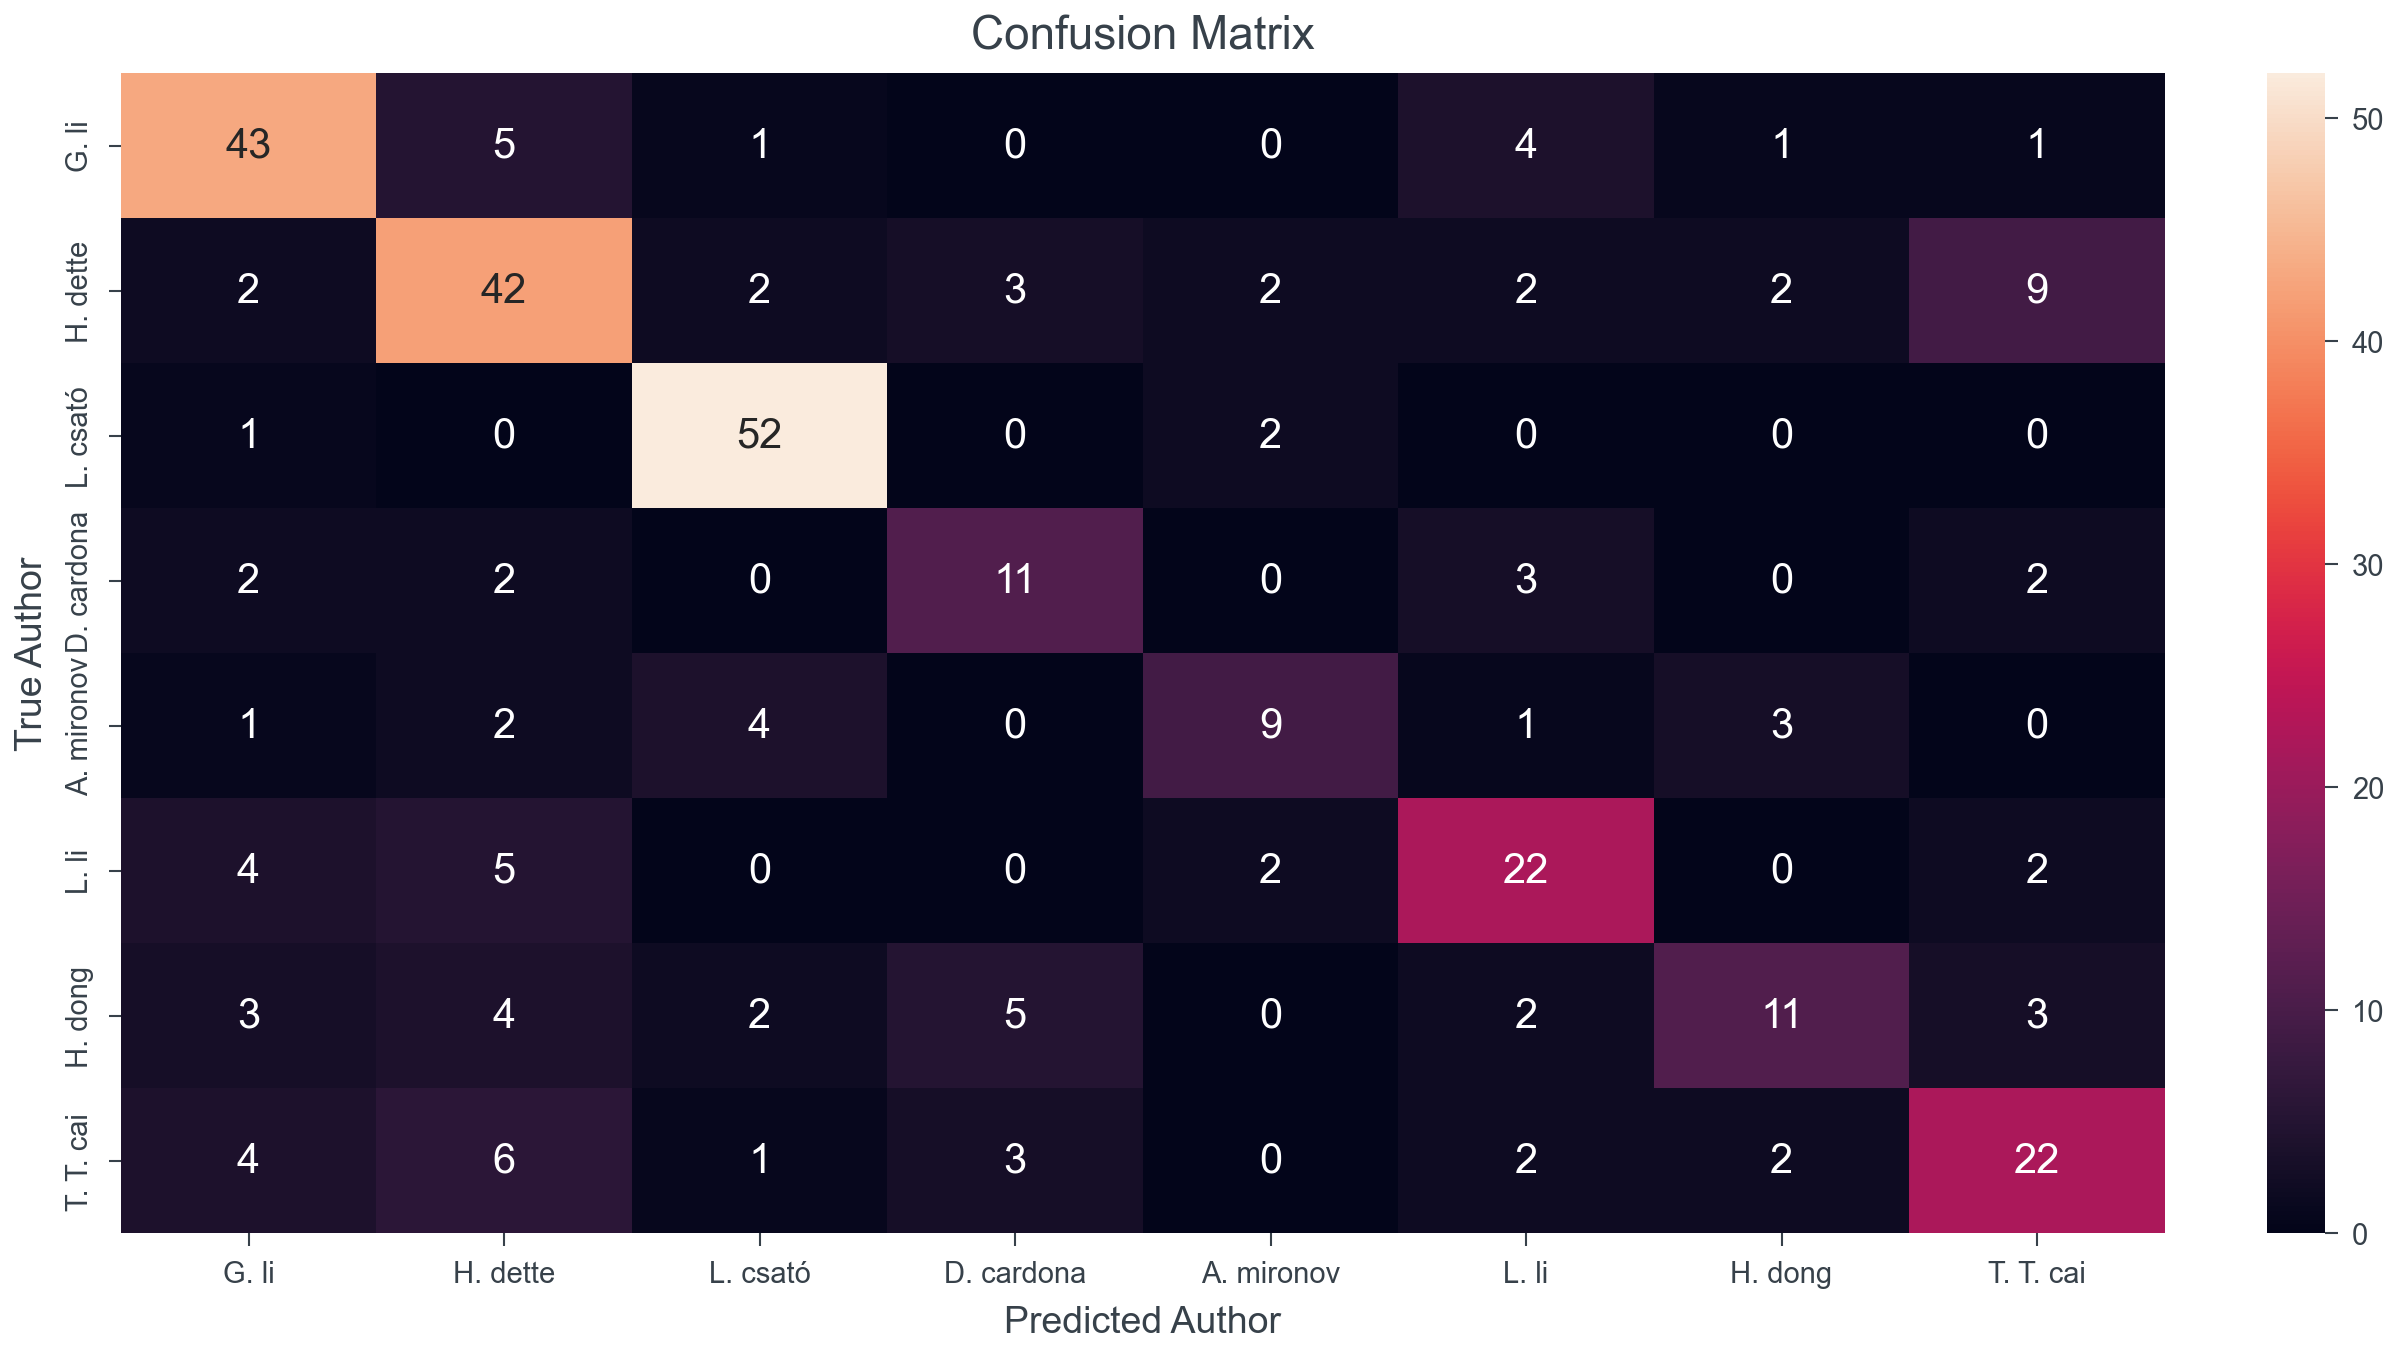

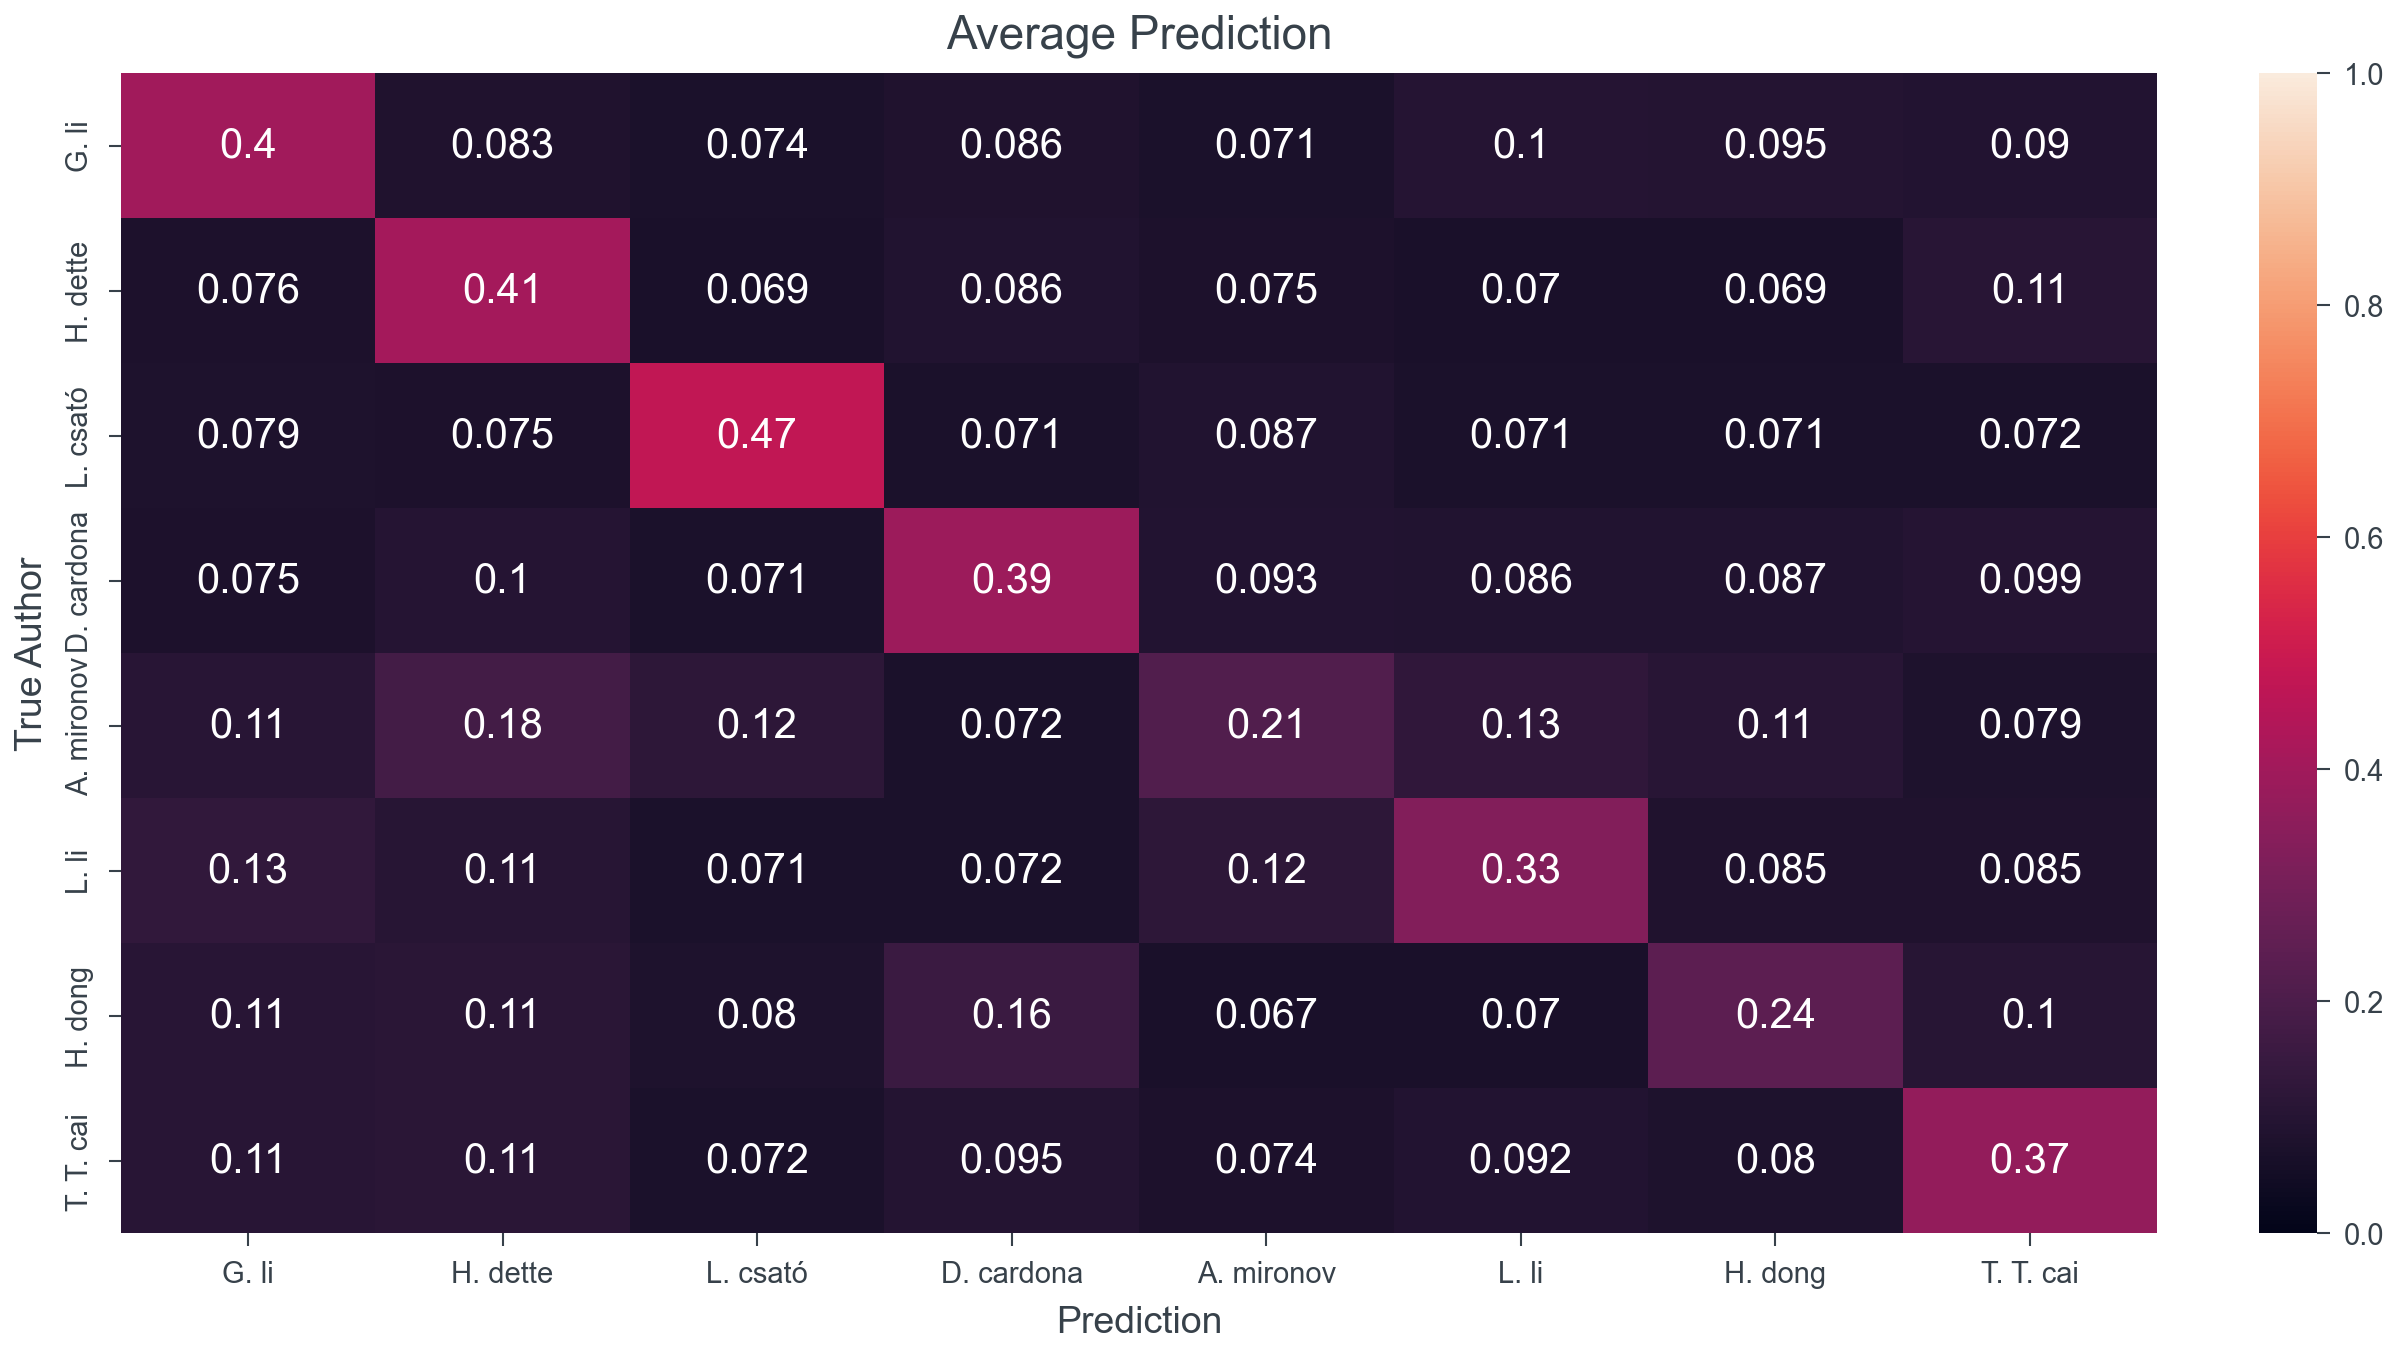

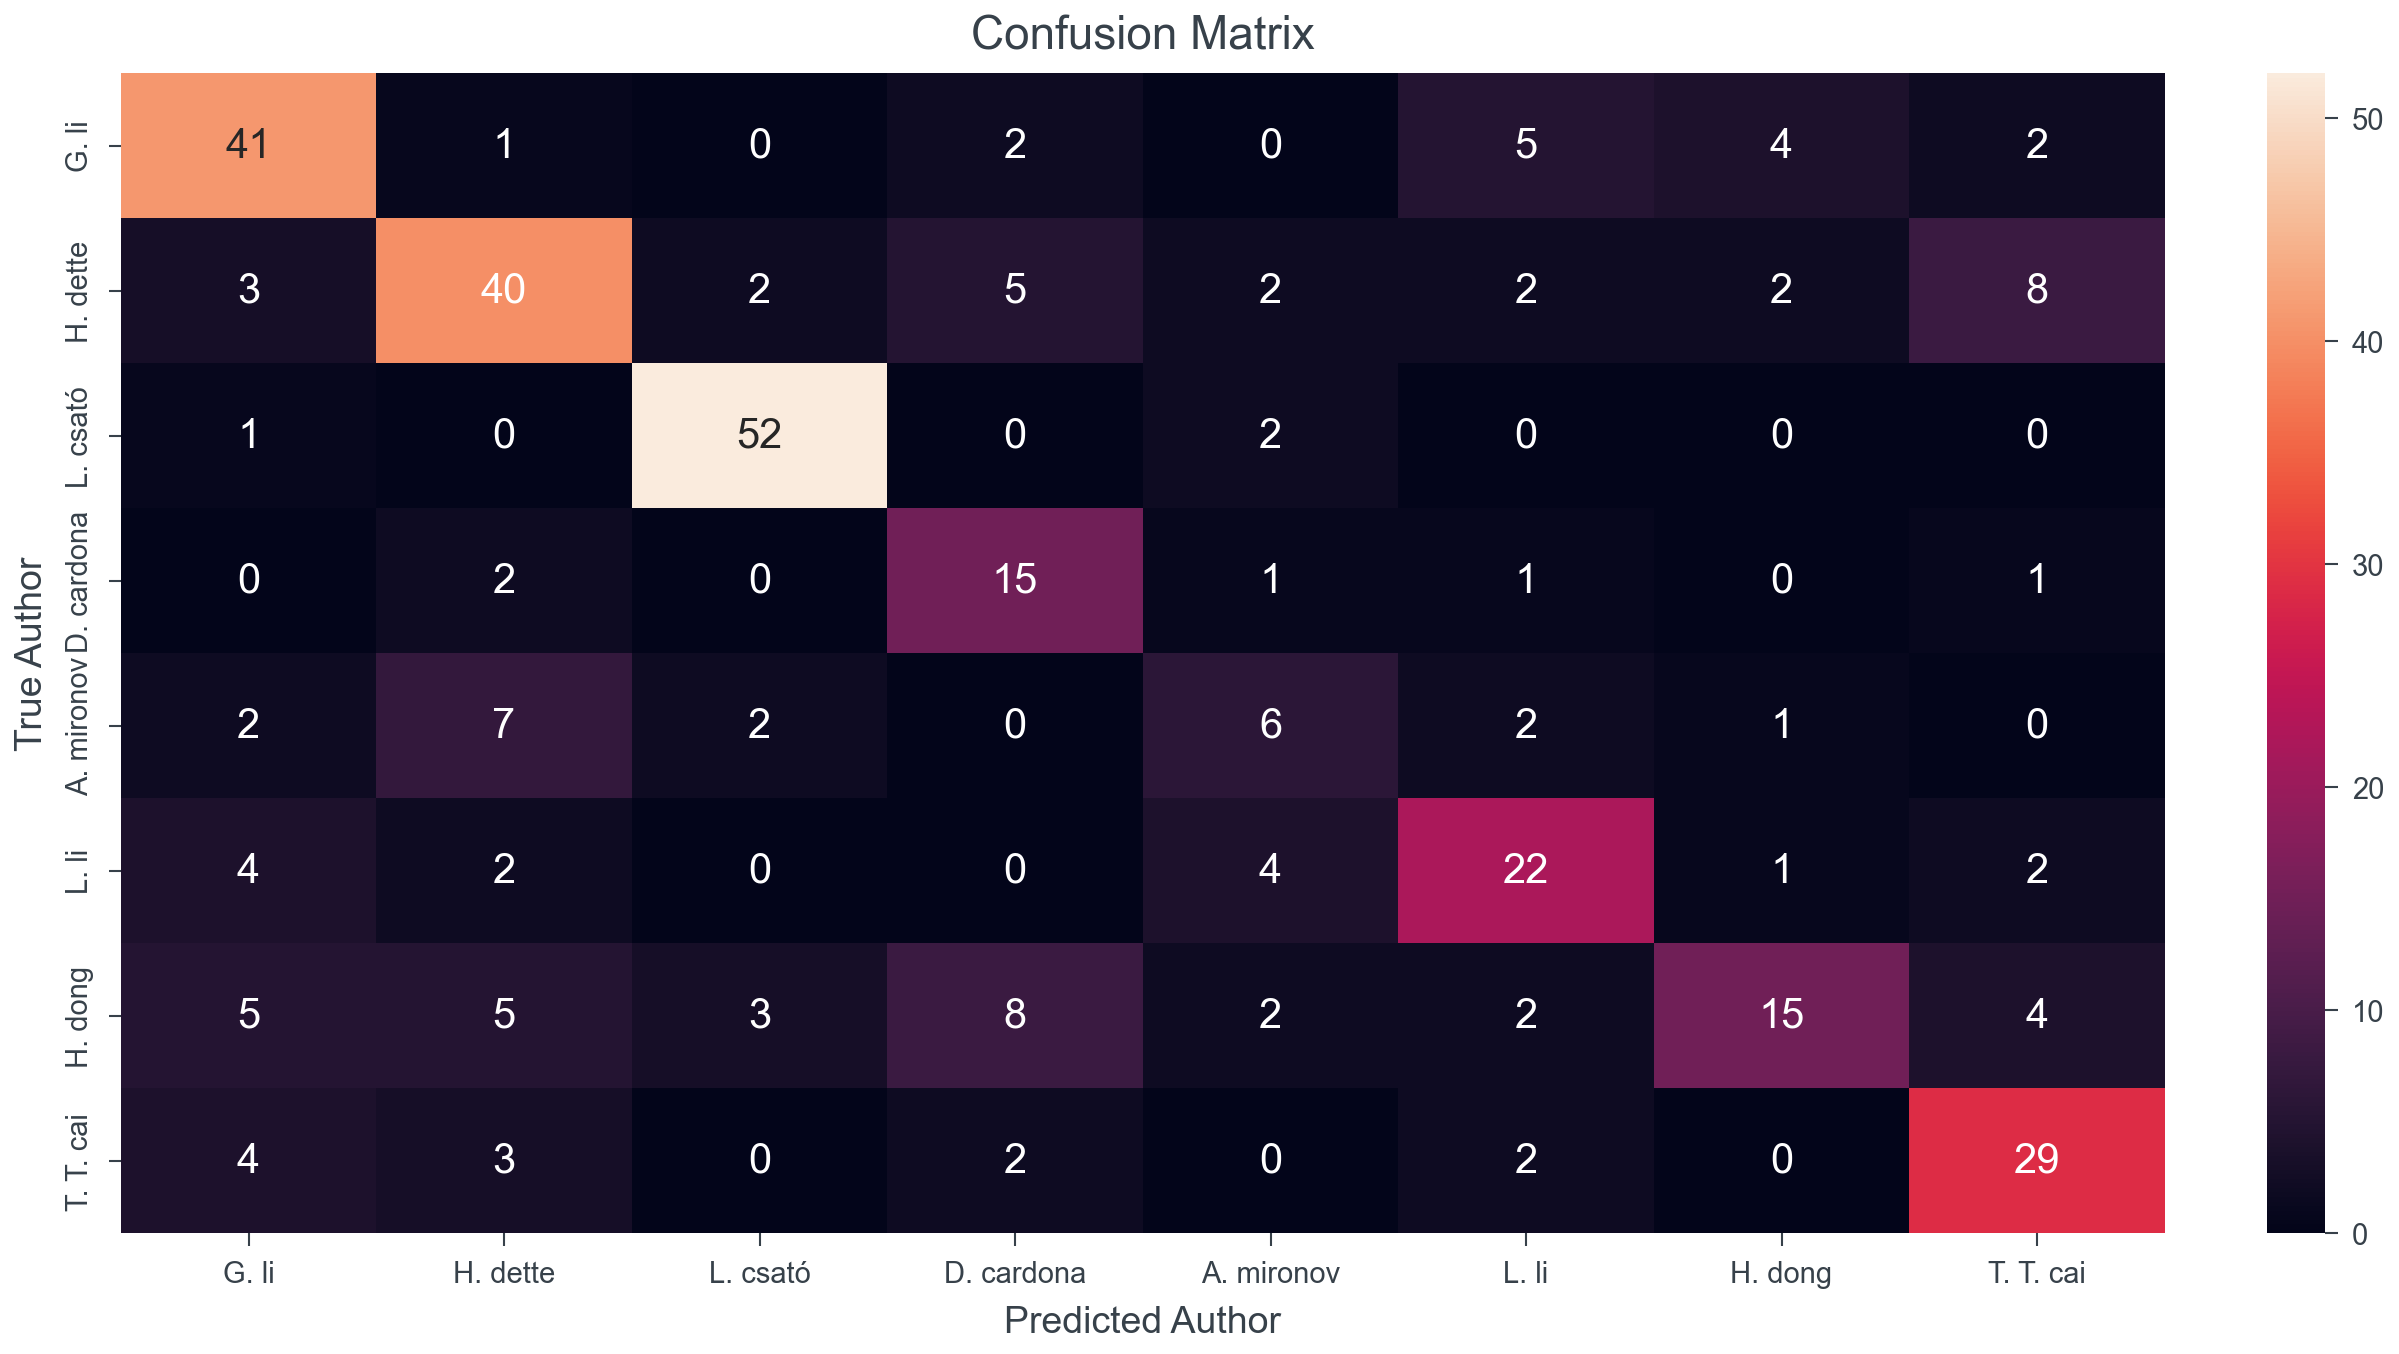

In [6]:
(predictions_general, 
 performances_general, 
 feature_selection_ratios_general, 
 feature_selection_dfs_general, 
 feature_selection_stdev_dfs_general,
 balanced_precisions) = analysis.pipeline_wrapper(root_folders[0], feature_select_nums=[2,3,5,8,13,21,55,89])

## Feature Selection Analysis

In [7]:
from src.plotting import plot_precision_progression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.style_manager import apply_style

Mode: STANDARD (Lines)
Tübingen Style Applied successfully!


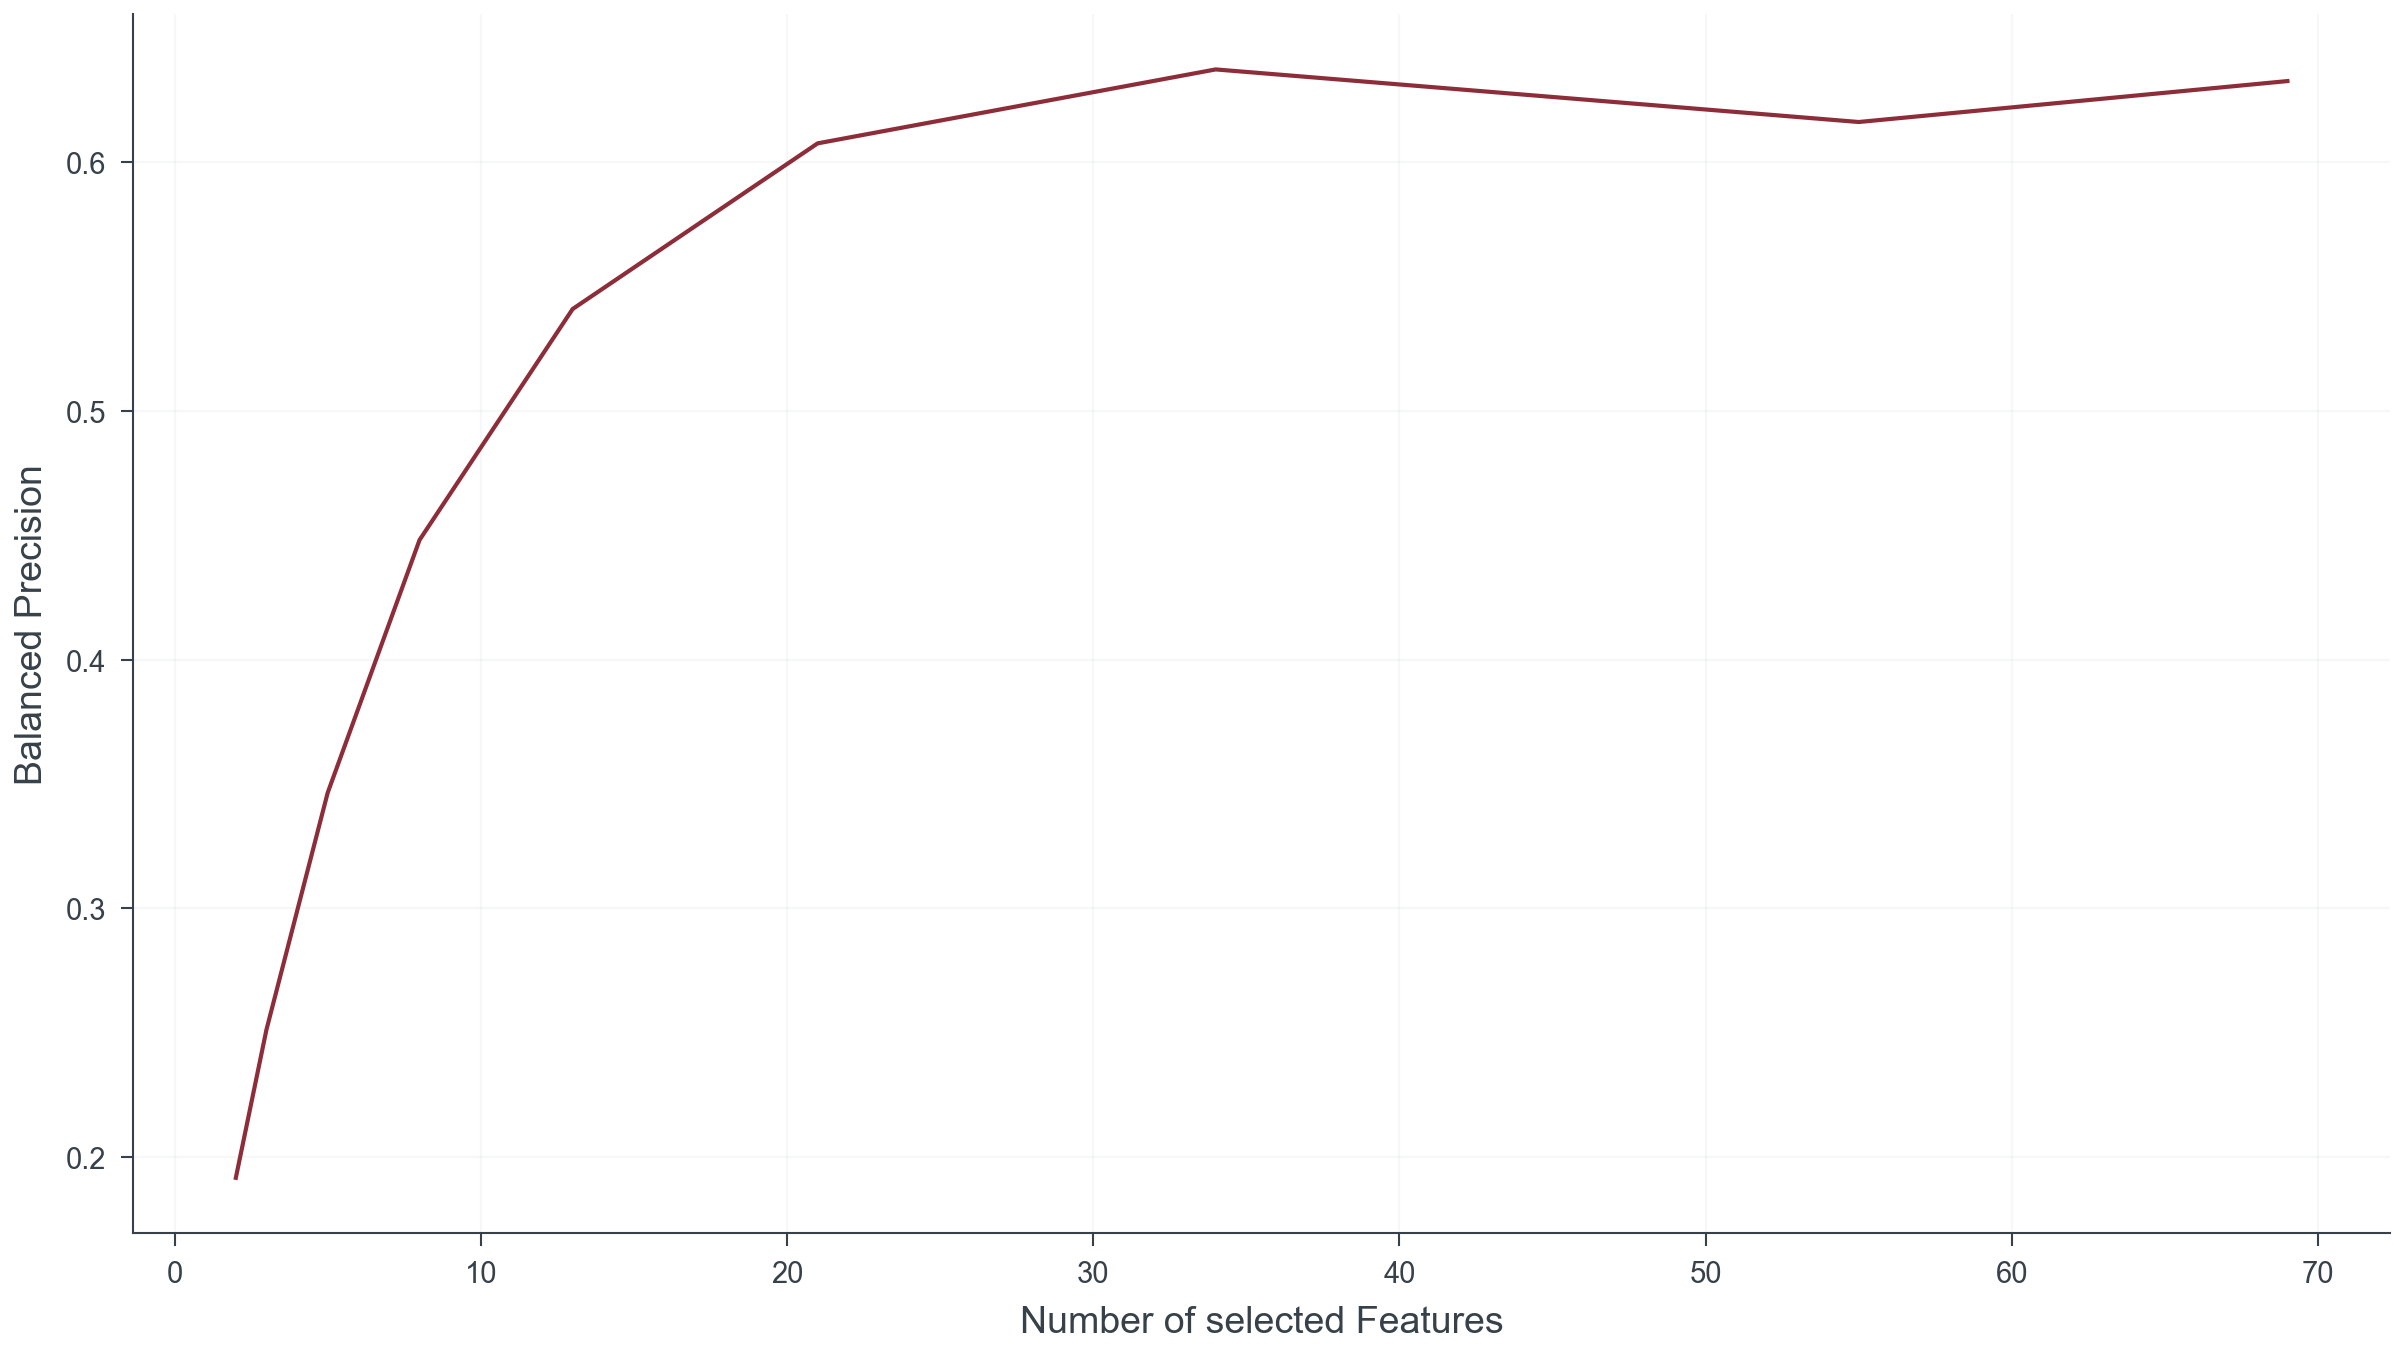

In [8]:
balanced_precision_list = []
feature_selection_nums = []
apply_style()
for key in performances_general.keys():
    if key > 34:
        balanced_precision_list.append(balanced_precisions_34["first_author"])
        feature_selection_nums.append(34)
    conf_mat = performances_general[key]["first_author"]
    balanced_precision = analysis.get_balanced_acc(conf_mat)
    balanced_precision_list.append(balanced_precision)
    feature_selection_nums.append(min([69, key]))
save_location = root_folders[0] + "accuracy_progression.png"
data = np.vstack([np.array(balanced_precision_list), np.array(feature_selection_nums)]).T
data_df = pd.DataFrame(data=data, index=range(data.shape[0]), columns=["prec_vals", "num_feats"])
ax = sns.lineplot(data=data_df, x="num_feats", y="prec_vals")
ax.set_xlabel("Number of selected Features")
ax.set_ylabel("Balanced Precision")
plt.savefig(save_location, dpi=150, bbox_inches='tight')
plt.show()

In [9]:
def magnify():
    return [
        {"selector": "th", "props": [("font-size", "4pt")]},
        {"selector": "td", "props": [("padding", "0em 0em")]},
        {"selector": "th:hover", "props": [("font-size", "12pt")]},
        {
            "selector": "tr:hover td:hover",
            "props": [("max-width", "200px"), ("font-size", "12pt")],
        },
    ]

In [10]:
import seaborn as sns
from src.style_manager import apply_style

In [11]:
#apply_style()
color_palette = sns.color_palette("flare_r", as_cmap=True)
dataframe = feature_selection_dfs_general_34[34]["first_author"]
dataframe.style.background_gradient(cmap=color_palette).set_properties(
    **{"max-width": "80px", "font-size": "1"}
).set_caption("Hover to magnify").format(precision=2).set_table_styles(magnify())

AttributeError: The '.style' accessor requires jinja2

In [12]:
color_palette = sns.color_palette("flare_r", as_cmap=True)
dataframe = feature_selection_dfs_general[89]["first_author"]
dataframe.style.background_gradient(cmap=color_palette).set_properties(
    **{"max-width": "80px", "font-size": "0.5pt"}
).set_caption("Hover to magnify").format(precision=2).set_table_styles(magnify())

AttributeError: The '.style' accessor requires jinja2

## Evaluation under varying Circumstances

Mode: STANDARD (Lines)
Tübingen Style Applied successfully!


2026-02-02 15:38:15,887 - WARNING - Removed zero-count row: 2506.00747
2026-02-02 15:38:16,175 - WARNING - Removed zero-count row: 2506.00747


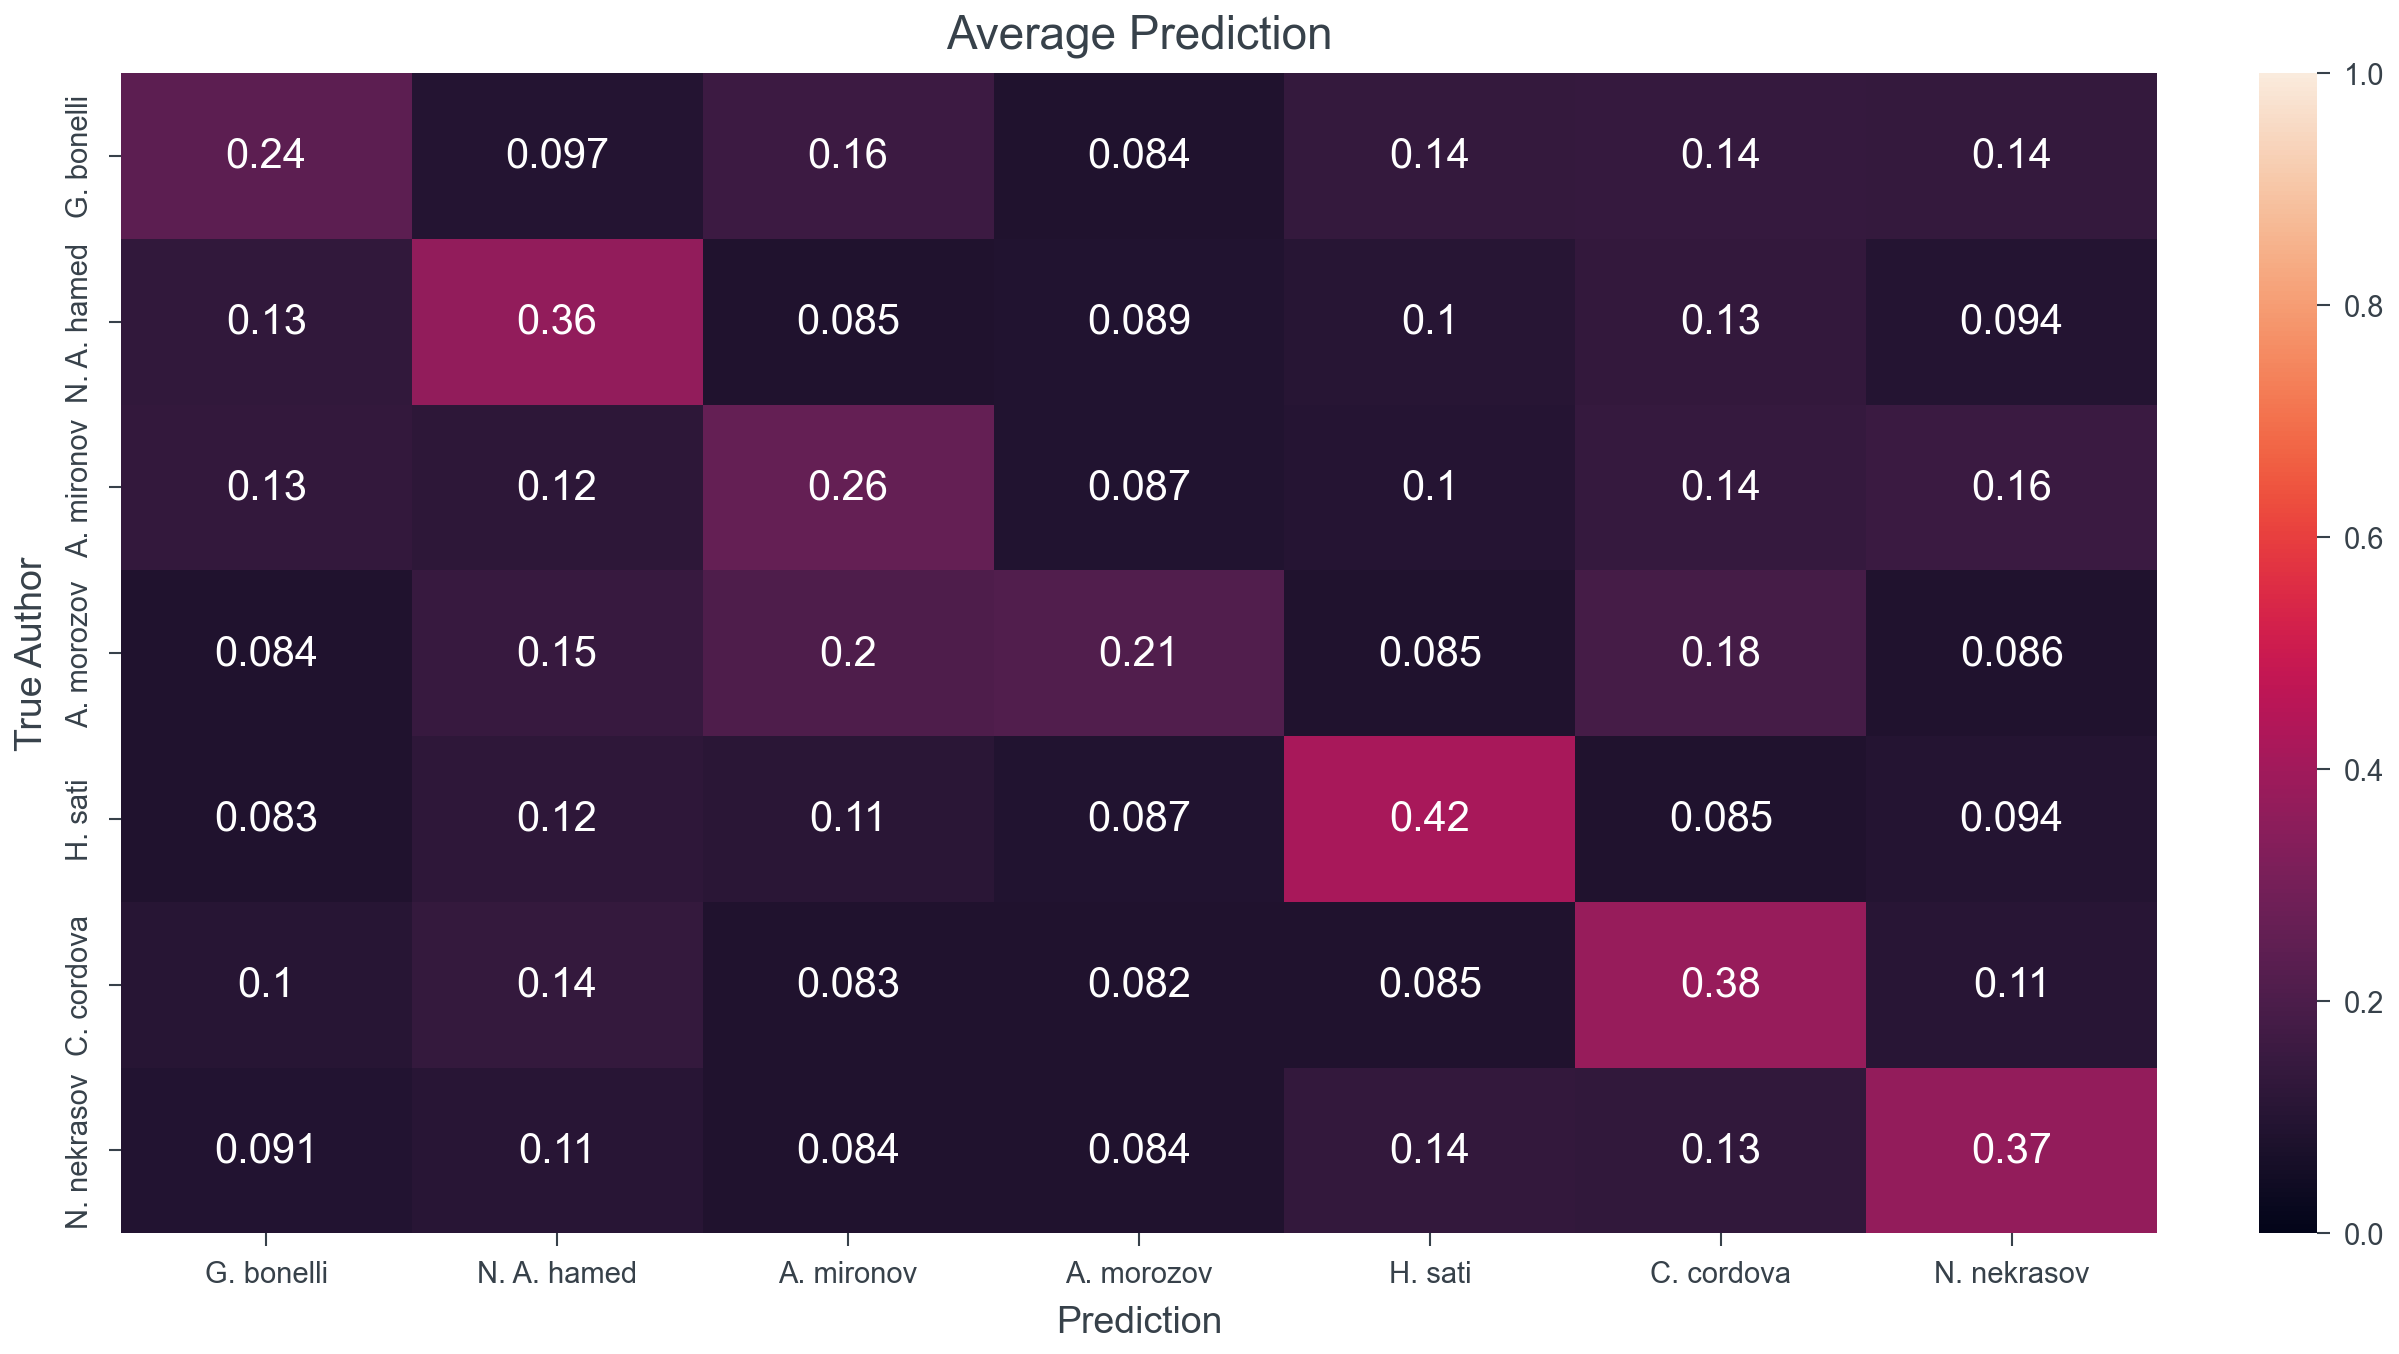

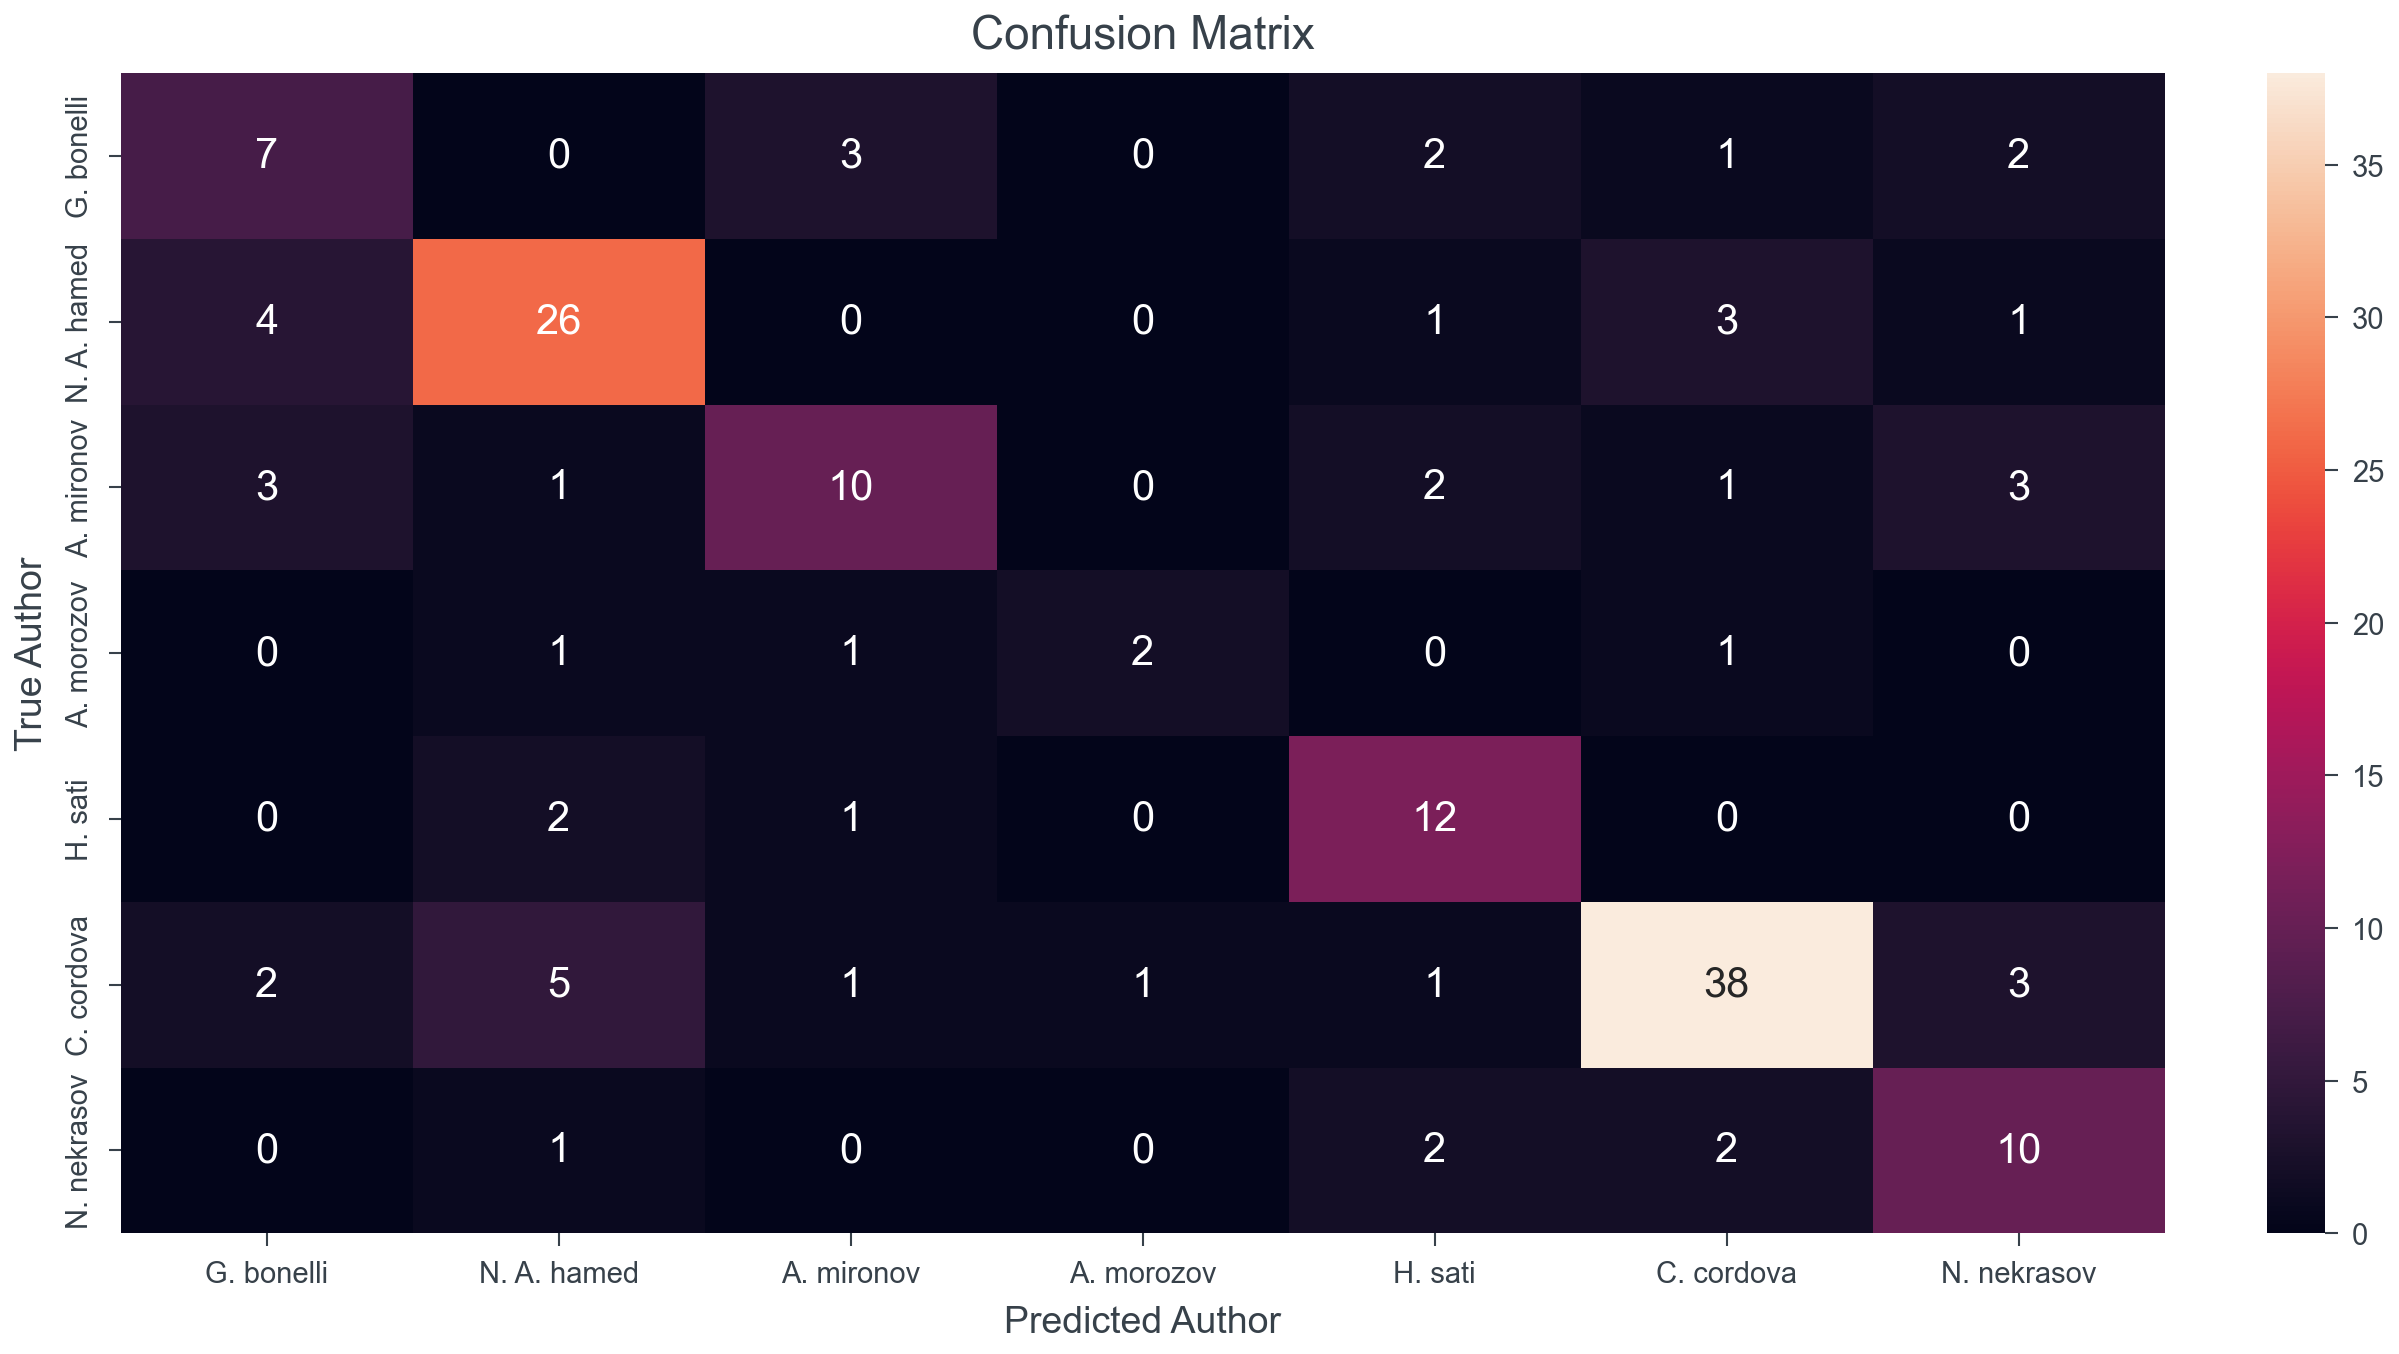

In [13]:
apply_style()
(predictions_cat, 
 performances_cat, 
 feature_selection_ratios_cat, 
 feature_selection_dfs_cat, 
 feature_selection_stdev_dfs_cat,
 balanced_precisions_cat) = analysis.pipeline_wrapper(root_folders[1], feature_select_nums=[34])

2026-02-02 15:51:15,007 - WARNING - Removed zero-count row: 1604.07838
2026-02-02 15:51:15,237 - WARNING - Removed zero-count row: 1604.07838


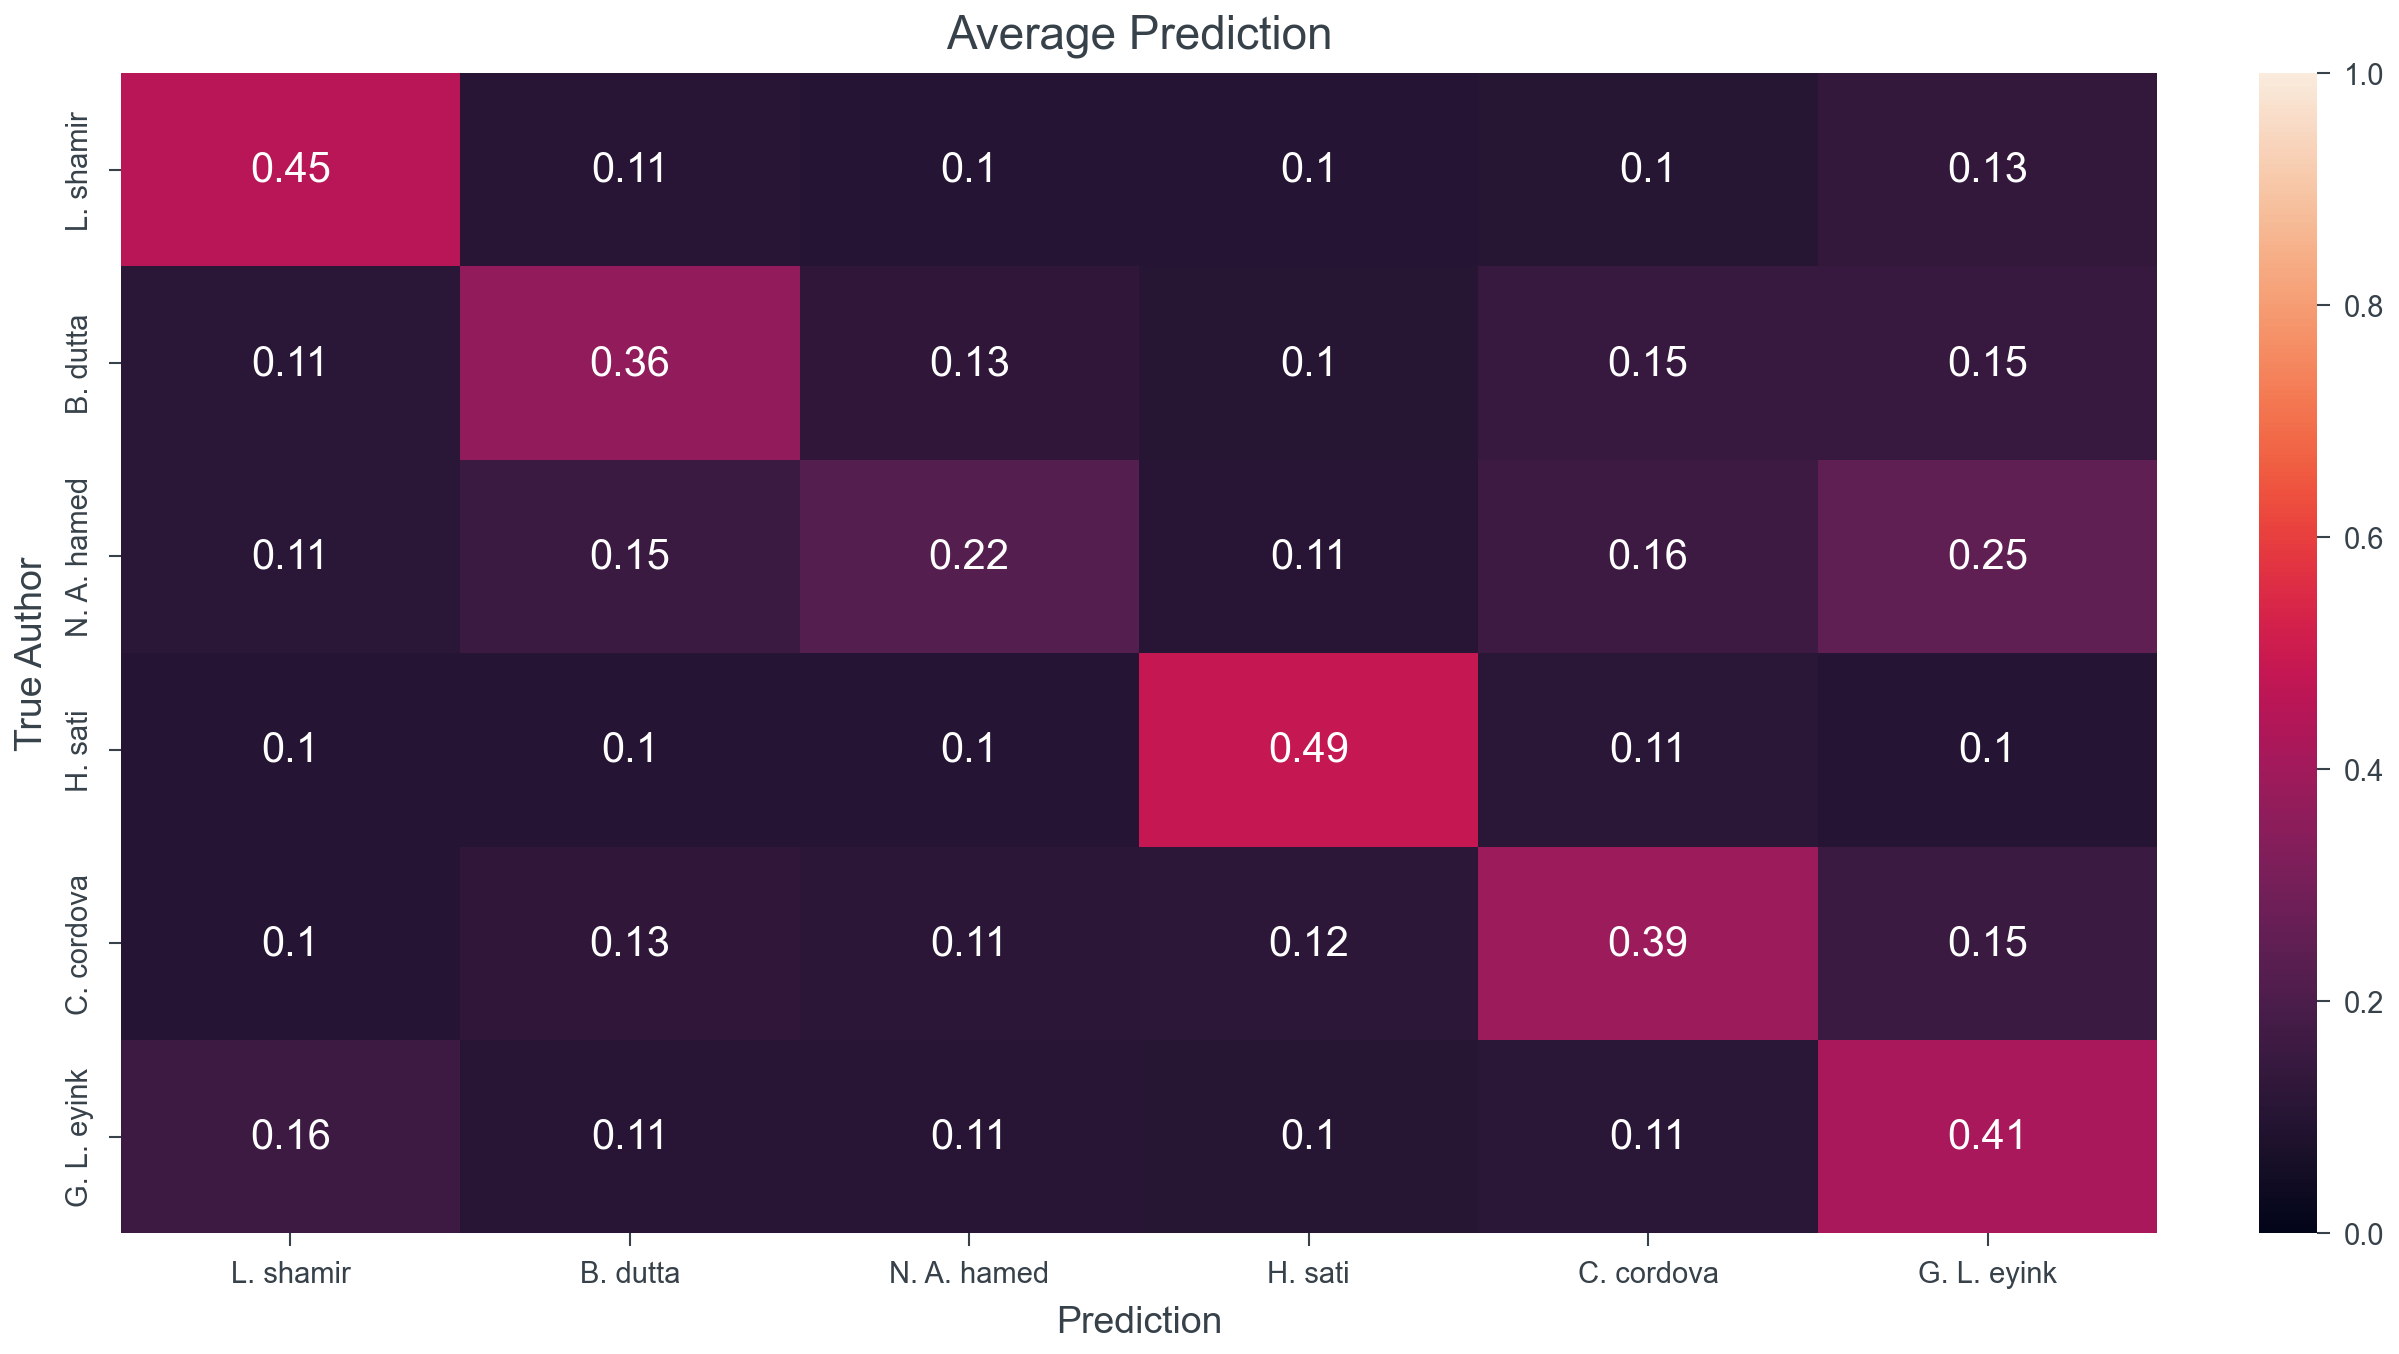

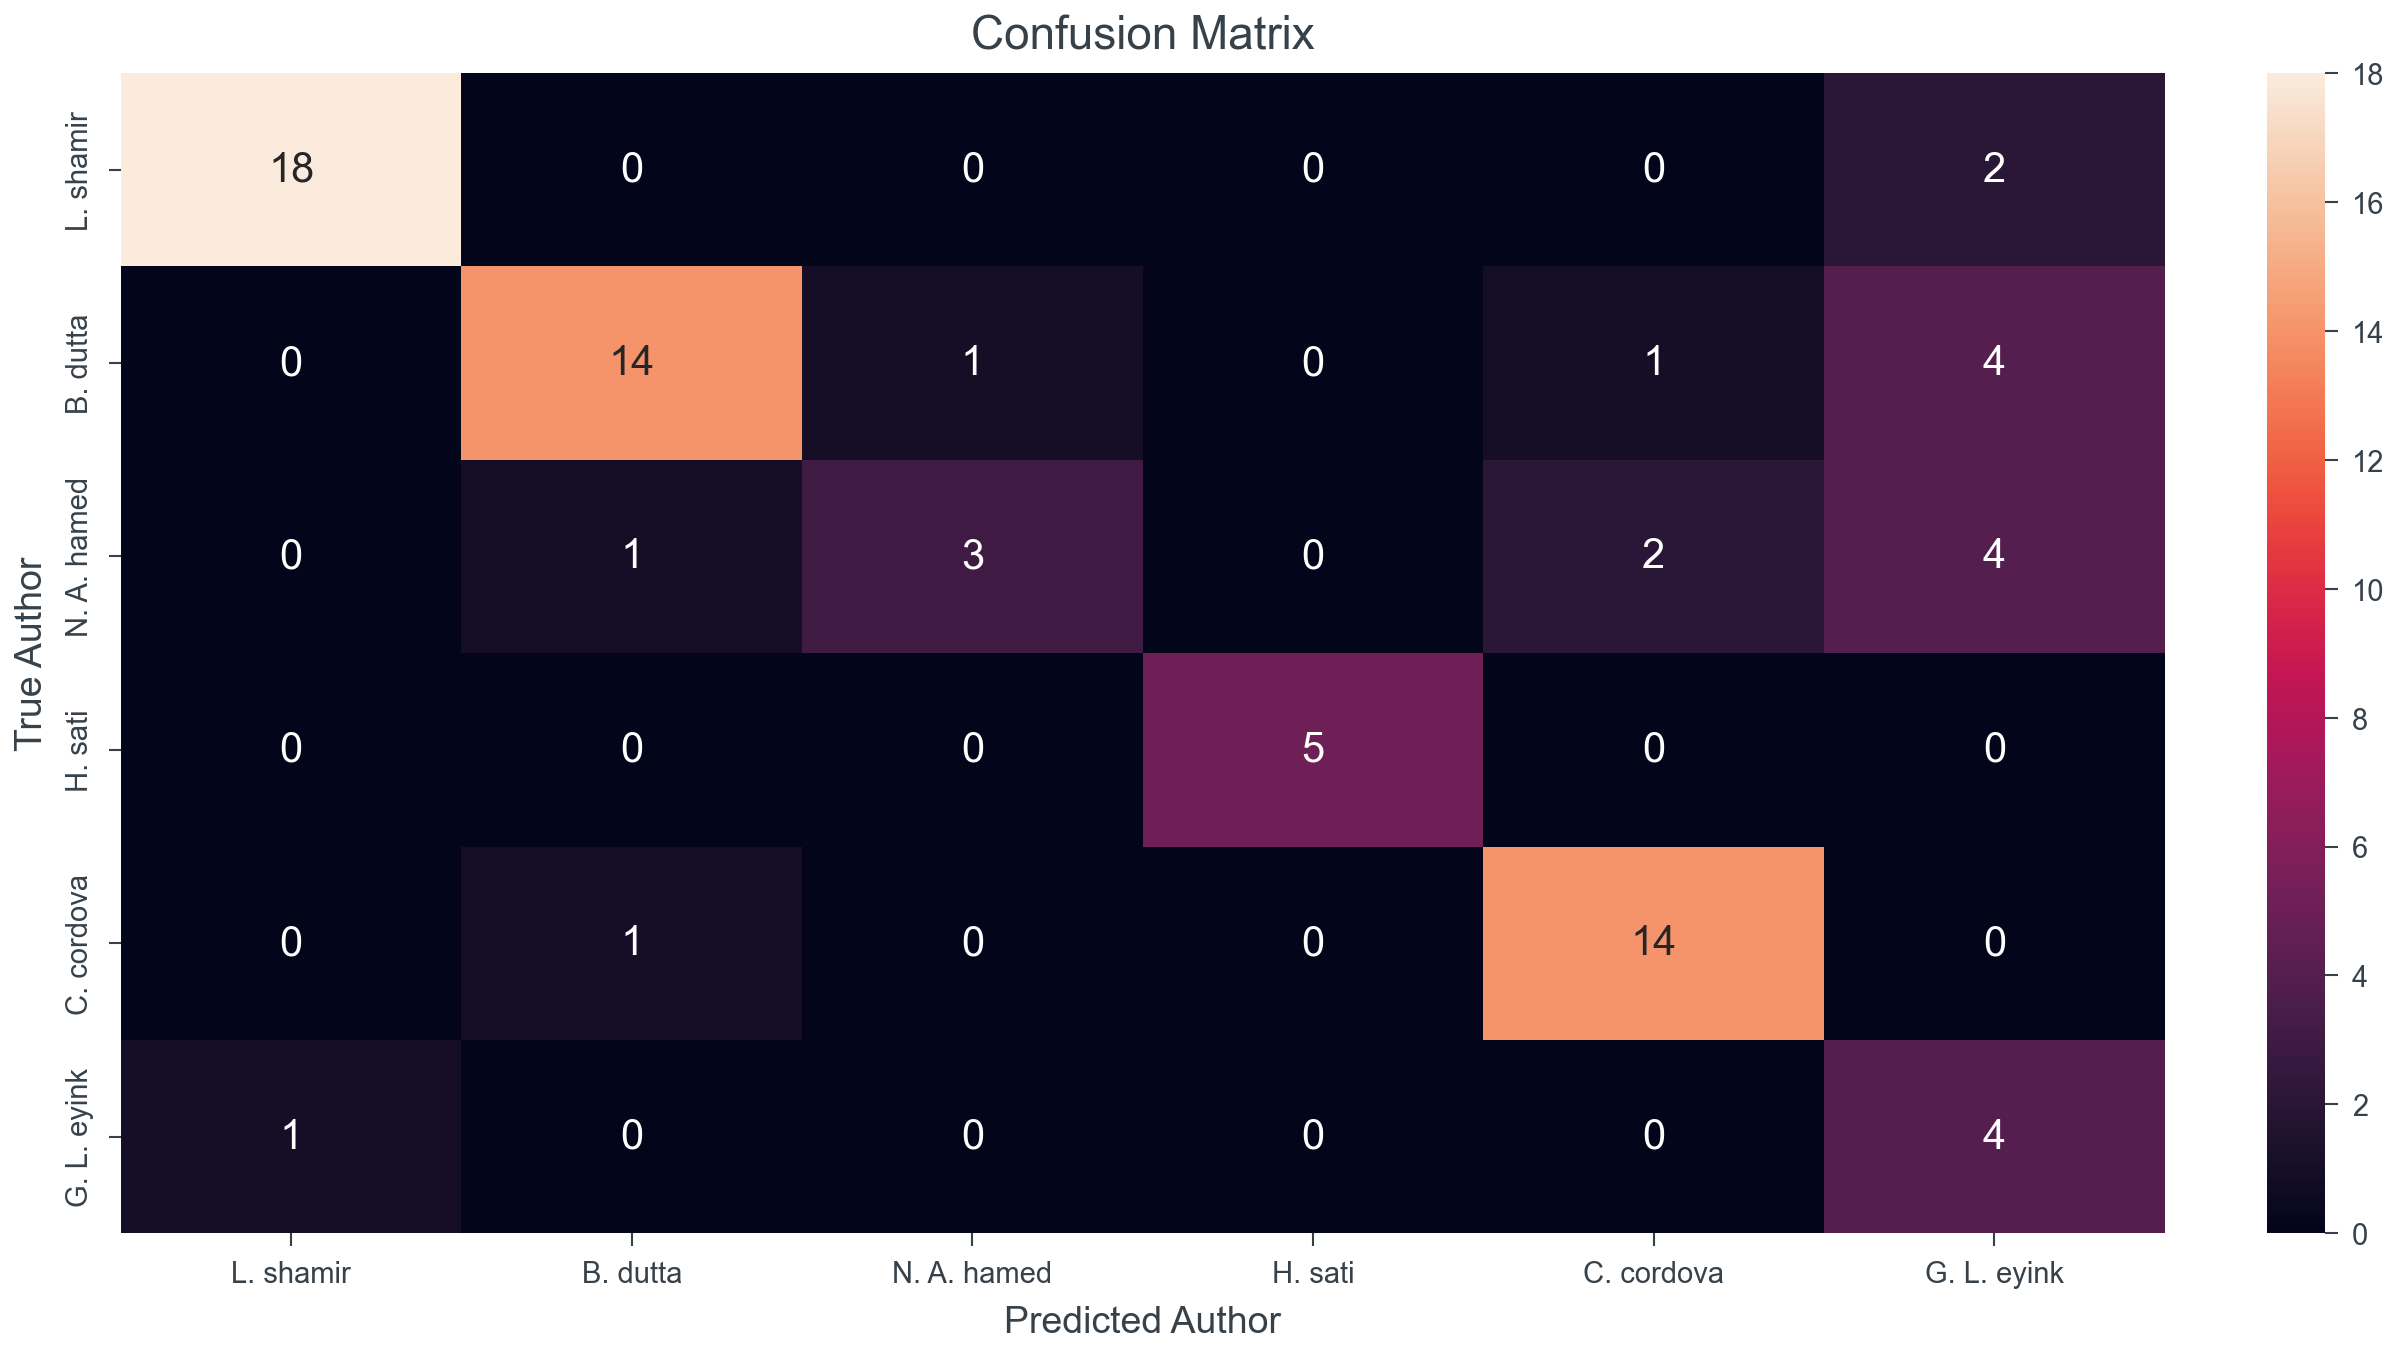

In [15]:
(predictions_nat, 
 performances_nat, 
 feature_selection_ratios_nat, 
 feature_selection_dfs_nat, 
 feature_selection_stdev_dfs_nat,
 balanced_precisions_nat) = analysis.pipeline_wrapper(root_folders[2], feature_select_nums=[34])

2026-02-02 15:03:50,263 - WARNING - Removed zero-count row: 2212.12892
2026-02-02 15:03:50,370 - WARNING - Removed zero-count row: 2212.12892


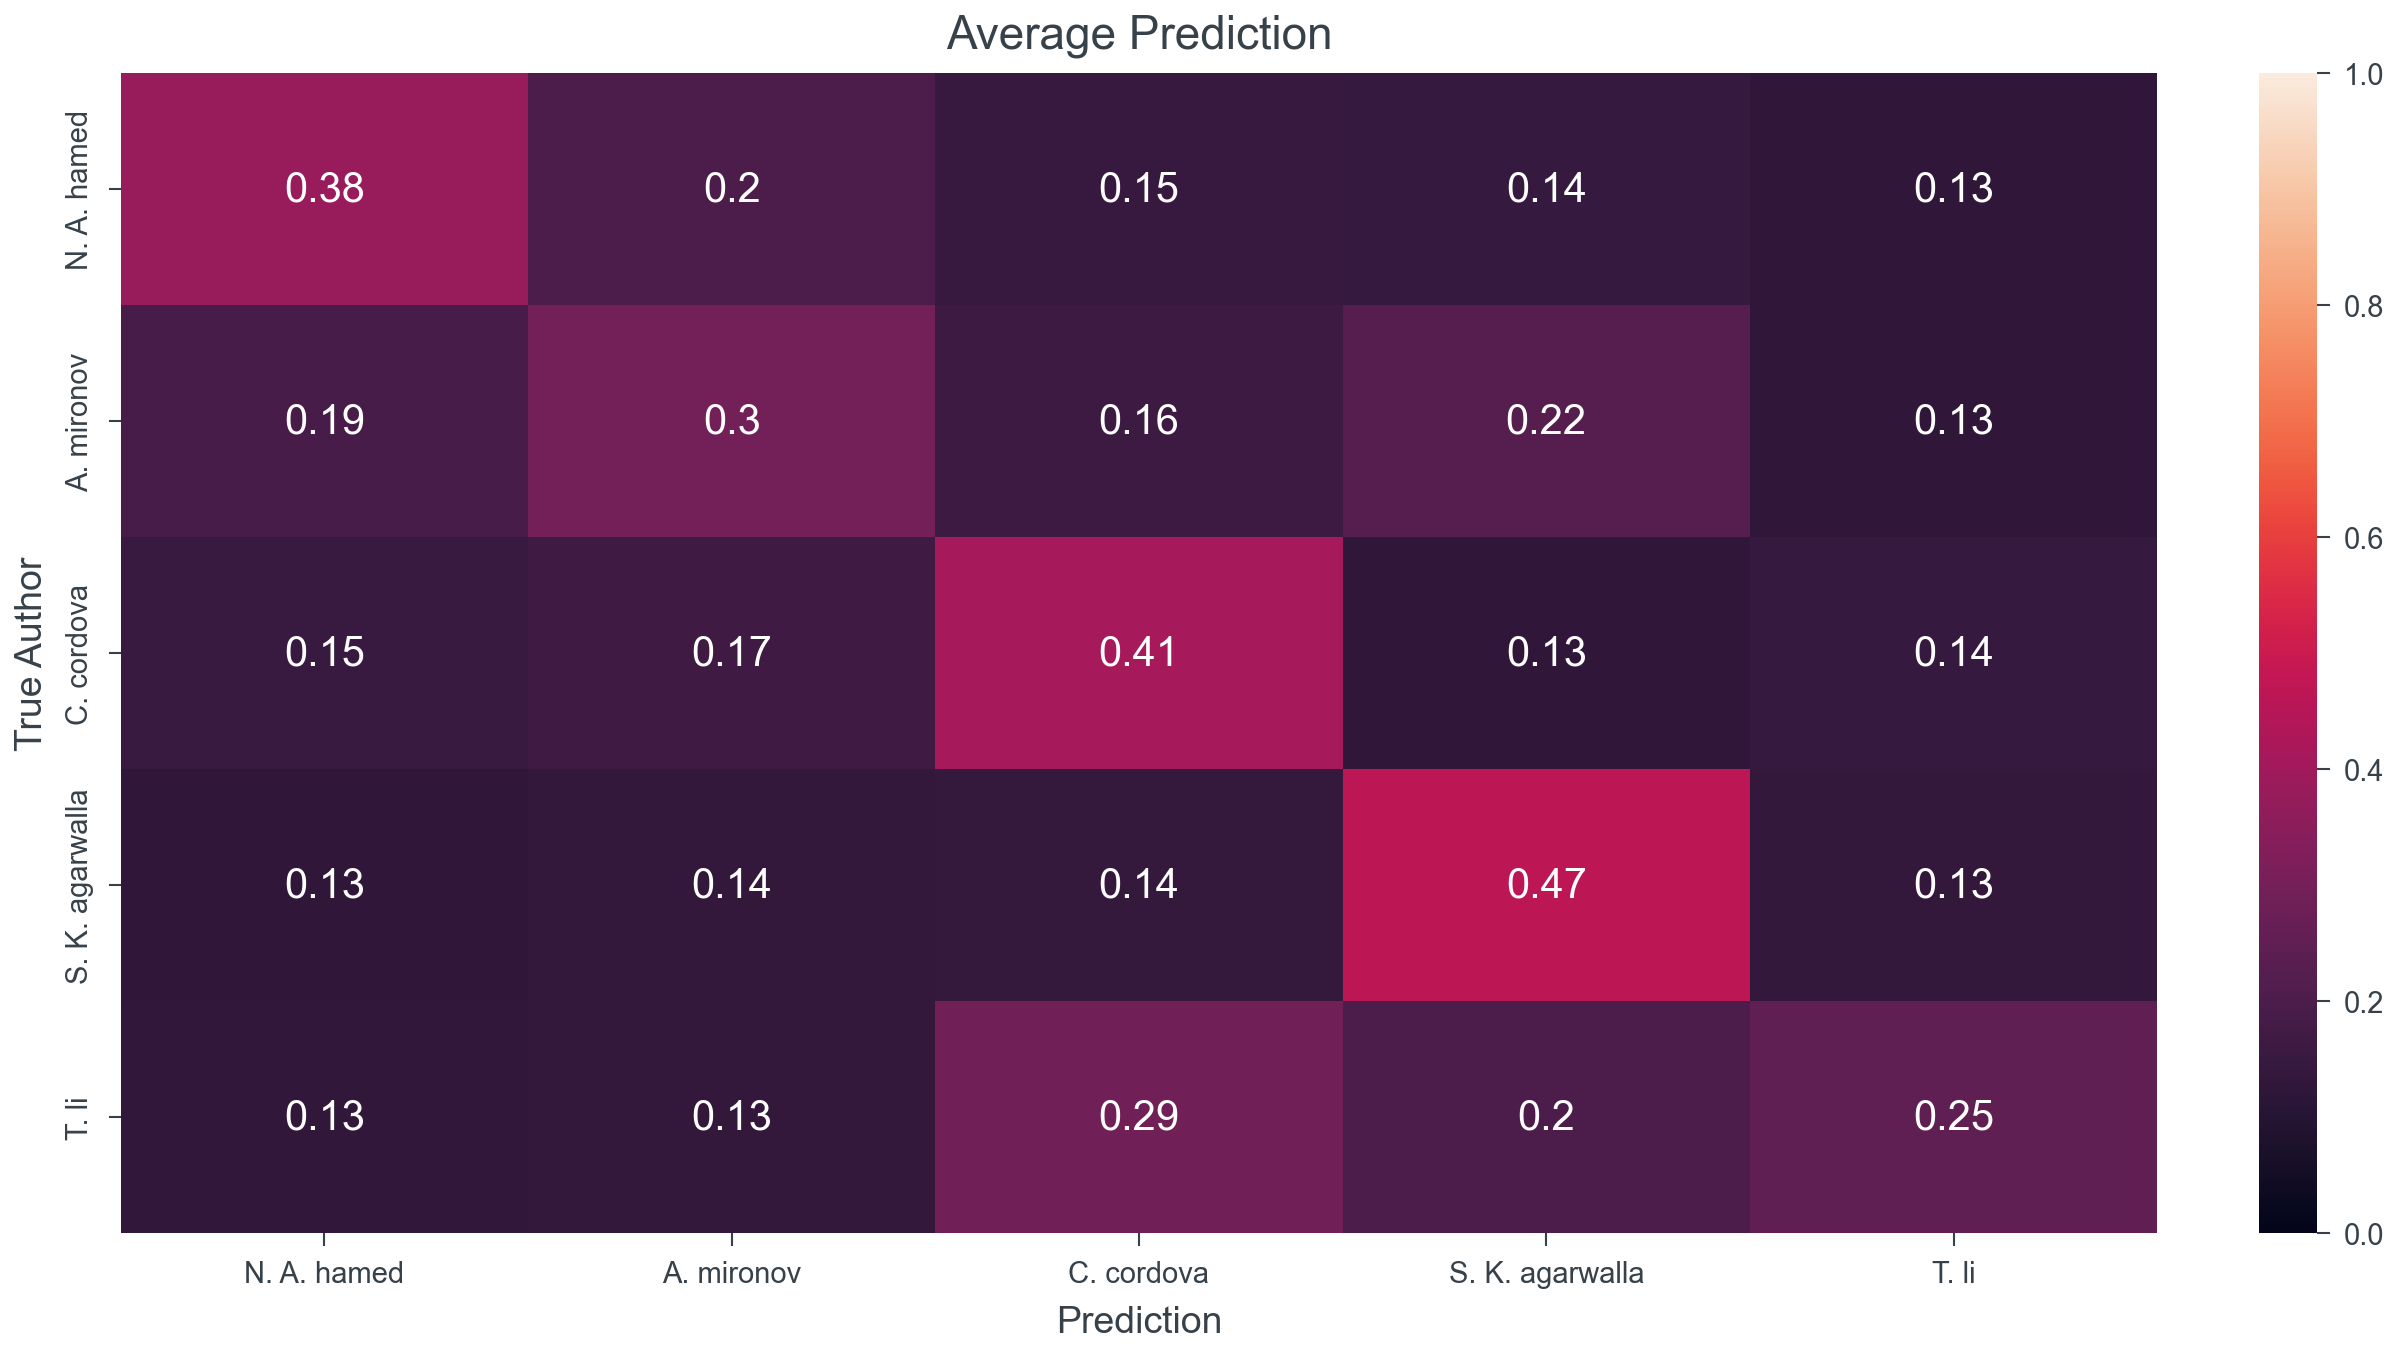

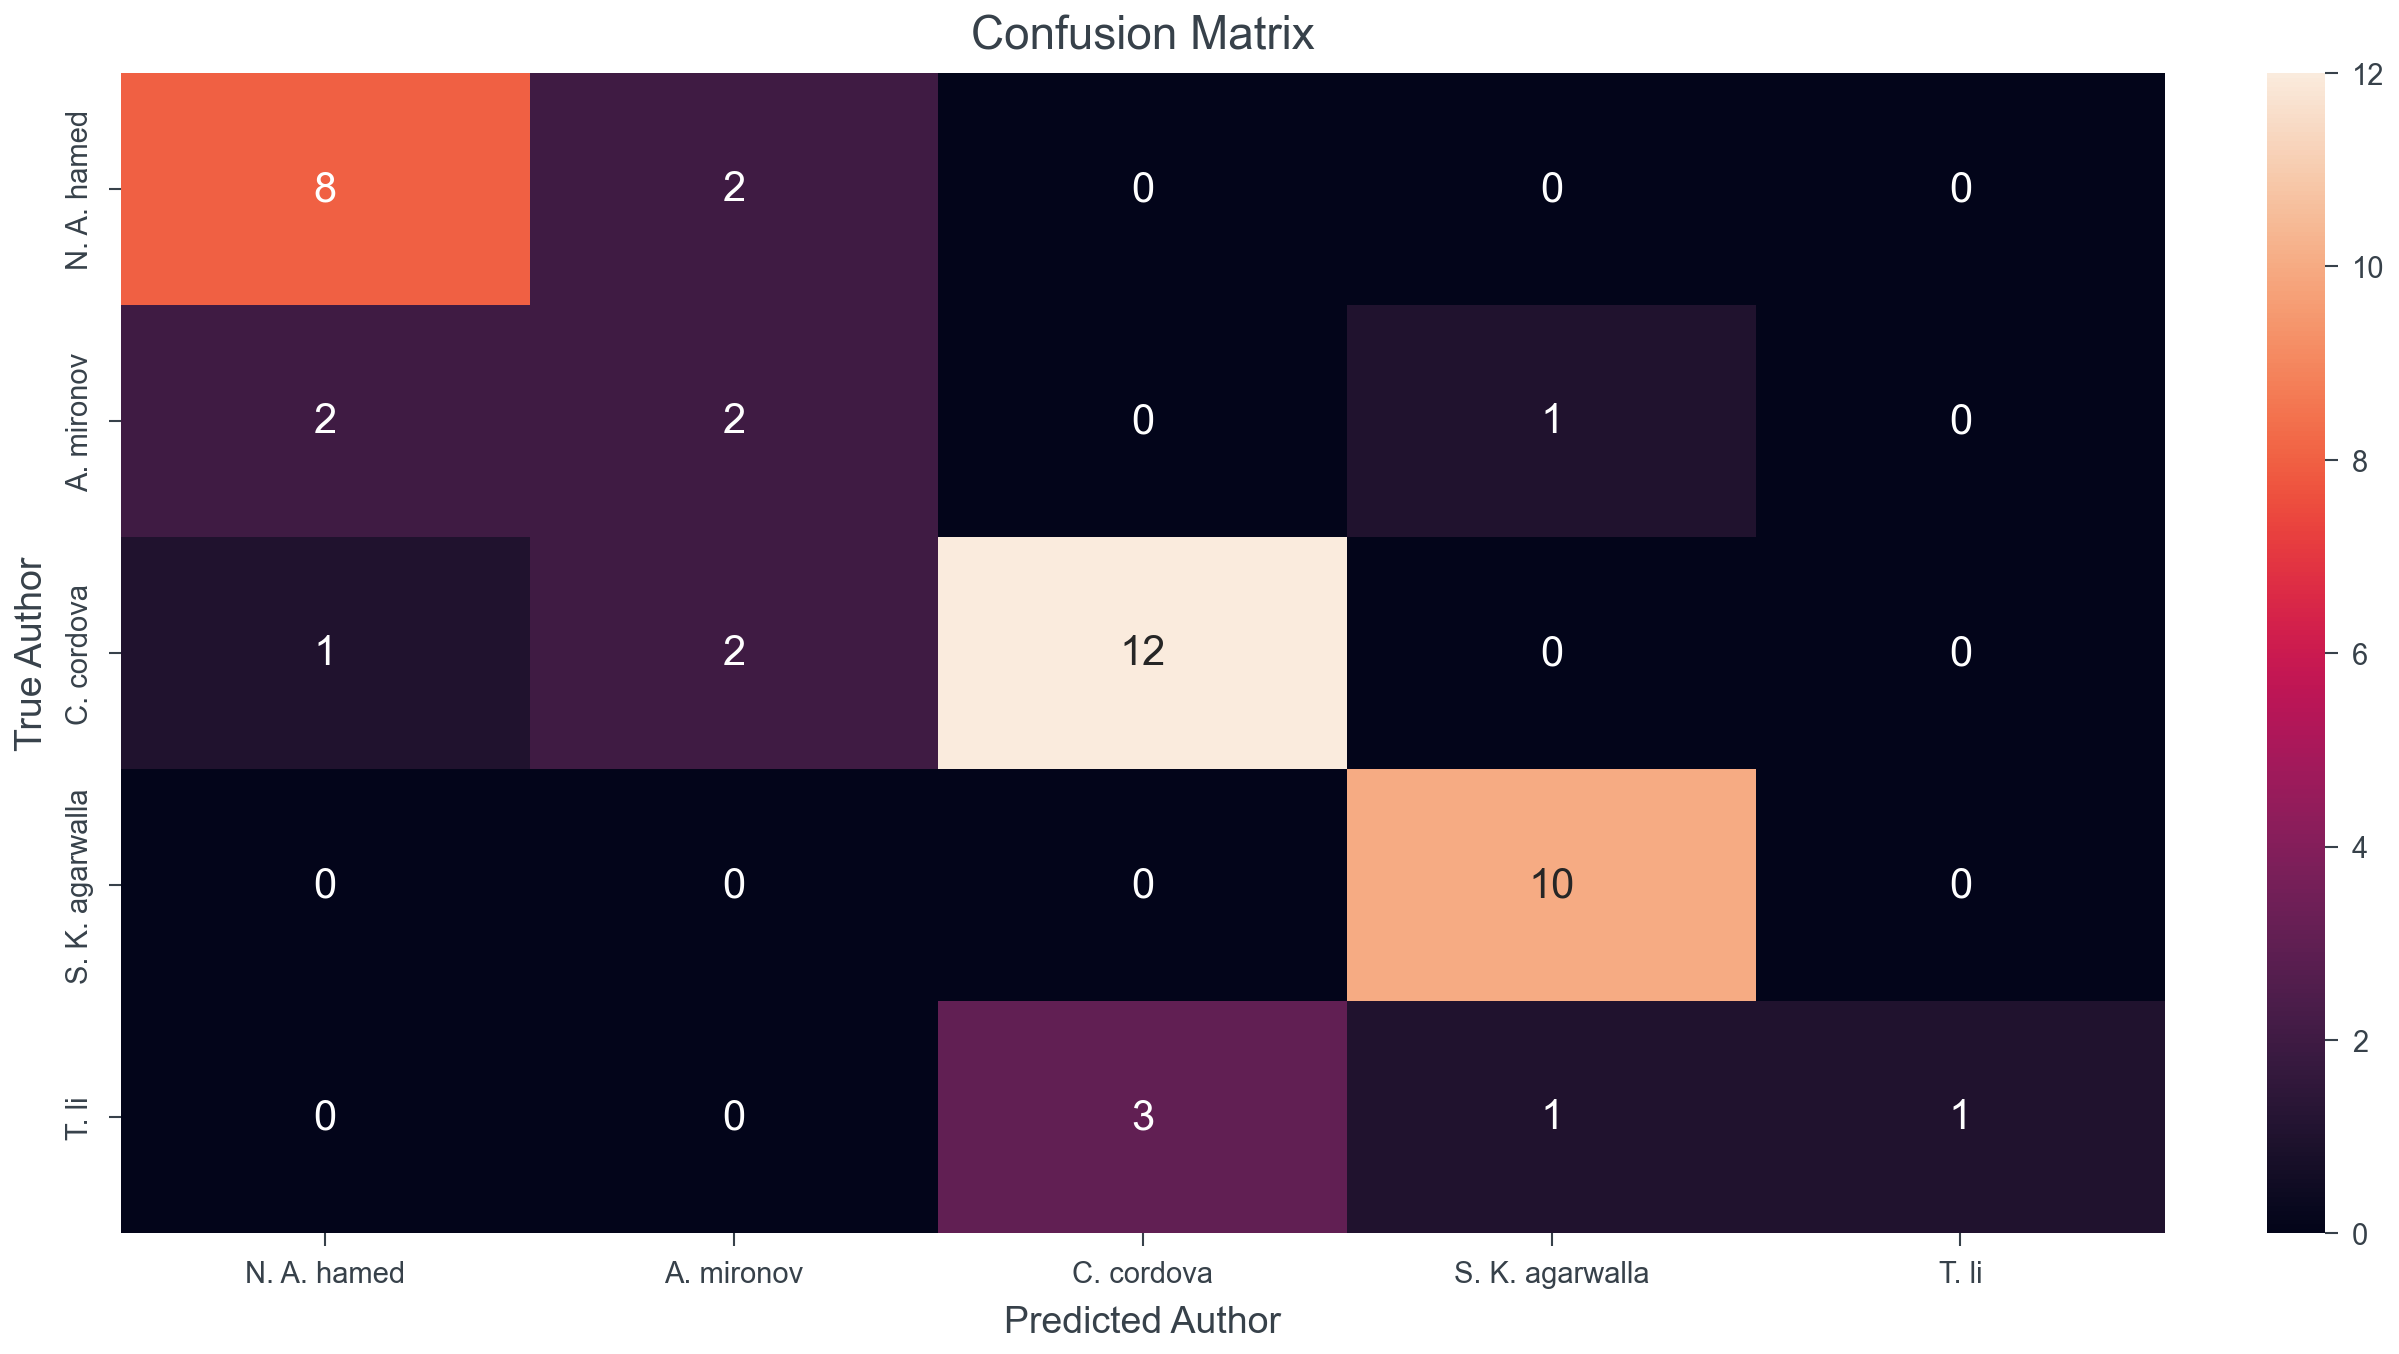

In [25]:
# TODO: rerun with larger feature_select_num size now that the (hacky) workaround is in place
(predictions_ven, 
 performances_ven, 
 feature_selection_ratios_ven, 
 feature_selection_dfs_ven, 
 feature_selection_stdev_dfs_ven,
 balanced_precisions_ven) = analysis.pipeline_wrapper(root_folders[3], feature_select_nums=[21])

2026-02-02 15:04:50,642 - WARNING - Removed zero-count row: 2504.02022
2026-02-02 15:04:50,810 - WARNING - Removed zero-count row: 2504.02022


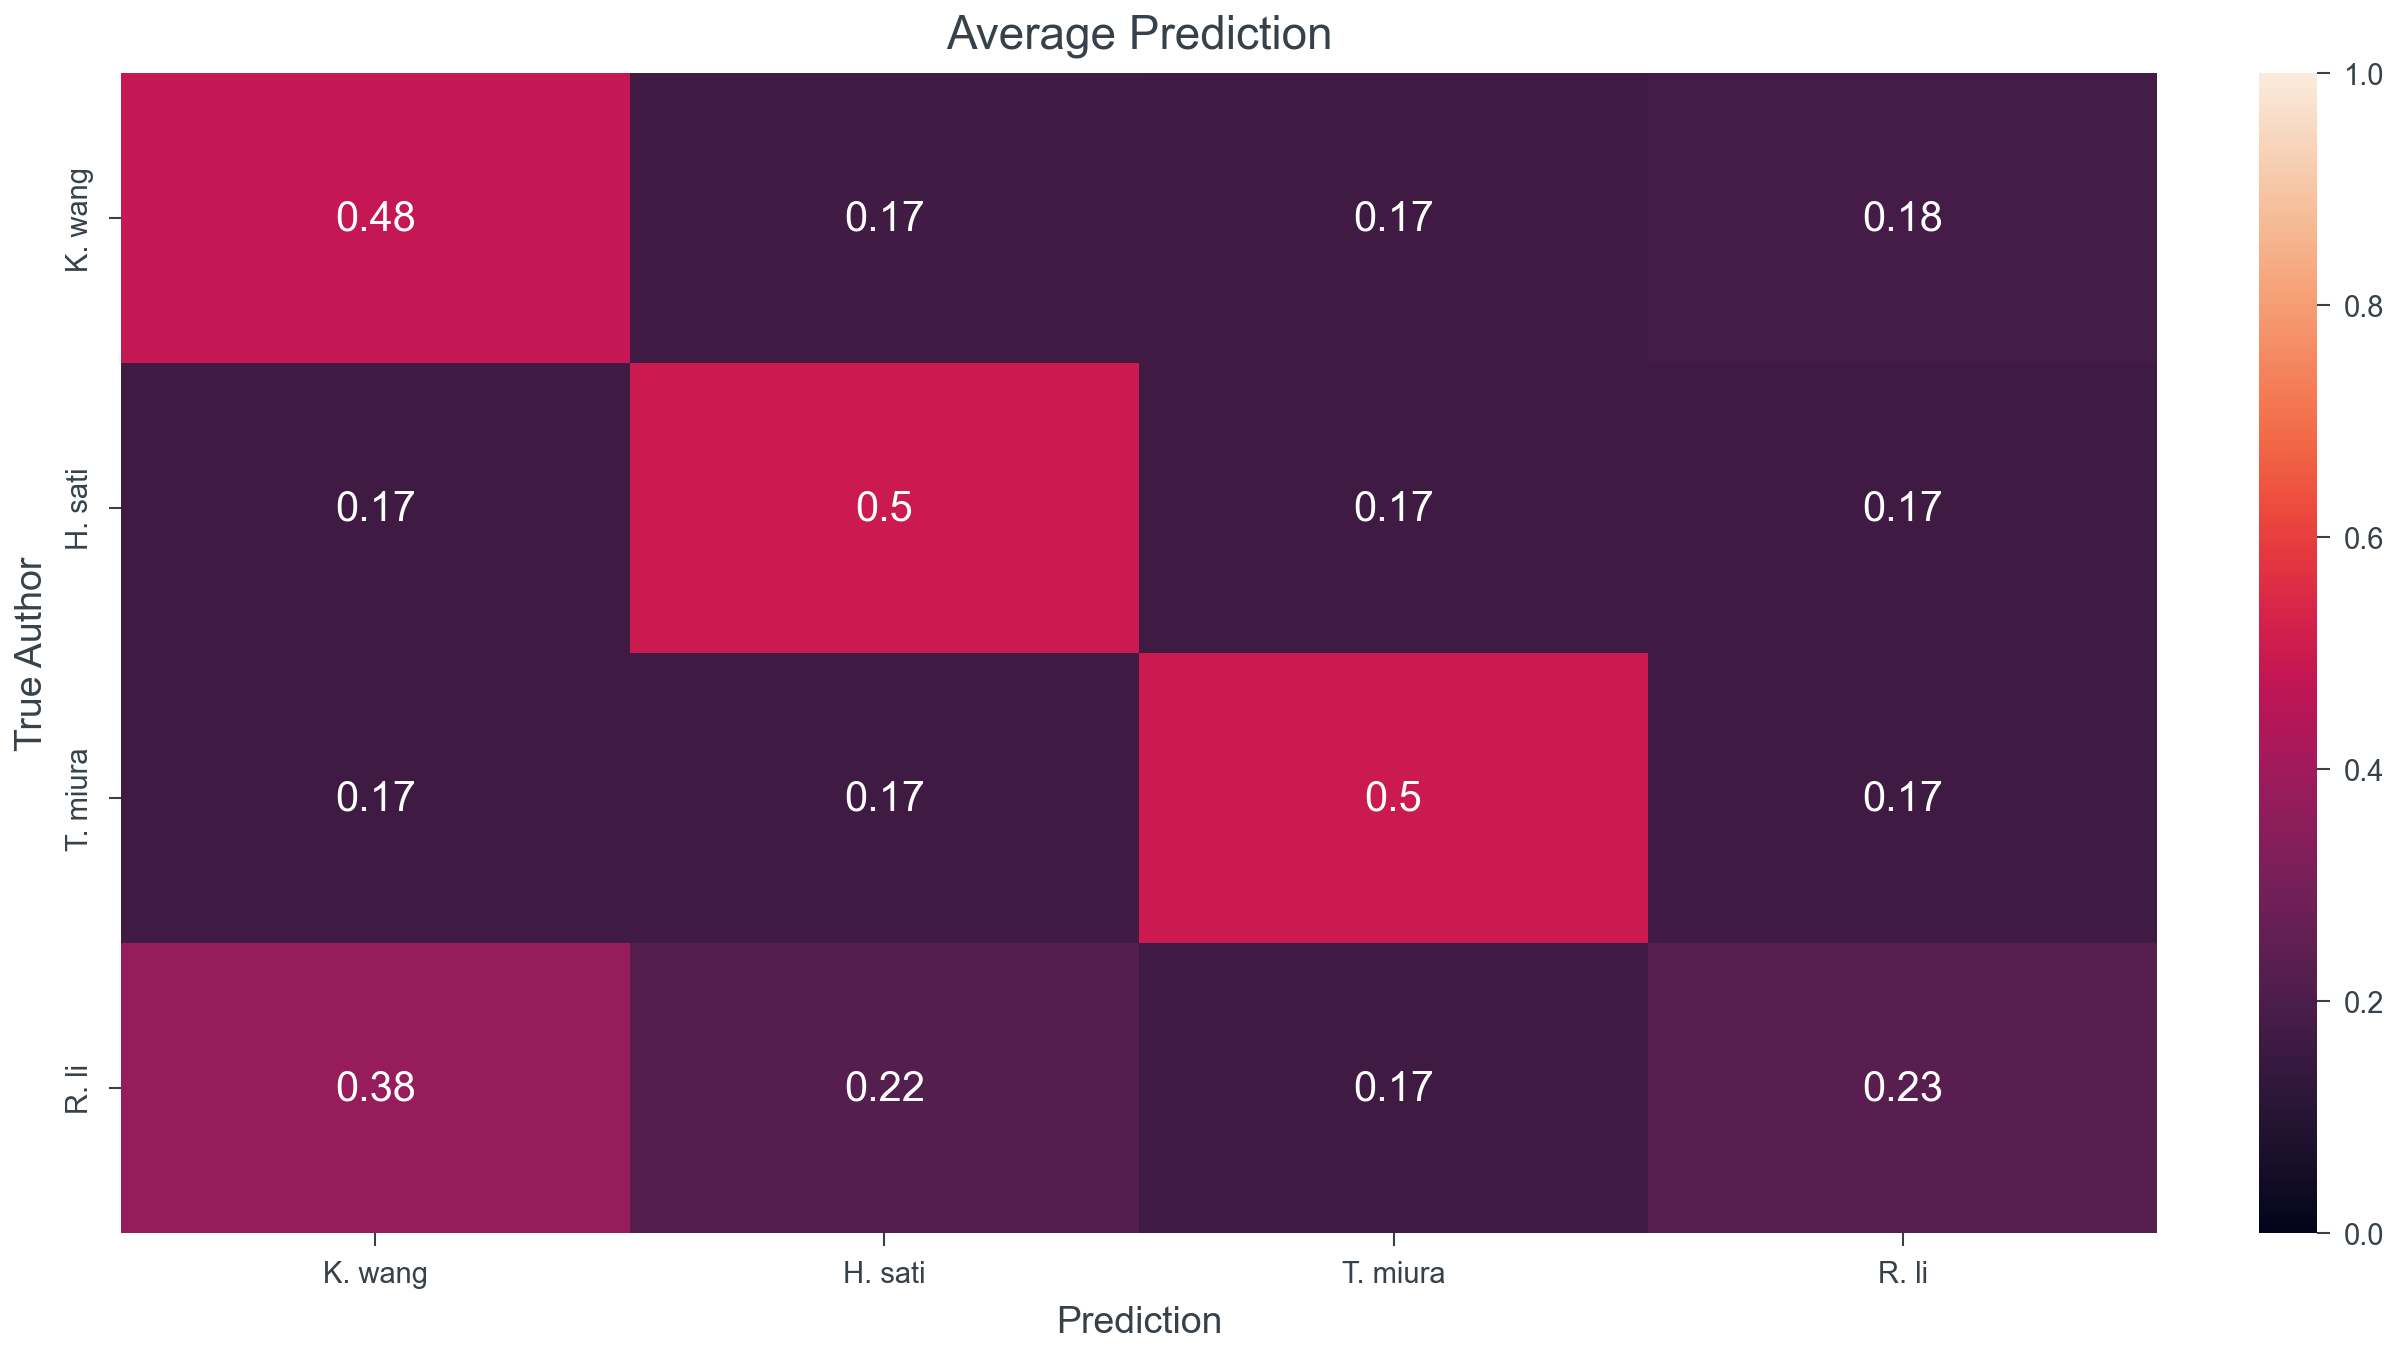

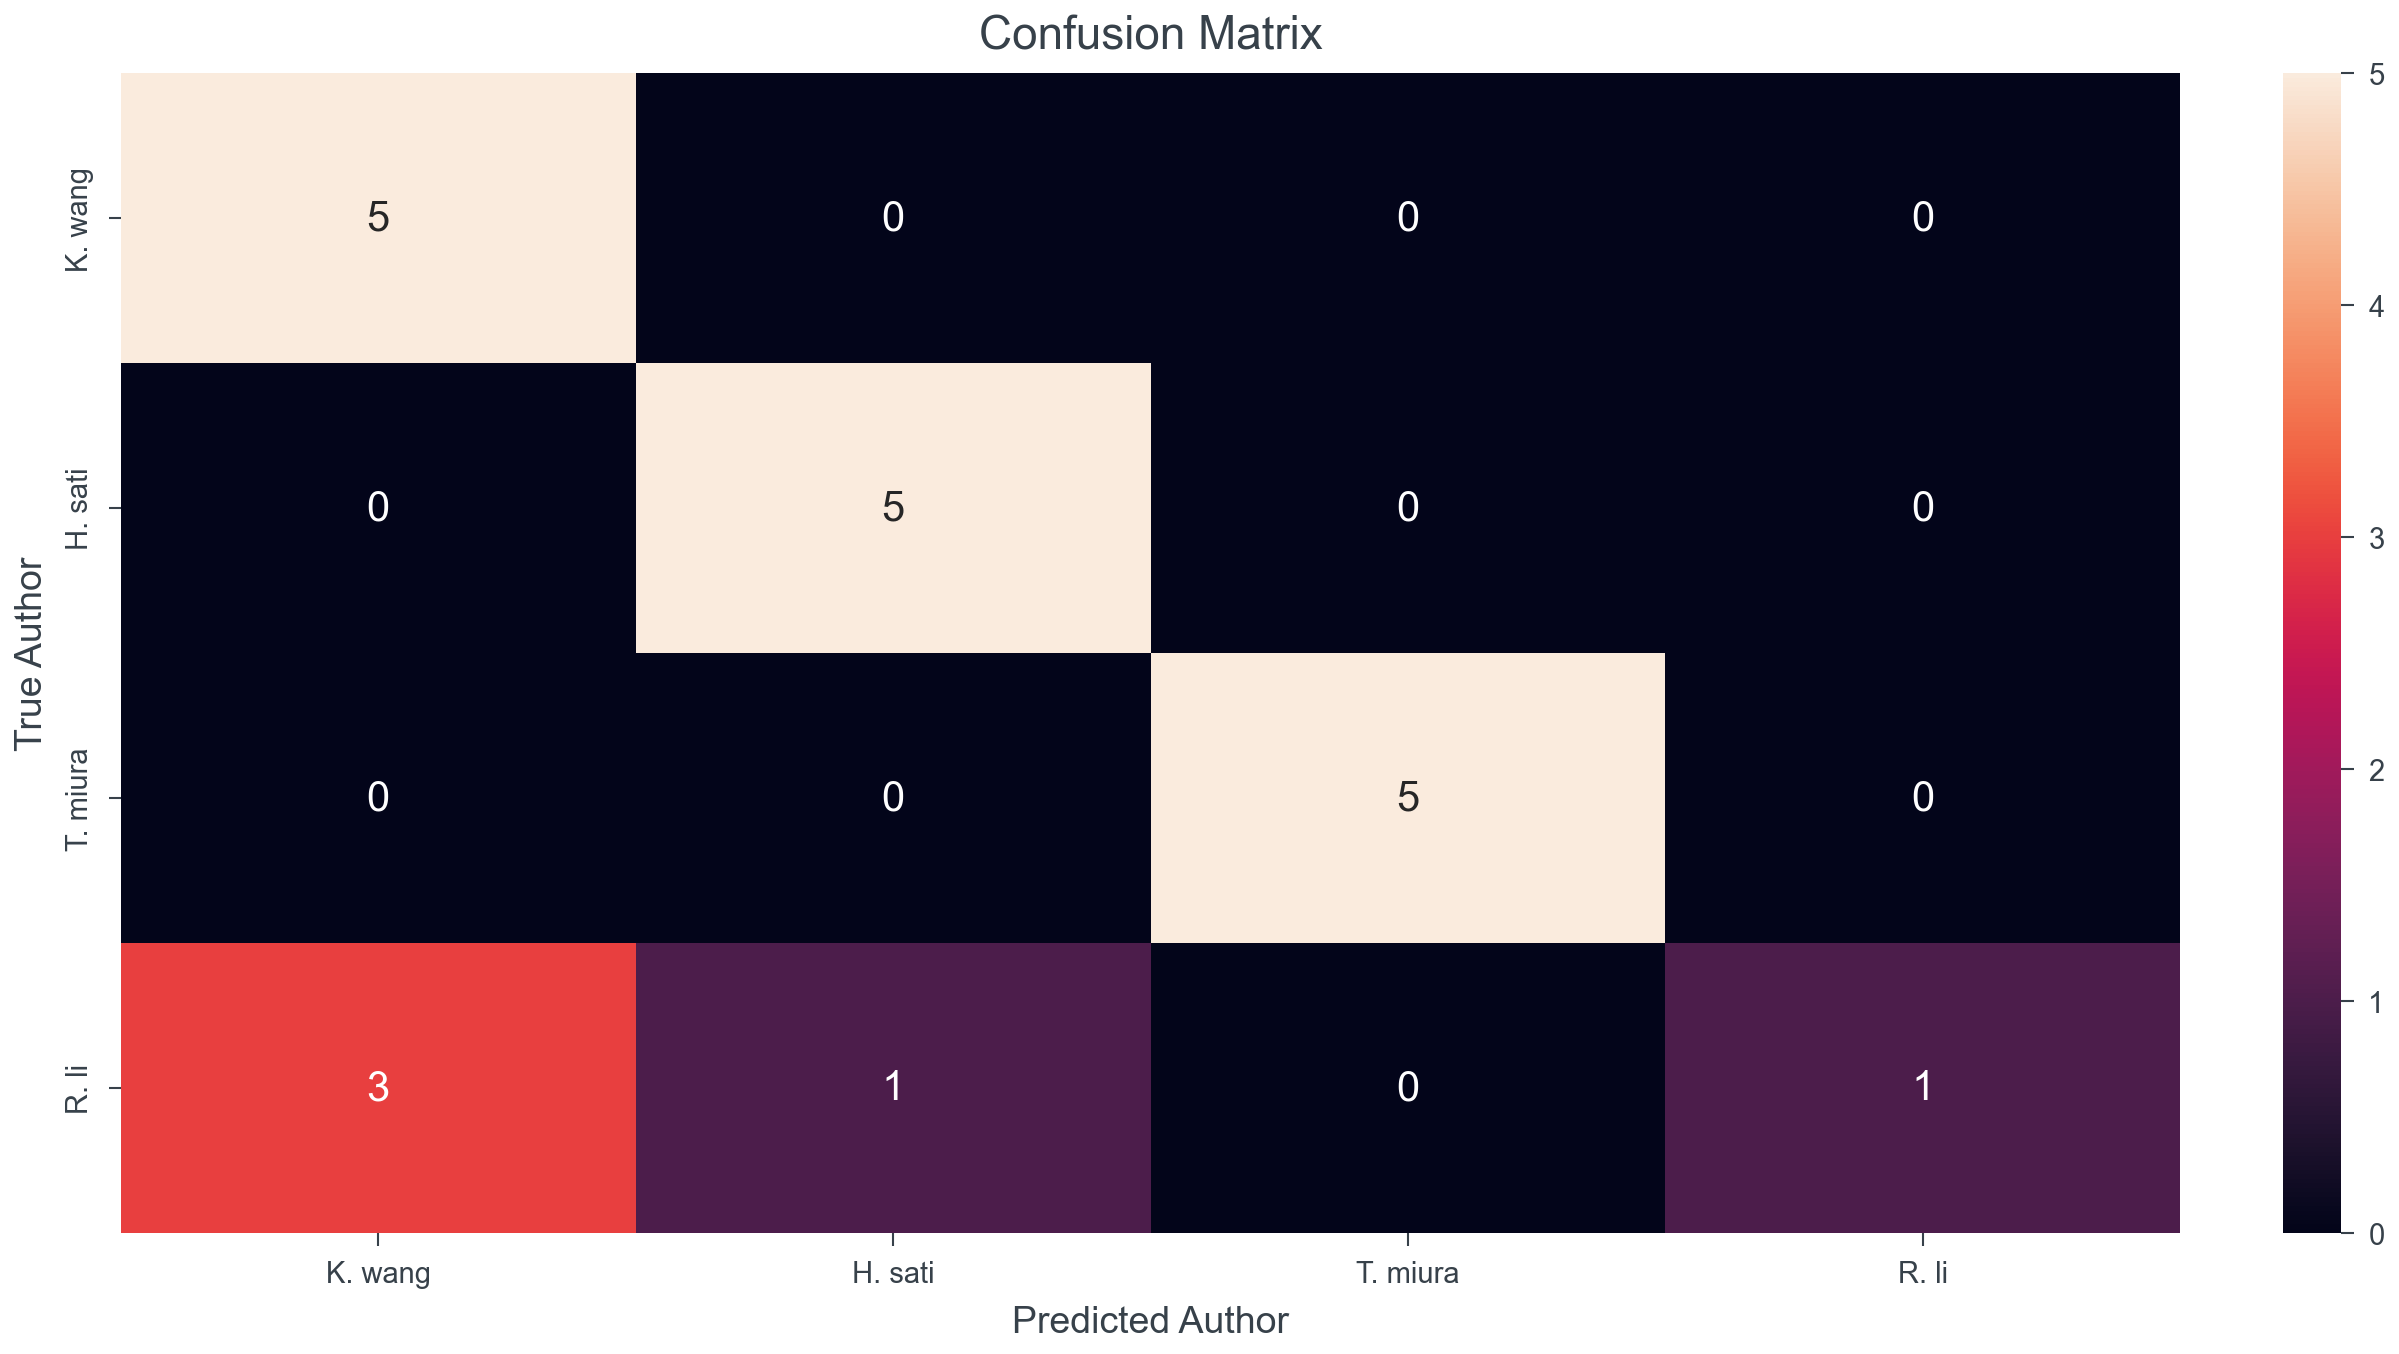

In [26]:
# TODO: run once the kernel was restarted, since the min group size was reduced to 5 (hopefully that means we get any data)
# 5 is the min group size however due to crossval split
(predictions_year, 
 performances_year, 
 feature_selection_ratios_year, 
 feature_selection_dfs_year, 
 feature_selection_stdev_dfs_year,
 balanced_precisions_year) = analysis.pipeline_wrapper(root_folders[4], feature_select_nums=[34])

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.style_manager import apply_style
apply_style("histogram")
precisions = [balanced_precisions_34["first_author"], balanced_precisions_ven["first_author"], balanced_precisions_cat["first_author"], balanced_precisions_nat["first_author"]]
datasets = ["No Group", "Same Venue", "Same Field", "Same Nationality"]

ax = plt.bar(datasets, precisions)
plt.ylabel("Balanced Precision")
plt.ylim(0, 1)
plt.savefig("./data/mini-datasets/Performance_comparison.png", dpi=150, bbox_inches='tight')
plt.show()

Mode: HISTOGRAM (Alpha via Hex)
Tübingen Style Applied successfully!


NameError: name 'balanced_precisions_34' is not defined